In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
crimedata=pd.read_csv('ipc_crime.csv')
crimedata.head()

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23                      53  ...     69                1543   
2          27                      59  ...     38                2088   
3          20                      25  ...     23                 795   
4          23                      49  ...     41                1244   

   DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  
4              2313              6507  

[5 rows x 33 columns]

In [3]:

crimedata['STATE/UT'] = crimedata['STATE/UT'].apply(str.lower)

In [4]:
crimedata

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     andhra pradesh       ADILABAD  2001     101                 60   
1     andhra pradesh      ANANTAPUR  2001     151                125   
2     andhra pradesh       CHITTOOR  2001     101                 57   
3     andhra pradesh       CUDDAPAH  2001      80                 53   
4     andhra pradesh  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     lakshadweep    LAKSHADWEEP  2012       0                  0   
9013     lakshadweep          TOTAL  2012       0                  0   
9014      puducherry       KARAIKAL  2012       5                  6   
9015      puducherry     PUDUCHERRY  2012      24                 21   
9016      puducherry          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
9012                                          0     0               0   
9013                                          0     0               0   
9014                                          2     6               0   
9015                                         10     7               0   
9016                                         12    13               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0             50                      46  ...     30                1131   
1             23                      53  ...     69                1543   
2             27                      59  ...     38                2088   
3             20                      25  ...     23                 795   
4             23                      49  ...     41                1244   
...          ...                     ...  ...    ...                 ...   
9012           0                       0  ...      3                   3   
9013           0                       0  ...      3                   3   
9014           6                       2  ...      1                 186   
9015           7                      17  ...     20                 632   
9016          13                      19  ...     21                 818   

      DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...               

In [5]:
data_population=pd.read_csv('population_area_literacy.csv')
data_population=data_population.drop(0,0)

In [6]:
data_population=data_population.sort_values(by=['State'])

In [7]:
data_population.reset_index(drop=True, inplace=True)

In [8]:
data_population['State'] = data_population['State'].apply(str.lower)

In [9]:
data_population=data_population.set_index('State')


In [10]:
data_population

Population Increase Area(Km2) Density  \
State                                                                  
andaman and nicobar islands      3,80,581    6.86%     8,249      46   
andhra pradesh                8,45,80,777   10.98%  2,75,045     308   
arunachal pradesh               13,83,727   26.03%    83,743      17   
assam                         3,12,05,576   17.07%    78,438     398   
bihar                        10,40,99,452   25.42%    94,163   1,106   
chandigarh                      10,55,450   17.19%       114   9,258   
chhattisgarh                  2,55,45,198   22.61%  1,35,192     189   
dadra and nagar haveli           3,43,709   55.88%       491     700   
daman and diu                    2,43,247   53.76%       111   2,191   
delhi                         1,67,87,941   21.21%     1,483  11,320   
goa                             14,58,545    8.23%     3,702     394   
gujarat                       6,04,39,692   19.28%  1,96,244     308   
haryana                       2,53,51,462   19.90%    44,212     573   
himachal pradesh                68,64,602   12.94%    55,673     123   
jammu and kashmir             1,25,41,302   23.64%  2,22,236      56   
jharkhand                     3,29,88,134   22.42%    79,716     414   
karnataka                     6,10,95,297   15.60%  1,91,791     319   
kerala                        3,34,06,061    4.91%    38,852     860   
lakshadweep                        64,473    6.30%        30   2,149   
madhya pradesh                7,26,26,809   20.35%  3,08,252     236   
maharashtra                  11,23,74,333   15.99%  3,07,713     365   
manipur                         28,55,794   24.50%    22,327     128   
meghalaya                       29,66,889   27.95%    22,429     132   
mizoram                         10,97,206   23.48%    21,081      52   
nagaland                        19,78,502   -0.58%    16,579     119   
odissa                        4,19,74,218   14.05%  1,55,707     270   
puducherry                      12,47,953   28.08%       490   2,547   
punjab                        2,77,43,338   13.89%    50,362     551   
rajasthan                     6,85,48,437   21.31%  3,42,239     200   
sikkim                           6,10,577   12.89%     7,096      86   
tamil nadu                    7,21,47,030   15.61%  1,30,060     555   
tripura                         36,73,917   14.84%    10,486     350   
uttar pradesh                19,98,12,341   20.23%  2,40,928     829   
uttarakhand                   1,00,86,292   18.81%    53,483     189   
west bengal                   9,12,76,115   13.84%    88,752   1,028   

                             Sex-Ratio  Literacy  Unnamed: 7  Unnamed: 8  \
State                                                                      
andaman and nicobar islands      876.0     86.63         NaN         NaN   
andhra pradesh                   993.0     67.02         NaN         NaN   
arunachal pradesh                938.0     65.38         NaN         NaN   
assam                            958.0     72.19         NaN         NaN   
bihar                            918.0     61.80         NaN         NaN   
chandigarh                       818.0     86.05         NaN         NaN   
chhattisgarh                     991.0     70.28         NaN         NaN   
dadra and nagar haveli           774.0     76.24         NaN         NaN   
daman and diu                    618.0     87.10         NaN         NaN   
delhi                            868.0     86.21         NaN         NaN   
goa                              973.0     88.70         NaN         NaN   
gujarat                          919.0     78.03         NaN         NaN   
haryana                          879.0     75.55         NaN         NaN   
himachal pradesh                 972.0     82.80         NaN         NaN   
jammu and kashmir                889.0     67.16         NaN         NaN   
jharkhand                        948.0     66.41         NaN         NaN  

This data for population,area,literacy is given for census 2011 it is given only for 2011

In [11]:
df_statewise1 = crimedata.groupby(by="STATE/UT").sum()

In [12]:
df_statewise1

YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                          
andaman and nicobar islands    72239     320                130   
andhra pradesh                742469   63512              44840   
arunachal pradesh             391317    1682                834   
assam                         726412   30864              11324   
bihar                        1083510   82490              81838   
chandigarh                     48156     486                602   
chhattisgarh                  533798   24120              15820   
dadra and nagar haveli         48156     216                 62   
daman and diu                  72234     136                 76   
delhi                         367273   12410              10554   
goa                            72234     974                538   
gujarat                       770547   27550              12224   
haryana                       537781   20942              14868   
himachal pradesh              353176    2908               1670   
jammu and kashmir             646186   12608              20606   
jharkhand                     626064   38120              24540   
karnataka                     800652   39874              37024   
kerala                        467547    9466              10654   
lakshadweep                    48156       6                 12   
madhya pradesh               1260147   56798              58916   
maharashtra                  1107588   65534              41178   
manipur                       250830    3910               7072   
meghalaya                     192624    3460               1202   
mizoram                       216702     806                516   
nagaland                      276915    2076                928   
odisha                        862830   28906              31304   
puducherry                     62219     714                686   
punjab                        630092   18986              20794   
rajasthan                     911085   31688              42684   
sikkim                        120390     332                222   
tamil nadu                    941080   40254              53194   
tripura                       134471    4044               1362   
uttar pradesh                1761768  130886             121040   
uttarakhand                   337092    5896               5254   
west bengal                   620034   42112              29386   

                             CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
STATE/UT                                                                        
andaman and nicobar islands                                         42    218   
andhra pradesh                                                    3526  26958   
arunachal pradesh                                                   72   1000   
assam                                                             1436  32356   
bihar                                                             7344  26248   
chandigarh                                                         158    562   
chhattisgarh                                                       696  23676   
dadra and nagar haveli                                               6    112   
daman and diu                                                        4     40   
delhi                                                             1766  12848   
goa                                                                134    700   
gujarat                                                            860   8498   
haryana                                                           1714  12820   
himachal pradesh                                                   260   3608   
jammu and kashmir                                                  694   5620   
jharkhand                                                         2462  18318   
karnataka                                                         1714  10348   
kerala       

In [13]:
df_statewise1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, andaman and nicobar islands to west bengal
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   YEAR                                                 35 non-null     int64
 1   MURDER                                               35 non-null     int64
 2   ATTEMPT TO MURDER                                    35 non-null     int64
 3   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            35 non-null     int64
 4   RAPE                                                 35 non-null     int64
 5   CUSTODIAL RAPE                                       35 non-null     int64
 6   OTHER RAPE                                           35 non-null     int64
 7   KIDNAPPING & ABDUCTION                               35 non-null     int64
 8   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS          35 non-nu

In [14]:
df_liter_crime=pd.DataFrame()

totalcrime=df_statewise1["TOTAL IPC CRIMES"]
l=data_population["Literacy"]
df_liter_crime.insert(0,"TOTAL_CRIME",totalcrime)
df_liter_crime.insert(1,"Literacy",l)


In [15]:
p=data_population["Population"]
a=data_population["Area(Km2)"]

In [16]:
df_liter_crime.insert(2,"Population",p)
df_liter_crime.insert(0,"Area(Km2)",a)

In [17]:
df_liter_crime

Area(Km2)  TOTAL_CRIME  Literacy    Population
STATE/UT                                                                  
andaman and nicobar islands     8,249        18204     86.63      3,80,581
andhra pradesh               2,75,045      4037962     67.02   8,45,80,777
arunachal pradesh              83,743        55304     65.38     13,83,727
assam                          78,438      1195528     72.19   3,12,05,576
bihar                          94,163      2692586     61.80  10,40,99,452
chandigarh                        114        81614     86.05     10,55,450
chhattisgarh                 1,35,192      1122054     70.28   2,55,45,198
dadra and nagar haveli            491         9302     76.24      3,43,709
daman and diu                     111         5896     87.10      2,43,247
delhi                           1,483      1266348     86.21   1,67,87,941
goa                             3,702        64102     88.70     14,58,545
gujarat                      1,96,244      2771550     78.03   6,04,39,692
haryana                        44,212      1190606     75.55   2,53,51,462
himachal pradesh               55,673       309896     82.80     68,64,602
jammu and kashmir            2,22,236       518310     67.16   1,25,41,302
jharkhand                      79,716       844702     66.41   3,29,88,134
karnataka                    1,91,791      2962126     75.36   6,10,95,297
kerala                         38,852      2874918     94.00   3,34,06,061
lakshadweep                        30         1486     91.85        64,473
madhya pradesh               3,08,252      4827540     69.32   7,26,26,809
maharashtra                  3,07,713      4546872     82.34  11,23,74,333
manipur                        22,327        70144     76.94     28,55,794
meghalaya                      22,429        50498     74.43     29,66,889
mizoram                        21,081        52292     91.33     10,97,206
nagaland                       16,579        26266     79.55     19,78,502
odisha                            NaN      1295892       NaN           NaN
puducherry                        490       108232     85.85     12,47,953
punjab                         50,362       768262     75.84   2,77,43,338
rajasthan                    3,42,239      3711832     66.11   6,85,48,437
sikkim                          7,096        14000     81.42      6,10,577
tamil nadu                   1,30,060      4120352     80.09   7,21,47,030
tripura                        10,486       105468     87.22     36,73,917
uttar pradesh                2,40,928      3716148     67.68  19,98,12,341
uttarakhand                    53,483       206408     78.82   1,00,86,292
west bengal                    88,752      2238608     76.26   9,12,76,115

In [18]:
df_liter_crime.loc[df_liter_crime.TOTAL_CRIME==1295892,"Area(Km2)"]=155707
#df.loc[df.A == 2, "C"] = 100

In [19]:
df_liter_crime.loc[df_liter_crime.TOTAL_CRIME==1295892,"Literacy"]=72.87
df_liter_crime.loc[df_liter_crime.TOTAL_CRIME==1295892,"Population"]=41974218


In [20]:
df_liter_crime

Area(Km2)  TOTAL_CRIME  Literacy    Population
STATE/UT                                                                  
andaman and nicobar islands     8,249        18204     86.63      3,80,581
andhra pradesh               2,75,045      4037962     67.02   8,45,80,777
arunachal pradesh              83,743        55304     65.38     13,83,727
assam                          78,438      1195528     72.19   3,12,05,576
bihar                          94,163      2692586     61.80  10,40,99,452
chandigarh                        114        81614     86.05     10,55,450
chhattisgarh                 1,35,192      1122054     70.28   2,55,45,198
dadra and nagar haveli            491         9302     76.24      3,43,709
daman and diu                     111         5896     87.10      2,43,247
delhi                           1,483      1266348     86.21   1,67,87,941
goa                             3,702        64102     88.70     14,58,545
gujarat                      1,96,244      2771550     78.03   6,04,39,692
haryana                        44,212      1190606     75.55   2,53,51,462
himachal pradesh               55,673       309896     82.80     68,64,602
jammu and kashmir            2,22,236       518310     67.16   1,25,41,302
jharkhand                      79,716       844702     66.41   3,29,88,134
karnataka                    1,91,791      2962126     75.36   6,10,95,297
kerala                         38,852      2874918     94.00   3,34,06,061
lakshadweep                        30         1486     91.85        64,473
madhya pradesh               3,08,252      4827540     69.32   7,26,26,809
maharashtra                  3,07,713      4546872     82.34  11,23,74,333
manipur                        22,327        70144     76.94     28,55,794
meghalaya                      22,429        50498     74.43     29,66,889
mizoram                        21,081        52292     91.33     10,97,206
nagaland                       16,579        26266     79.55     19,78,502
odisha                         155707      1295892     72.87      41974218
puducherry                        490       108232     85.85     12,47,953
punjab                         50,362       768262     75.84   2,77,43,338
rajasthan                    3,42,239      3711832     66.11   6,85,48,437
sikkim                          7,096        14000     81.42      6,10,577
tamil nadu                   1,30,060      4120352     80.09   7,21,47,030
tripura                        10,486       105468     87.22     36,73,917
uttar pradesh                2,40,928      3716148     67.68  19,98,12,341
uttarakhand                    53,483       206408     78.82   1,00,86,292
west bengal                    88,752      2238608     76.26   9,12,76,115

ANALYSIS OF LITERACY RATE AND TOTAL CRIME 

In [21]:
#df_liter_crime['Literacy'] = df_liter_crime['Literacy'].str.replace(',','')

In [22]:
#df_liter_crime['Literacy'] = pd.to_numeric(df_liter_crime['Literacy'].astype(str), errors='coerce')

In [23]:
df_liter_crime=df_liter_crime.sort_values(by=['Literacy'])

In [24]:
df_liter_crime

Area(Km2)  TOTAL_CRIME  Literacy    Population
STATE/UT                                                                  
bihar                          94,163      2692586     61.80  10,40,99,452
arunachal pradesh              83,743        55304     65.38     13,83,727
rajasthan                    3,42,239      3711832     66.11   6,85,48,437
jharkhand                      79,716       844702     66.41   3,29,88,134
andhra pradesh               2,75,045      4037962     67.02   8,45,80,777
jammu and kashmir            2,22,236       518310     67.16   1,25,41,302
uttar pradesh                2,40,928      3716148     67.68  19,98,12,341
madhya pradesh               3,08,252      4827540     69.32   7,26,26,809
chhattisgarh                 1,35,192      1122054     70.28   2,55,45,198
assam                          78,438      1195528     72.19   3,12,05,576
odisha                         155707      1295892     72.87      41974218
meghalaya                      22,429        50498     74.43     29,66,889
karnataka                    1,91,791      2962126     75.36   6,10,95,297
haryana                        44,212      1190606     75.55   2,53,51,462
punjab                         50,362       768262     75.84   2,77,43,338
dadra and nagar haveli            491         9302     76.24      3,43,709
west bengal                    88,752      2238608     76.26   9,12,76,115
manipur                        22,327        70144     76.94     28,55,794
gujarat                      1,96,244      2771550     78.03   6,04,39,692
uttarakhand                    53,483       206408     78.82   1,00,86,292
nagaland                       16,579        26266     79.55     19,78,502
tamil nadu                   1,30,060      4120352     80.09   7,21,47,030
sikkim                          7,096        14000     81.42      6,10,577
maharashtra                  3,07,713      4546872     82.34  11,23,74,333
himachal pradesh               55,673       309896     82.80     68,64,602
puducherry                        490       108232     85.85     12,47,953
chandigarh                        114        81614     86.05     10,55,450
delhi                           1,483      1266348     86.21   1,67,87,941
andaman and nicobar islands     8,249        18204     86.63      3,80,581
daman and diu                     111         5896     87.10      2,43,247
tripura                        10,486       105468     87.22     36,73,917
goa                             3,702        64102     88.70     14,58,545
mizoram                        21,081        52292     91.33     10,97,206
lakshadweep                        30         1486     91.85        64,473
kerala                         38,852      2874918     94.00   3,34,06,061

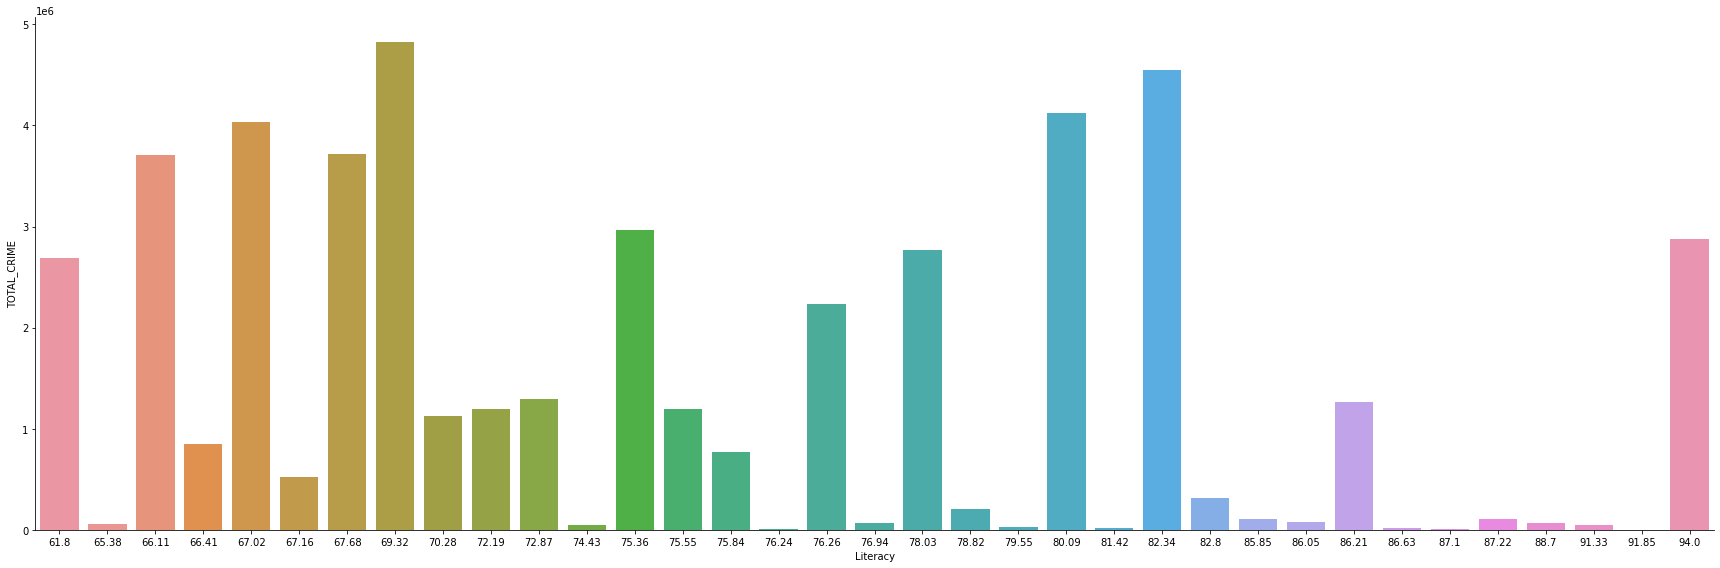

In [26]:
sns.catplot(y = "TOTAL_CRIME", x = "Literacy", data =df_liter_crime,kind="bar", height = 8, aspect = 3)
plt.show()

<AxesSubplot:xlabel='TOTAL_CRIME', ylabel='Literacy'>

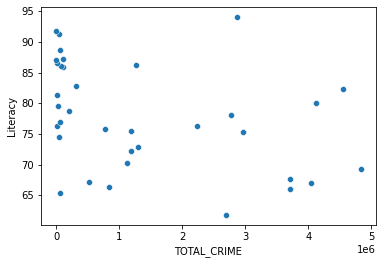

In [27]:
sns.scatterplot(df_liter_crime['TOTAL_CRIME'],df_liter_crime['Literacy'])

from above plot both scatter and catplot it can be observed that except few state like kerala,the state with high literacy rate have low  crimes.
it can be clearly seen in scatter plot that their are more dots at 0 crime and at literacy more than 75.

ANALYSIS OF POPULATION VS TOTAL CRIME

In [28]:
df_liter_crime['Population'] = df_liter_crime['Population'].astype(str).str.replace(',','')


In [29]:
df_liter_crime['Population'] = pd.to_numeric(df_liter_crime['Population'].astype(str), errors='coerce')

In [30]:
df_liter_crime=df_liter_crime.sort_values(by=['Population'])

In [31]:
df_liter_crime

Area(Km2)  TOTAL_CRIME  Literacy  Population
STATE/UT                                                                
lakshadweep                        30         1486     91.85       64473
daman and diu                     111         5896     87.10      243247
dadra and nagar haveli            491         9302     76.24      343709
andaman and nicobar islands     8,249        18204     86.63      380581
sikkim                          7,096        14000     81.42      610577
chandigarh                        114        81614     86.05     1055450
mizoram                        21,081        52292     91.33     1097206
puducherry                        490       108232     85.85     1247953
arunachal pradesh              83,743        55304     65.38     1383727
goa                             3,702        64102     88.70     1458545
nagaland                       16,579        26266     79.55     1978502
manipur                        22,327        70144     76.94     2855794
meghalaya                      22,429        50498     74.43     2966889
tripura                        10,486       105468     87.22     3673917
himachal pradesh               55,673       309896     82.80     6864602
uttarakhand                    53,483       206408     78.82    10086292
jammu and kashmir            2,22,236       518310     67.16    12541302
delhi                           1,483      1266348     86.21    16787941
haryana                        44,212      1190606     75.55    25351462
chhattisgarh                 1,35,192      1122054     70.28    25545198
punjab                         50,362       768262     75.84    27743338
assam                          78,438      1195528     72.19    31205576
jharkhand                      79,716       844702     66.41    32988134
kerala                         38,852      2874918     94.00    33406061
odisha                         155707      1295892     72.87    41974218
gujarat                      1,96,244      2771550     78.03    60439692
karnataka                    1,91,791      2962126     75.36    61095297
rajasthan                    3,42,239      3711832     66.11    68548437
tamil nadu                   1,30,060      4120352     80.09    72147030
madhya pradesh               3,08,252      4827540     69.32    72626809
andhra pradesh               2,75,045      4037962     67.02    84580777
west bengal                    88,752      2238608     76.26    91276115
bihar                          94,163      2692586     61.80   104099452
maharashtra                  3,07,713      4546872     82.34   112374333
uttar pradesh                2,40,928      3716148     67.68   199812341

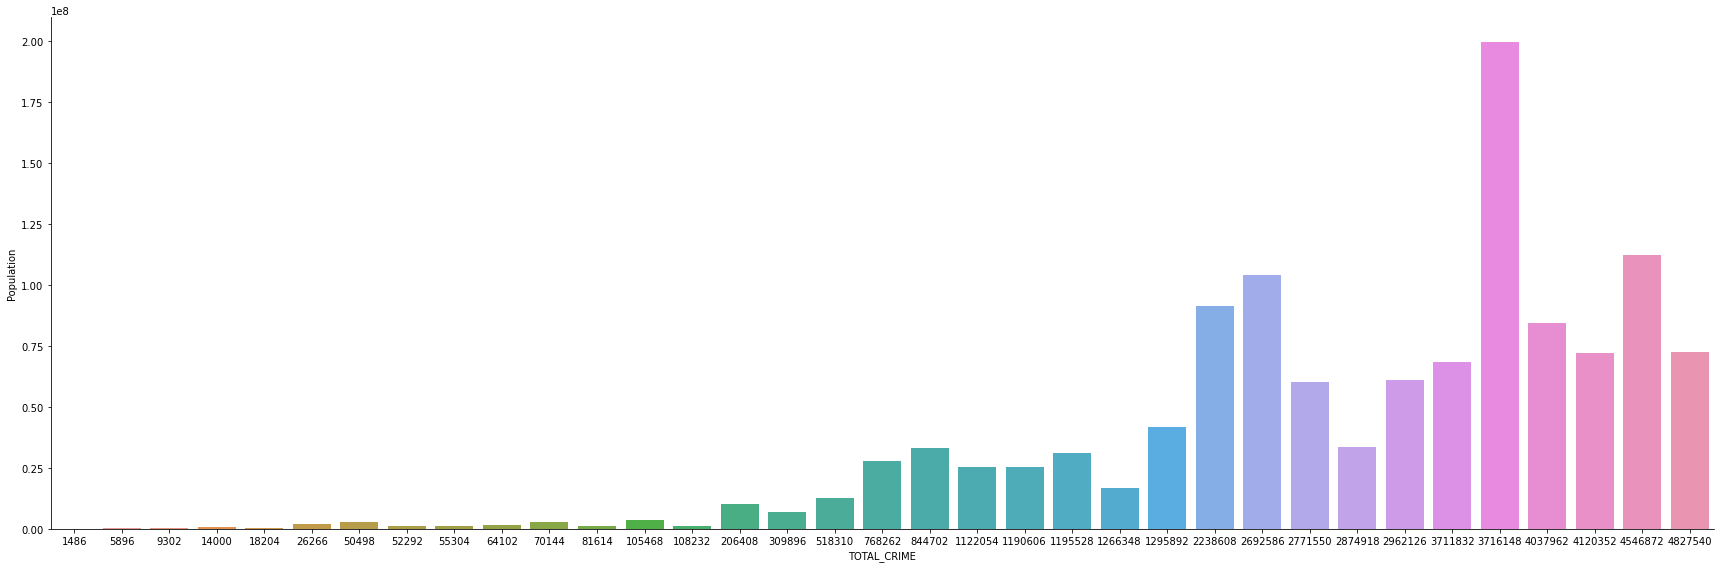

In [33]:
sns.catplot(y = "Population", x = "TOTAL_CRIME", data =df_liter_crime,kind="bar", height = 8, aspect = 3)
plt.show()

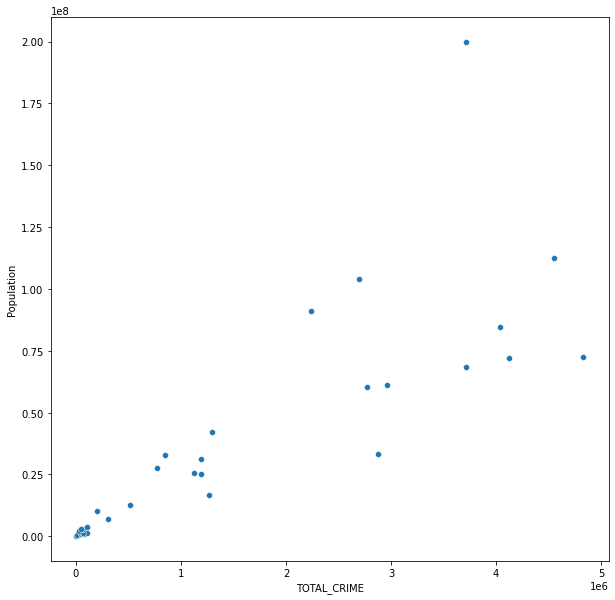

In [34]:
sns.scatterplot(df_liter_crime['TOTAL_CRIME'],df_liter_crime['Population'])
plt.gcf().set_size_inches((10, 10)) 

it can be observed from cat plot that population of higher no. have longer bar that is more no. of crime. from scatter plot it can be observed that at near by 0 no. of crime population is showing very less.so we can conclude that more crime is done where population is more.

Analysis of area vs overall crime

In [35]:
df_liter_crime['Area(Km2)']

STATE/UT
lakshadweep                          30
daman and diu                       111
dadra and nagar haveli              491
andaman and nicobar islands       8,249
sikkim                            7,096
chandigarh                          114
mizoram                          21,081
puducherry                          490
arunachal pradesh                83,743
goa                               3,702
nagaland                         16,579
manipur                          22,327
meghalaya                        22,429
tripura                          10,486
himachal pradesh                 55,673
uttarakhand                      53,483
jammu and kashmir              2,22,236
delhi                             1,483
haryana                          44,212
chhattisgarh                   1,35,192
punjab                           50,362
assam                            78,438
jharkhand                        79,716
kerala                           38,852
odisha                         

In [36]:
df_liter_crime['Area(Km2)'] = df_liter_crime['Area(Km2)'].astype(str).str.replace(',','')

In [37]:
df_liter_crime['Area(Km2)']

STATE/UT
lakshadweep                        30
daman and diu                     111
dadra and nagar haveli            491
andaman and nicobar islands      8249
sikkim                           7096
chandigarh                        114
mizoram                         21081
puducherry                        490
arunachal pradesh               83743
goa                              3702
nagaland                        16579
manipur                         22327
meghalaya                       22429
tripura                         10486
himachal pradesh                55673
uttarakhand                     53483
jammu and kashmir              222236
delhi                            1483
haryana                         44212
chhattisgarh                   135192
punjab                          50362
assam                           78438
jharkhand                       79716
kerala                          38852
odisha                         155707
gujarat                        196244
kar

In [38]:
df_liter_crime['Area(Km2)'] = pd.to_numeric(df_liter_crime['Area(Km2)'].astype(str), errors='coerce')

In [39]:
df_liter_crime=df_liter_crime.sort_values(by=['Area(Km2)'])

In [40]:
df_liter_crime

Area(Km2)  TOTAL_CRIME  Literacy  Population
STATE/UT                                                                 
lakshadweep                         30         1486     91.85       64473
daman and diu                      111         5896     87.10      243247
chandigarh                         114        81614     86.05     1055450
puducherry                         490       108232     85.85     1247953
dadra and nagar haveli             491         9302     76.24      343709
delhi                             1483      1266348     86.21    16787941
goa                               3702        64102     88.70     1458545
sikkim                            7096        14000     81.42      610577
andaman and nicobar islands       8249        18204     86.63      380581
tripura                          10486       105468     87.22     3673917
nagaland                         16579        26266     79.55     1978502
mizoram                          21081        52292     91.33     1097206
manipur                          22327        70144     76.94     2855794
meghalaya                        22429        50498     74.43     2966889
kerala                           38852      2874918     94.00    33406061
haryana                          44212      1190606     75.55    25351462
punjab                           50362       768262     75.84    27743338
uttarakhand                      53483       206408     78.82    10086292
himachal pradesh                 55673       309896     82.80     6864602
assam                            78438      1195528     72.19    31205576
jharkhand                        79716       844702     66.41    32988134
arunachal pradesh                83743        55304     65.38     1383727
west bengal                      88752      2238608     76.26    91276115
bihar                            94163      2692586     61.80   104099452
tamil nadu                      130060      4120352     80.09    72147030
chhattisgarh                    135192      1122054     70.28    25545198
odisha                          155707      1295892     72.87    41974218
karnataka                       191791      2962126     75.36    61095297
gujarat                         196244      2771550     78.03    60439692
jammu and kashmir               222236       518310     67.16    12541302
uttar pradesh                   240928      3716148     67.68   199812341
andhra pradesh                  275045      4037962     67.02    84580777
maharashtra                     307713      4546872     82.34   112374333
madhya pradesh                  308252      4827540     69.32    72626809
rajasthan                       342239      3711832     66.11    68548437

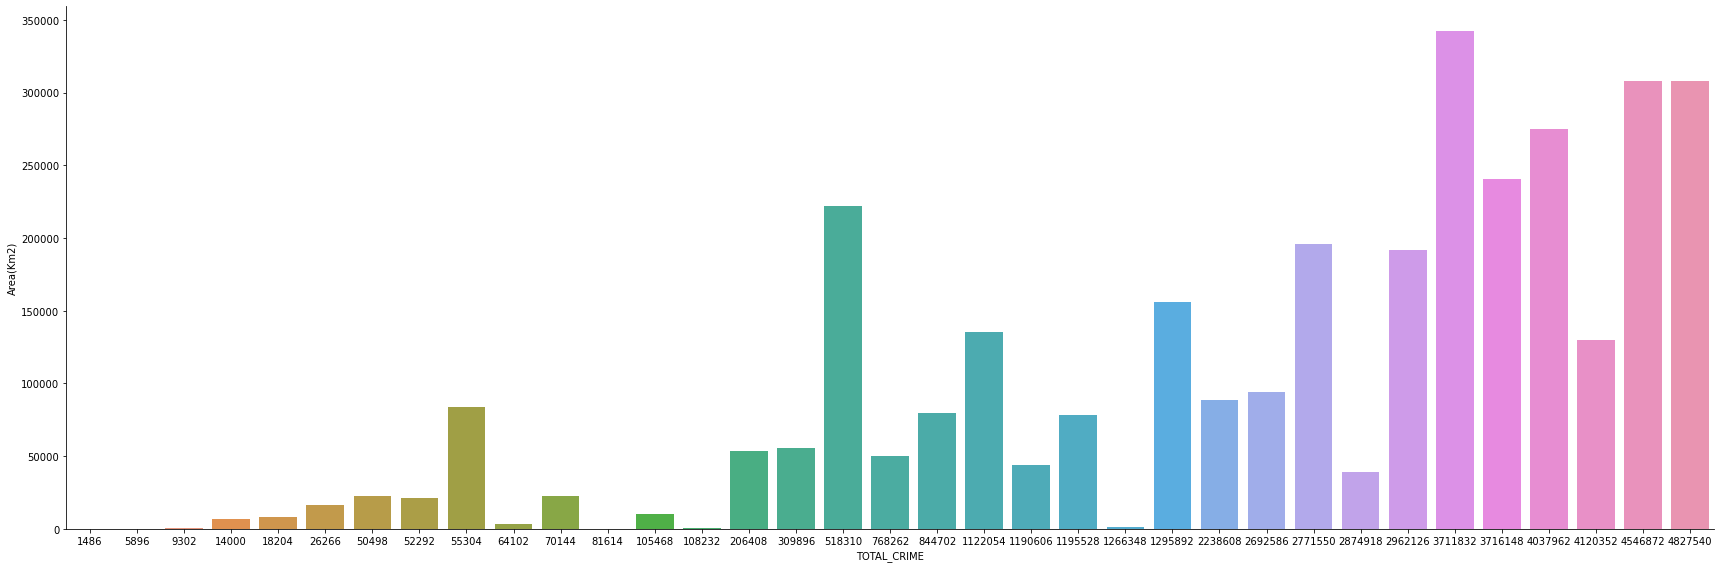

In [43]:
sns.catplot(y = "Area(Km2)", x = "TOTAL_CRIME", data =df_liter_crime,kind="bar", height = 8, aspect = 3)
plt.show()

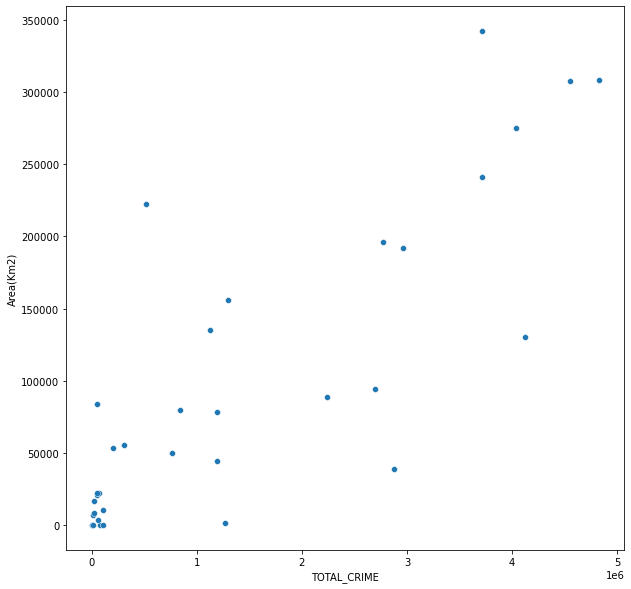

In [44]:
sns.scatterplot(df_liter_crime['TOTAL_CRIME'],df_liter_crime['Area(Km2)'])
plt.gcf().set_size_inches((10, 10)) 

generally it can be infered that area above 1 lakh km2 have crime more than 2 shown in the graph there are few exceptions.scatter plot also show the sme trend that is total crime at nearly 0 have area less than 1 lakh km2 but others are more than that.

Analysis of year-on-year total crime rate.

In [45]:
df_yearwise = crimedata.groupby(by="YEAR").sum()

In [46]:
df_yearwise

MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
YEAR                                                                         
2001   72404              63046                                       6734   
2002   70580              60760                                       7248   
2003   65432              51884                                       8058   
2004   67216              55780                                       7870   
2005   65438              56062                                       7156   
2006   64962              54460                                       7070   
2007   64636              54802                                       7288   
2008   65532              57196                                       7726   
2009   64738              58076                                       7860   
2010   66670              58842                                       7564   
2011   68610              62770                                       7414   
2012   68868              70276                                       7240   

       RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
YEAR                                                              
2001  32150               0       32150                   44974   
2002  32746               6       32740                   43700   
2003  31694               2       31692                   39984   
2004  36466               4       36462                   46654   
2005  36718              14       36704                   45664   
2006  38696               4       38692                   47982   
2007  41474               2       41472                   55122   
2008  42934               0       42934                   60522   
2009  42794               4       42790                   67720   
2010  44344              12       44332                   76880   
2011  48412               2       48410                   89328   
2012  49846               2       49844                   95184   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
YEAR                                                
2001                                        29290   
2002                                        29012   
2003                                        26592   
2004                                        31156   
2005                                        31500   
2006                                        34828   
2007                                        40832   
2008                                        45878   
2009                                        51482   
2010                                        59590   
2011                                        71130   
2012                                        76524   

      KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  ...  ARSON  \
YEAR                                               ...          
2001                               15684    12308  ...  21068   
2002                               14688    12202  ...  23640   
2003                               13392    10606  ...  18730   
2004                               15498    10622  ...  17274   
2005                               14164    10282  ...  16902   
2006                               13154     9494  ...  16960   
2007                               14290     9158  ...  18048   
2008                               14644     9060  ...  18498   
2009                               16238     9172  ...  17472   
2010                               17290     8716  ...  17016   
2011                               18198     8570  ...  18128   
2012                               18660     8628  ...  23672   

      HURT/GREVIOUS HURT  DOWRY DEATHS  \
YEAR                                     
2001              542974         13702   
2002              530050         13644   
2003              522888         12416   
2004              553736         14052   
2005              541722         13574   
2006              529496  

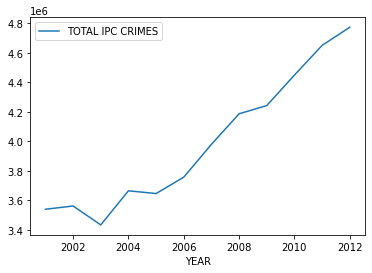

In [47]:
df_yearwise.plot(y = "TOTAL IPC CRIMES")
plt.show()

<AxesSubplot:xlabel='YEAR', ylabel='TOTAL IPC CRIMES'>

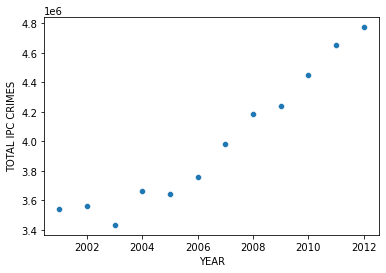

In [48]:
sns.scatterplot(df_yearwise.index,df_yearwise['TOTAL IPC CRIMES'])


From above plot we can observed that year by year number of crime is increasing.only in 2003 and 2005 crime had decreased.rest it is showing increased

Analysis of the type of crime vs each state vs Literacy rate

In [49]:
#df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar")

In [50]:
df_statewise1.insert(1,"Literacy",l)
df_statewise1.insert(1,"Population",p)

In [51]:
df_statewise1['Population'] = df_statewise1['Population'].astype(str).str.replace(',','')

In [52]:
df_statewise1['Population'] = pd.to_numeric(df_statewise1['Population'].astype(str), errors='coerce')

In [53]:
df_statewise1=df_statewise1.sort_values(by=['Population'],ascending=False)

In [54]:
df_statewise1

YEAR   Population  Literacy  MURDER  \
STATE/UT                                                              
uttar pradesh                1761768  199812341.0     67.68  130886   
maharashtra                  1107588  112374333.0     82.34   65534   
bihar                        1083510  104099452.0     61.80   82490   
west bengal                   620034   91276115.0     76.26   42112   
andhra pradesh                742469   84580777.0     67.02   63512   
madhya pradesh               1260147   72626809.0     69.32   56798   
tamil nadu                    941080   72147030.0     80.09   40254   
rajasthan                     911085   68548437.0     66.11   31688   
karnataka                     800652   61095297.0     75.36   39874   
gujarat                       770547   60439692.0     78.03   27550   
kerala                        467547   33406061.0     94.00    9466   
jharkhand                     626064   32988134.0     66.41   38120   
assam                         726412   31205576.0     72.19   30864   
punjab                        630092   27743338.0     75.84   18986   
chhattisgarh                  533798   25545198.0     70.28   24120   
haryana                       537781   25351462.0     75.55   20942   
delhi                         367273   16787941.0     86.21   12410   
jammu and kashmir             646186   12541302.0     67.16   12608   
uttarakhand                   337092   10086292.0     78.82    5896   
himachal pradesh              353176    6864602.0     82.80    2908   
tripura                       134471    3673917.0     87.22    4044   
meghalaya                     192624    2966889.0     74.43    3460   
manipur                       250830    2855794.0     76.94    3910   
nagaland                      276915    1978502.0     79.55    2076   
goa                            72234    1458545.0     88.70     974   
arunachal pradesh             391317    1383727.0     65.38    1682   
puducherry                     62219    1247953.0     85.85     714   
mizoram                       216702    1097206.0     91.33     806   
chandigarh                     48156    1055450.0     86.05     486   
sikkim                        120390     610577.0     81.42     332   
andaman and nicobar islands    72239     380581.0     86.63     320   
dadra and nagar haveli         48156     343709.0     76.24     216   
daman and diu                  72234     243247.0     87.10     136   
lakshadweep                    48156      64473.0     91.85       6   
odisha                        862830          NaN       NaN   28906   

                             ATTEMPT TO MURDER  \
STATE/UT                                         
uttar pradesh                           121040   
maharashtra                              41178   
bihar                                    81838   
west bengal                              29386   
andhra pradesh                           44840   
madhya pradesh                           58916   
tamil nadu                               53194   
rajasthan                                42684   
karnataka                                37024   
gujarat                                  12224   
kerala                                   10654   
jharkhand                                24540   
assam                                    11324   
punjab                                   20794   
chhattisgarh                             15820   
haryana                                  14868   
delhi                                    10554   
jammu and kashmir                        20606   
uttarakhand                               5254   
himachal pradesh                          1670   
tripura                                   1362   
meghalaya                                 1202   
manipur                                   7072   
nagaland                                   928   
goa                                        538   
arunachal pradesh                          834   
pudu

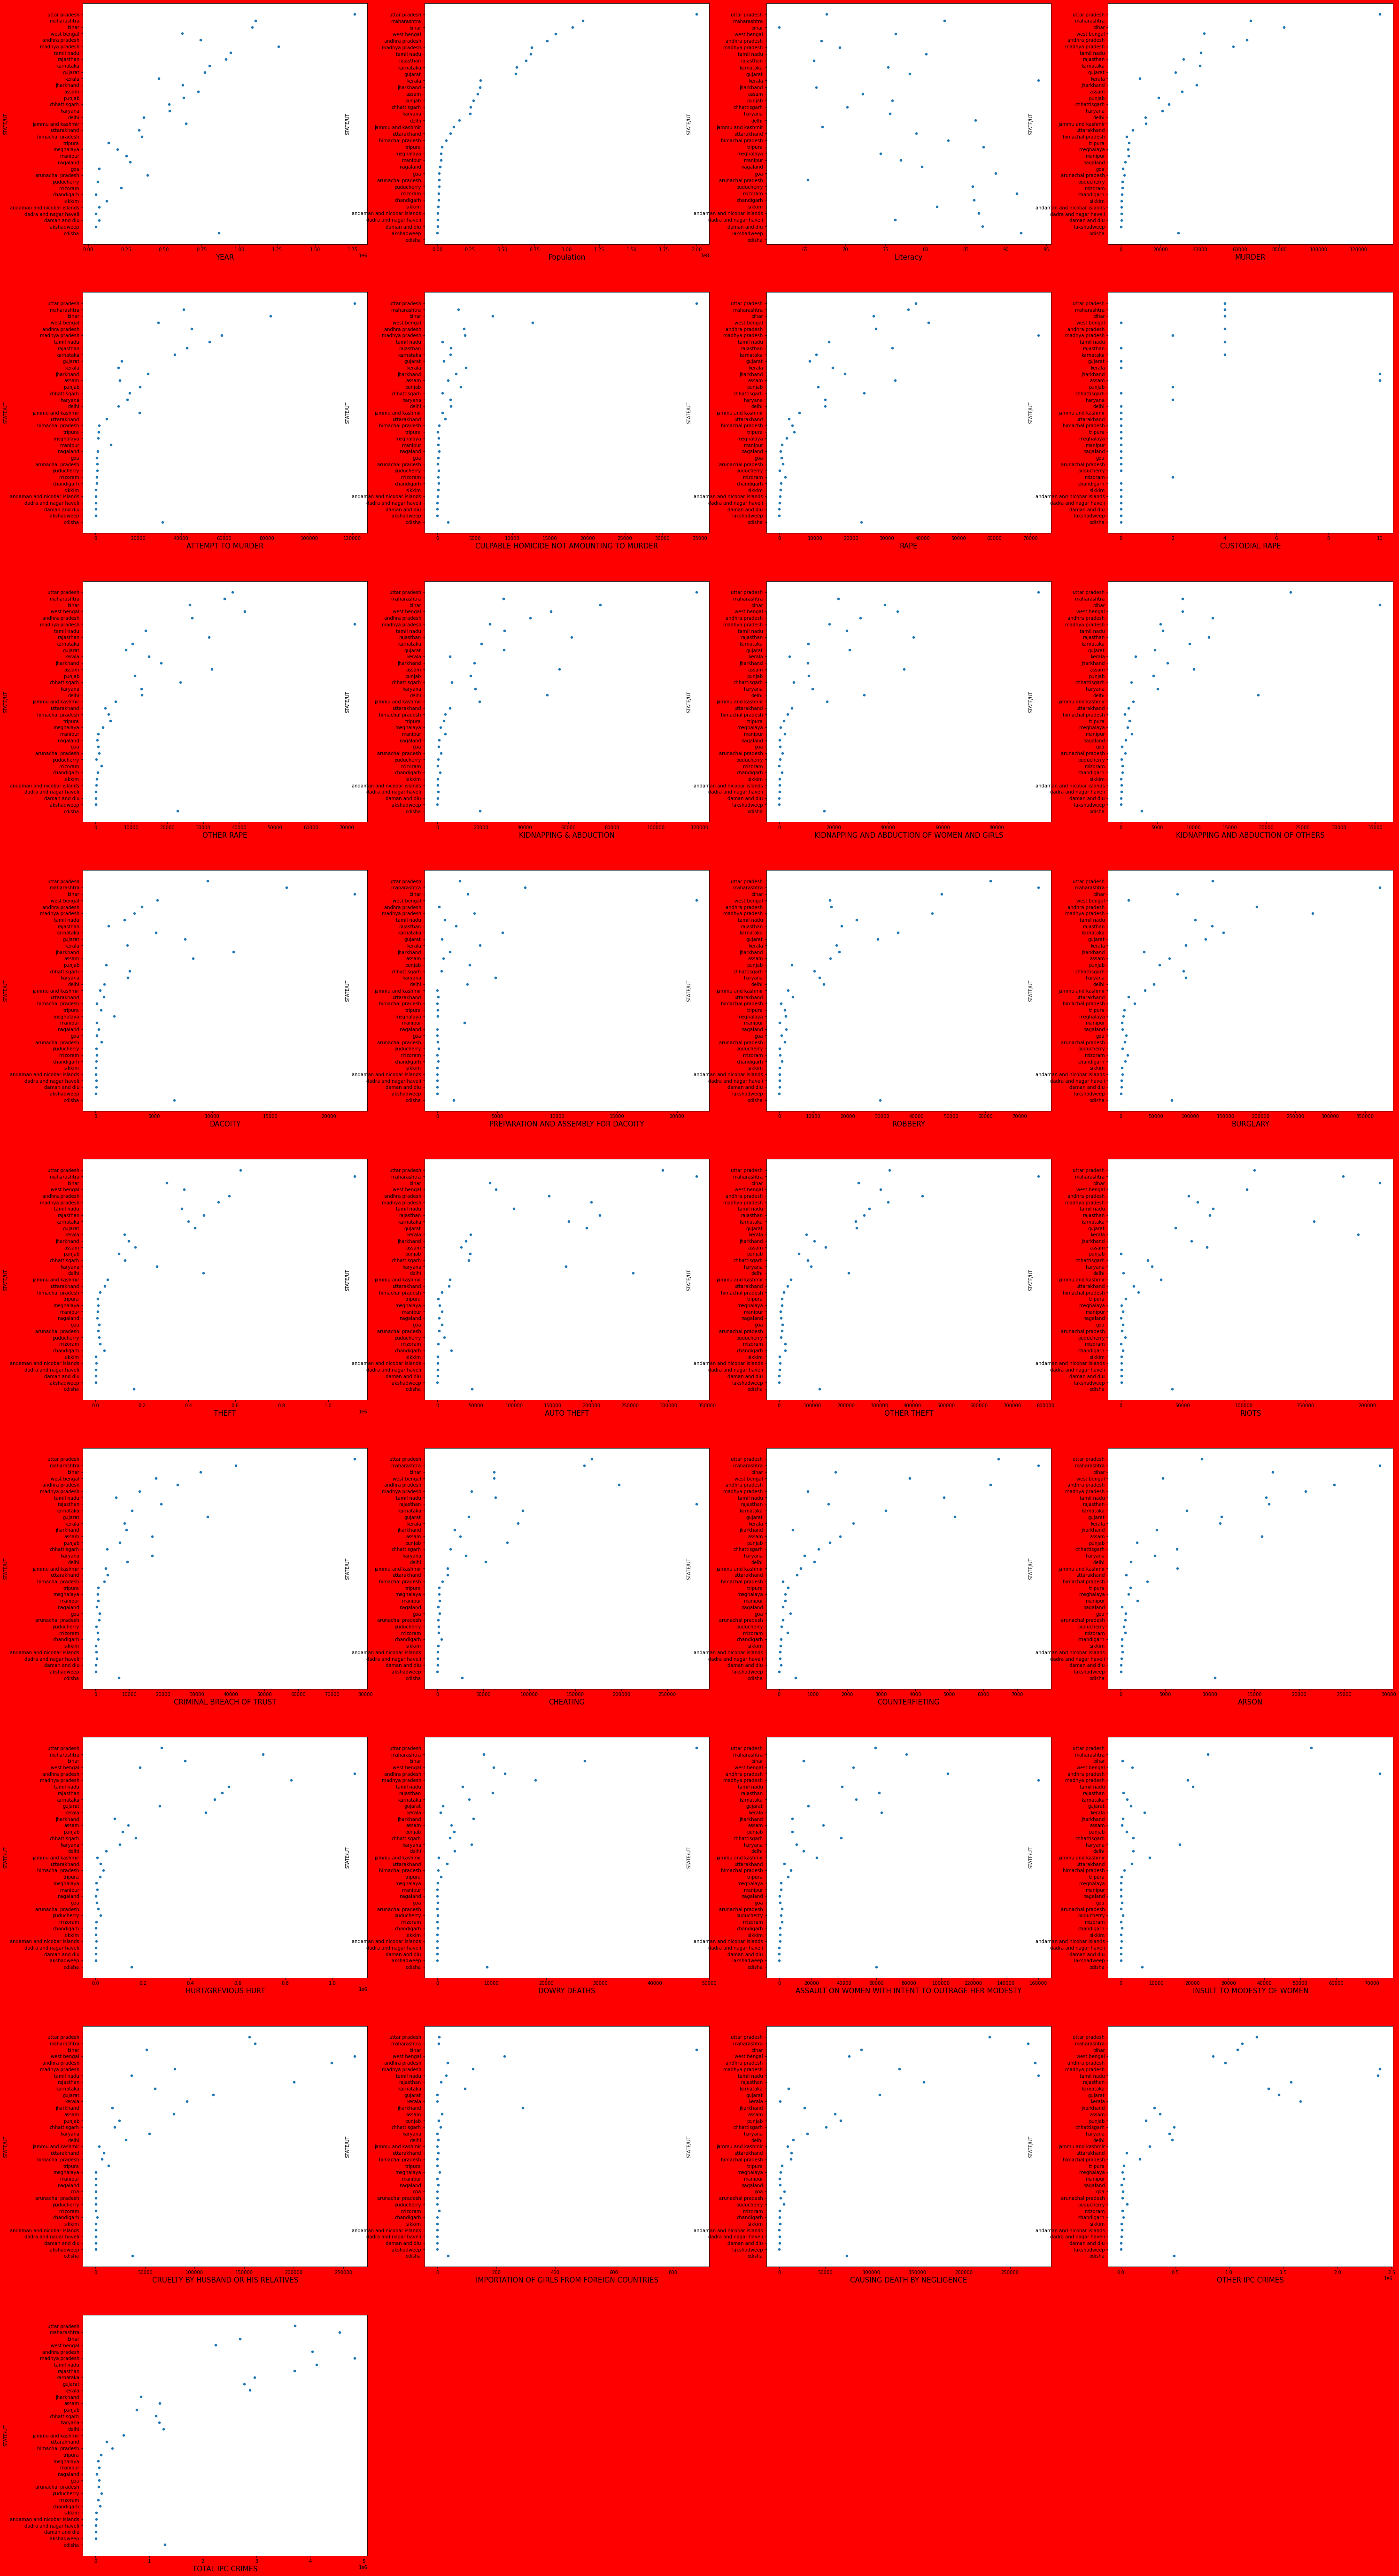

In [55]:
plt.figure(figsize=(50,100),facecolor='red')
plotnumber=1
for column in df_statewise1:
    if plotnumber<=33:
        ax=plt.subplot(9,4,plotnumber)
        #sns.distplot(df_statewise1[column])
        sns.scatterplot(df_statewise1[column],df_statewise1.index)
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

Description 

Murder-it can be seen from scatter plot that rate of murder crimes depend on the population of the state,we can see larger no.is showing for up and less for lakshadweep.we can see upto himanchal pradesh murder are almost 0 after that it had shown positive trend according to population.


Attempt to murder-it is showing same trend as in murder graph,that is upto himanchal pradesh attempt to  murder are almost 0 after that ii increase accordingly.


Culpable homecide is nearly is less for other state except up. in up it is showing greater value.

RAPE-in this graph maximum rape crime has been done in MP.state with low population is showing less cases almost between 0 to 5000

CUSTODIAL RAPE-Maximum it is showing for assam and jharkhand and for other state it is showing according to the population.

OTHER RAPE -it is showing maximum for MP.it show least in no. for less populated state

Kidnapping and abduction-It is showing maximum for up and it is showing less for lower populated state

Kidnapping and abduction for women and girl -maximum value is showing in UP ,for less populated less it is almost negligible.

Kidnapping and abstraction for others-It is showingIt is showing me maximum for Bihar and then UP and almost negligible for less populated state.

ANALYSIS OF DATA CRIME AGAINST SC

In [56]:
crime_against_sc=pd.read_csv('crime_against_sc.csv')
crime_against_sc

STATE/UT       DISTRICT  Year  Murder  Rape  \
0     ANDHRA PRADESH       ADILABAD  2001       0     1   
1     ANDHRA PRADESH      ANANTAPUR  2001       0     4   
2     ANDHRA PRADESH       CHITTOOR  2001       3     3   
3     ANDHRA PRADESH       CUDDAPAH  2001       0     3   
4     ANDHRA PRADESH  EAST GODAVARI  2001       1     3   
...              ...            ...   ...     ...   ...   
9013     LAKSHADWEEP    LAKSHADWEEP  2012       0     0   
9014     LAKSHADWEEP          TOTAL  2012       0     0   
9015      PUDUCHERRY       KARAIKAL  2012       1     0   
9016      PUDUCHERRY     PUDUCHERRY  2012       1     0   
9017      PUDUCHERRY          TOTAL  2012       2     0   

      Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                            4        0        0      0     3   
1                            0        0        0      0    49   
2                            0        0        0      0    38   
3                            0        0        0      0    20   
4                            0        0        0      0     3   
...                        ...      ...      ...    ...   ...   
9013                         0        0        0      0     0   
9014                         0        0        0      0     0   
9015                         0        0        0      0     0   
9016                         0        0        0      0     0   
9017                         0        0        0      0     0   

      Prevention of atrocities (POA) Act  \
0                                      0   
1                                     21   
2                                     36   
3                                     52   
4                                     12   
...                                  ...   
9013                                   0   
9014                                   0   
9015                                   0   
9016                                   1   
9017                                   1   

      Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
0                                       15                        32  
1                                        0                        53  
2                                        0                        34  
3                                        0                        25  
4                                       63                         7  
...                                    ...                       ...  
9013                                     0                         0  
9014                                     0                         0  
9015                                     0                         0  
9016                                    20                         1  
9017                                    20                         1  

[9018 rows x 13 columns]

In [57]:
crime_against_sc['STATE/UT'] = crime_against_sc['STATE/UT'] .apply(str.lower)

In [58]:
#data_population=data_population.set_index('State'
#df_statewise1 = crimedata.groupby(by="STATE/UT").sum()
crime_against_sc=crime_against_sc.groupby(['STATE/UT']).sum()

In [59]:
crime_against_sc

Year  Murder  Rape  Kidnapping and Abduction  \
STATE/UT                                                                       
andaman and nicobar islands    72239       0     0                         0   
andhra pradesh                742469    1112  2220                       476   
arunachal pradesh             391317       2     0                         0   
assam                         726412     114   114                       192   
bihar                        1083510     572   568                       254   
chandigarh                     48156       0     4                         0   
chhattisgarh                  531797     234  1322                        86   
dadra and nagar haveli         48156       0     0                         4   
daman and diu                  72234       0     0                         0   
delhi                         367273       2     0                         0   
goa                            72234       0     2                         0   
gujarat                       770547     408   650                       602   
haryana                       537781     256   894                       442   
himachal pradesh              353176      20   186                         4   
jammu and kashmir             648187       6    14                         0   
jharkhand                     626064     130   259                        88   
karnataka                     800652     604   658                       140   
kerala                        467547      72  1564                        46   
lakshadweep                    48156       0     2                         0   
madhya pradesh               1260147    2124  8214                      1020   
maharashtra                  1107588     486  1958                       302   
manipur                       250830       0     0                         0   
meghalaya                     192624       0     0                         0   
mizoram                       216702       0     0                         0   
nagaland                      278920      24    12                         2   
odisha                        862830     316  1148                       270   
puducherry                     62219       8     0                         2   
punjab                        630092      64   230                        36   
rajasthan                     911085    1260  3818                       730   
sikkim                        120390      16    34                        16   
tamil nadu                    941080     704   518                       124   
tripura                       134471       8    30                        12   
uttar pradesh                1761768    7154  7250                      4450   
uttarakhand                   337092     100   130                        54   
west bengal                   620034       4    38                         2   

                             Dacoity  Robbery  Arson   Hurt  \
STATE/UT                                                      
andaman and nicobar islands        0        0      0      0   
andhra pradesh                    18       78    272  14496   
arunachal pradesh                  0        2      0      0   
assam                             28       66     50    682   
bihar                             58      154    618   9048   
chandigarh                         0        0      0      0   
chhattisgarh                       2       26     34   1486   
dadra and nagar haveli             0        0      0      0   
daman and diu                      0        0      0      0   
delhi                              0        0      0      0   
goa                                0        0      0      2   
gujarat                          170      428    230   6542   
haryana                            2       20     64   1048   
himachal pradesh                  16       12      2     22   
jammu and kashmir                  0        0      2     14   


In [60]:
crime_against_sc.insert(1,"Population",p)

In [61]:
crime_against_sc=crime_against_sc.drop('Year',1)

In [62]:
crime_against_sc['Sum'] = crime_against_sc.sum(axis=1)

In [63]:
crime_against_sc

Population  Murder  Rape  \
STATE/UT                                                  
andaman and nicobar islands      3,80,581       0     0   
andhra pradesh                8,45,80,777    1112  2220   
arunachal pradesh               13,83,727       2     0   
assam                         3,12,05,576     114   114   
bihar                        10,40,99,452     572   568   
chandigarh                      10,55,450       0     4   
chhattisgarh                  2,55,45,198     234  1322   
dadra and nagar haveli           3,43,709       0     0   
daman and diu                    2,43,247       0     0   
delhi                         1,67,87,941       2     0   
goa                             14,58,545       0     2   
gujarat                       6,04,39,692     408   650   
haryana                       2,53,51,462     256   894   
himachal pradesh                68,64,602      20   186   
jammu and kashmir             1,25,41,302       6    14   
jharkhand                     3,29,88,134     130   259   
karnataka                     6,10,95,297     604   658   
kerala                        3,34,06,061      72  1564   
lakshadweep                        64,473       0     2   
madhya pradesh                7,26,26,809    2124  8214   
maharashtra                  11,23,74,333     486  1958   
manipur                         28,55,794       0     0   
meghalaya                       29,66,889       0     0   
mizoram                         10,97,206       0     0   
nagaland                        19,78,502      24    12   
odisha                                NaN     316  1148   
puducherry                      12,47,953       8     0   
punjab                        2,77,43,338      64   230   
rajasthan                     6,85,48,437    1260  3818   
sikkim                           6,10,577      16    34   
tamil nadu                    7,21,47,030     704   518   
tripura                         36,73,917       8    30   
uttar pradesh                19,98,12,341    7154  7250   
uttarakhand                   1,00,86,292     100   130   
west bengal                   9,12,76,115       4    38   

                             Kidnapping and Abduction  Dacoity  Robbery  \
STATE/UT                                                                  
andaman and nicobar islands                         0        0        0   
andhra pradesh                                    476       18       78   
arunachal pradesh                                   0        0        2   
assam                                             192       28       66   
bihar                                             254       58      154   
chandigarh                                          0        0        0   
chhattisgarh                                       86        2       26   
dadra and nagar haveli                              4        0        0   
daman and diu                                       0        0        0   
delhi                                               0        0        0   
goa                                                 0        0        0   
gujarat                                           602      170      428   
haryana                                           442        2       20   
himachal pradesh                                    4       16       12   
jammu and kashmir                                   0        0        0   
jharkhand                                          88       32        4   
karnataka                                         140       34       38   
kerala                                             46       10       18   
lakshadweep                                         0        0        0   
madhya pradesh                                   1020       18      192   
maharashtra                                       302      244      194   
manipur                                             0        0        0   
meghalaya                                      

In [64]:
crime_against_sc['Population'] = crime_against_sc['Population'].astype(str).str.replace(',','')

In [65]:
crime_against_sc['Population'] = pd.to_numeric(crime_against_sc['Population'].astype(str), errors='coerce')

In [66]:
crime_against_sc=crime_against_sc.sort_values(by=['Population'],ascending=False)

In [67]:
crime_against_sc

Population  Murder  Rape  \
STATE/UT                                                 
uttar pradesh                199812341.0    7154  7250   
maharashtra                  112374333.0     486  1958   
bihar                        104099452.0     572   568   
west bengal                   91276115.0       4    38   
andhra pradesh                84580777.0    1112  2220   
madhya pradesh                72626809.0    2124  8214   
tamil nadu                    72147030.0     704   518   
rajasthan                     68548437.0    1260  3818   
karnataka                     61095297.0     604   658   
gujarat                       60439692.0     408   650   
kerala                        33406061.0      72  1564   
jharkhand                     32988134.0     130   259   
assam                         31205576.0     114   114   
punjab                        27743338.0      64   230   
chhattisgarh                  25545198.0     234  1322   
haryana                       25351462.0     256   894   
delhi                         16787941.0       2     0   
jammu and kashmir             12541302.0       6    14   
uttarakhand                   10086292.0     100   130   
himachal pradesh               6864602.0      20   186   
tripura                        3673917.0       8    30   
meghalaya                      2966889.0       0     0   
manipur                        2855794.0       0     0   
nagaland                       1978502.0      24    12   
goa                            1458545.0       0     2   
arunachal pradesh              1383727.0       2     0   
puducherry                     1247953.0       8     0   
mizoram                        1097206.0       0     0   
chandigarh                     1055450.0       0     4   
sikkim                          610577.0      16    34   
andaman and nicobar islands     380581.0       0     0   
dadra and nagar haveli          343709.0       0     0   
daman and diu                   243247.0       0     0   
lakshadweep                      64473.0       0     2   
odisha                               NaN     316  1148   

                             Kidnapping and Abduction  Dacoity  Robbery  \
STATE/UT                                                                  
uttar pradesh                                    4450      110      428   
maharashtra                                       302      244      194   
bihar                                             254       58      154   
west bengal                                         2        0        0   
andhra pradesh                                    476       18       78   
madhya pradesh                                   1020       18      192   
tamil nadu                                        124       10       30   
rajasthan                                         730        2       66   
karnataka                                         140       34       38   
gujarat                                           602      170      428   
kerala                                             46       10       18   
jharkhand                                          88       32        4   
assam                                             192       28       66   
punjab                                             36        0        2   
chhattisgarh                                       86        2       26   
haryana                                           442        2       20   
delhi                                               0        0        0   
jammu and kashmir                                   0        0        0   
uttarakhand                                        54        0        2   
himachal pradesh                                    4       16       12   
tripura                                            12        0        2   
meghalaya                                           0        0        0   
manipur                                             0        0        0   
nagaland

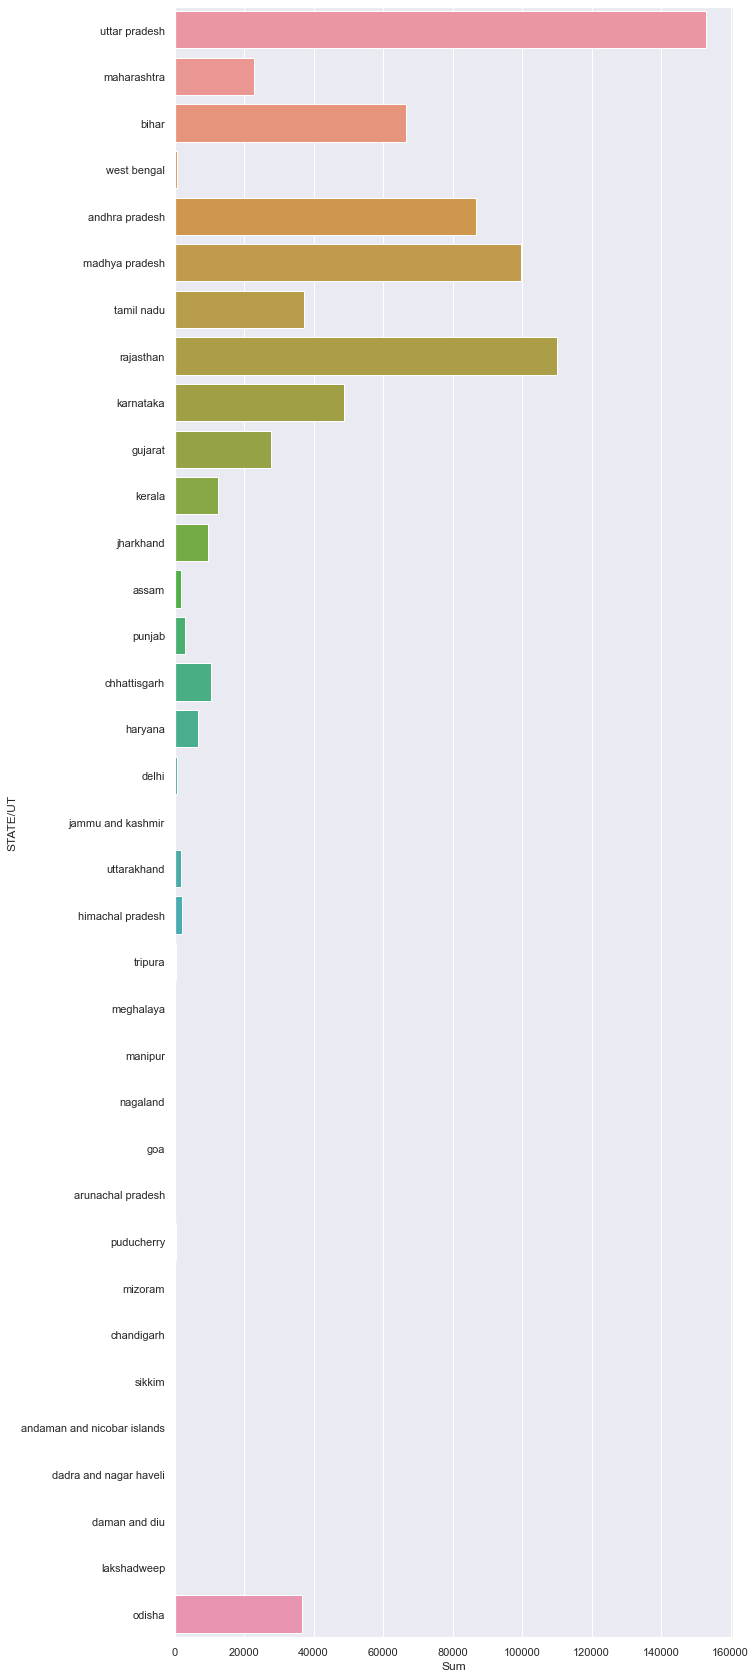

In [72]:
#sns.catplot(crime_against_sc.index, y = "Sum", data =crime_against_sc,kind="bar", height = 8, aspect = 3)
#plt.show()
sns.barplot(y = crime_against_sc.index, x = "Sum",data=crime_against_sc)
sns.set(rc={'figure.figsize':(10,60)})

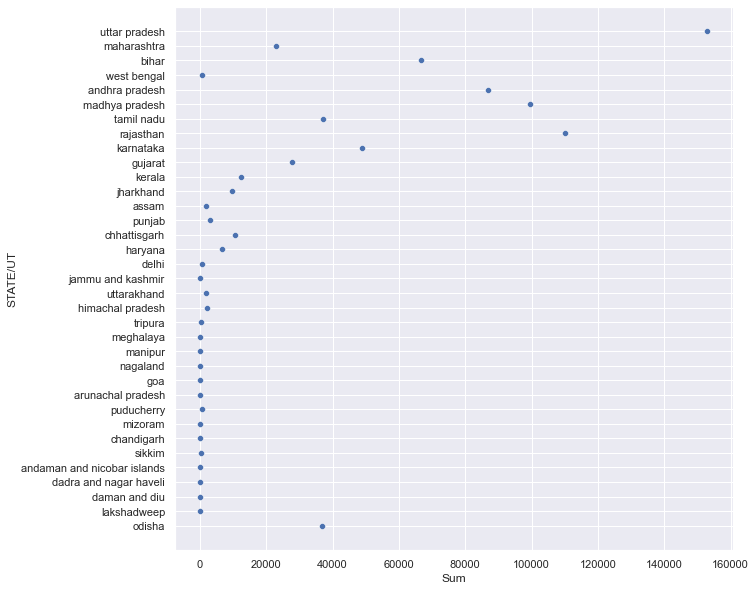

In [69]:
sns.scatterplot(crime_against_sc['Sum'],crime_against_sc.index)
plt.gcf().set_size_inches((10, 10)) 

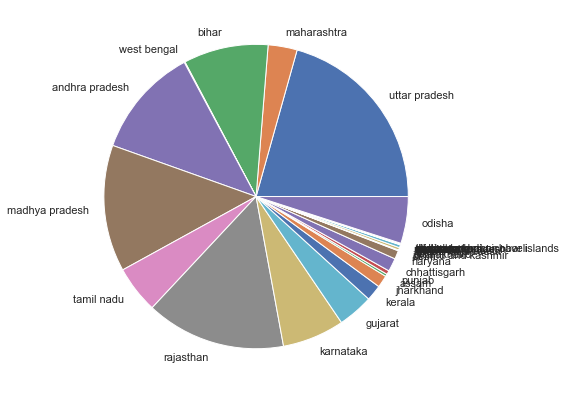

In [73]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_against_sc.Sum, labels =crime_against_sc.index)
plt.show()

It can be analyse from the both the graph that crime against sc is maximum in UP than rajasthan thirdly in MP. for low populated state it is showing almost negligible.

ANALYSIS OF DATA CRIME AGAINST ST

In [74]:
crime_against_st=pd.read_csv('crime_against_st.csv')
crime_against_st

STATE/UT       DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001       0     1                     2   
1     ANDHRA PRADESH      ANANTAPUR  2001       0     0                     0   
2     ANDHRA PRADESH       CHITTOOR  2001       0     0                     0   
3     ANDHRA PRADESH       CUDDAPAH  2001       0     0                     0   
4     ANDHRA PRADESH  EAST GODAVARI  2001       0     0                     0   
...              ...            ...   ...     ...   ...                   ...   
9013     LAKSHADWEEP    LAKSHADWEEP  2012       0     0                     0   
9014     LAKSHADWEEP          TOTAL  2012       0     0                     0   
9015      PUDUCHERRY       KARAIKAL  2012       0     0                     0   
9016      PUDUCHERRY     PUDUCHERRY  2012       0     0                     0   
9017      PUDUCHERRY          TOTAL  2012       0     0                     0   

      Dacoity  Robbery  Arson  Hurt  Protection of Civil Rights (PCR) Act  \
0           0        0      0     2                                     0   
1           0        0      0     7                                     0   
2           0        0      0     2                                     0   
3           0        0      0     2                                     0   
4           0        0      0     0                                     0   
...       ...      ...    ...   ...                                   ...   
9013        0        0      0     0                                     0   
9014        0        0      0     0                                     0   
9015        0        0      0     0                                     0   
9016        0        0      0     0                                     0   
9017        0        0      0     0                                     0   

      Prevention of atrocities (POA) Act  Other Crimes Against STs  
0                                      0                        13  
1                                      1                         6  
2                                      0                         0  
3                                      2                         0  
4                                      0                        14  
...                                  ...                       ...  
9013                                   0                         0  
9014                                   0                         0  
9015                                   0                         0  
9016                                   0                         0  
9017                                   0                         0  

[9018 rows x 13 columns]

In [75]:
crime_against_st['STATE/UT'] = crime_against_st['STATE/UT'] .apply(str.lower)

In [76]:
crime_against_st=crime_against_st.groupby(['STATE/UT']).sum()

In [77]:
crime_against_st=crime_against_st.drop('Year',1)

In [78]:
crime_against_st['Sum'] = crime_against_st.sum(axis=1)

In [79]:
p1=crime_against_sc['Population']

In [80]:
crime_against_st.insert(0,"Population",p1)

In [81]:
crime_against_st

Population  Murder  Rape  Kidnapping Abduction  \
STATE/UT                                                                        
andaman and nicobar islands           NaN       2     4                     2   
andhra pradesh                 84580777.0     198   904                    96   
arunachal pradesh               1383727.0      22    58                   102   
assam                          31205576.0     146   118                   146   
bihar                         104099452.0      32    62                     8   
chandigarh                      1055450.0       0     0                     0   
chhattisgarh                   25545198.0     440  2278                   128   
dadra and nagar haveli           343709.0       6     4                    14   
daman and diu                    243247.0       0     6                     0   
delhi                          16787941.0       0     0                     0   
goa                             1458545.0       0     0                     0   
gujarat                        60439692.0     196   482                   220   
haryana                        25351462.0       0     0                     0   
himachal pradesh                6864602.0       2    10                     2   
jammu and kashmir              12541302.0       0     0                     0   
jharkhand                      32988134.0     296   414                   188   
karnataka                      61095297.0      98    94                     8   
kerala                         33406061.0      28   706                    12   
lakshadweep                       64473.0       0     2                     0   
madhya pradesh                 72626809.0    1076  6696                   534   
maharashtra                   112374333.0     228  1150                   130   
manipur                         2855794.0       4    44                     2   
meghalaya                       2966889.0       0     2                     2   
mizoram                         1097206.0       8    22                     4   
nagaland                        1978502.0     316    50                    36   
odisha                                NaN     212   856                   162   
puducherry                      1247953.0       0     0                     0   
punjab                         27743338.0       0     0                     0   
rajasthan                      68548437.0     360   942                   142   
sikkim                           610577.0      18    26                    12   
tamil nadu                     72147030.0       6    46                     4   
tripura                         3673917.0       6    56                     6   
uttar pradesh                 199812341.0      20    10                     2   
uttarakhand                    10086292.0       6     4                     6   
west bengal                    91276115.0       4    90                    22   

                              Dacoity  Robbery  Arson  Hurt  \
STATE/UT                                                      
andaman and nicobar islands         0        0      0     2   
andhra pradesh                      0        6     38  2566   
arunachal pradesh                   2       12      8   404   
assam                              34       92     42   382   
bihar                               0        8     16   238   
chandigarh                          0        0      0     0   
chhattisgarh                       34       26     38  1284   
dadra and nagar haveli              0        0      0     6   
daman and diu                       0        0      0     0   
delhi                               0        0      0     0   
goa                                 0        0      0     0   
gujarat                           178      278     44  1002   
haryana                             0        0      0     0   
himachal pradesh                    2        0      0     0   
jammu and kashmir        

In [82]:
crime_against_st=crime_against_st.sort_values(by=['Population'],ascending=False)

In [83]:
crime_against_st

Population  Murder  Rape  Kidnapping Abduction  \
STATE/UT                                                                        
uttar pradesh                 199812341.0      20    10                     2   
maharashtra                   112374333.0     228  1150                   130   
bihar                         104099452.0      32    62                     8   
west bengal                    91276115.0       4    90                    22   
andhra pradesh                 84580777.0     198   904                    96   
madhya pradesh                 72626809.0    1076  6696                   534   
tamil nadu                     72147030.0       6    46                     4   
rajasthan                      68548437.0     360   942                   142   
karnataka                      61095297.0      98    94                     8   
gujarat                        60439692.0     196   482                   220   
kerala                         33406061.0      28   706                    12   
jharkhand                      32988134.0     296   414                   188   
assam                          31205576.0     146   118                   146   
punjab                         27743338.0       0     0                     0   
chhattisgarh                   25545198.0     440  2278                   128   
haryana                        25351462.0       0     0                     0   
delhi                          16787941.0       0     0                     0   
jammu and kashmir              12541302.0       0     0                     0   
uttarakhand                    10086292.0       6     4                     6   
himachal pradesh                6864602.0       2    10                     2   
tripura                         3673917.0       6    56                     6   
meghalaya                       2966889.0       0     2                     2   
manipur                         2855794.0       4    44                     2   
nagaland                        1978502.0     316    50                    36   
goa                             1458545.0       0     0                     0   
arunachal pradesh               1383727.0      22    58                   102   
puducherry                      1247953.0       0     0                     0   
mizoram                         1097206.0       8    22                     4   
chandigarh                      1055450.0       0     0                     0   
sikkim                           610577.0      18    26                    12   
dadra and nagar haveli           343709.0       6     4                    14   
daman and diu                    243247.0       0     6                     0   
lakshadweep                       64473.0       0     2                     0   
andaman and nicobar islands           NaN       2     4                     2   
odisha                                NaN     212   856                   162   

                              Dacoity  Robbery  Arson  Hurt  \
STATE/UT                                                      
uttar pradesh                       0        0      8    10   
maharashtra                        34       28    110   328   
bihar                               0        8     16   238   
west bengal                         0        0      0    10   
andhra pradesh                      0        6     38  2566   
madhya pradesh                     12       46    230  5556   
tamil nadu                          0        0     12   162   
rajasthan                           0       18    226  2782   
karnataka                           4        8     10   356   
gujarat                           178      278     44  1002   
kerala                              0        2     14   634   
jharkhand                          24       38    150  1186   
assam                              34       92     42   382   
punjab                              0        0      0     0   
chhattisgarh             

In [219]:
#sns.catplot(crime_against_st.index, y = "Sum", data =crime_against_st,kind="bar", height = 8, aspect = 3)
#plt.show()
sns.barplot(y = crime_against_st.index, x = "Sum",data=crime_against_st)
sns.set(rc={'figure.figsize':(300,200)})

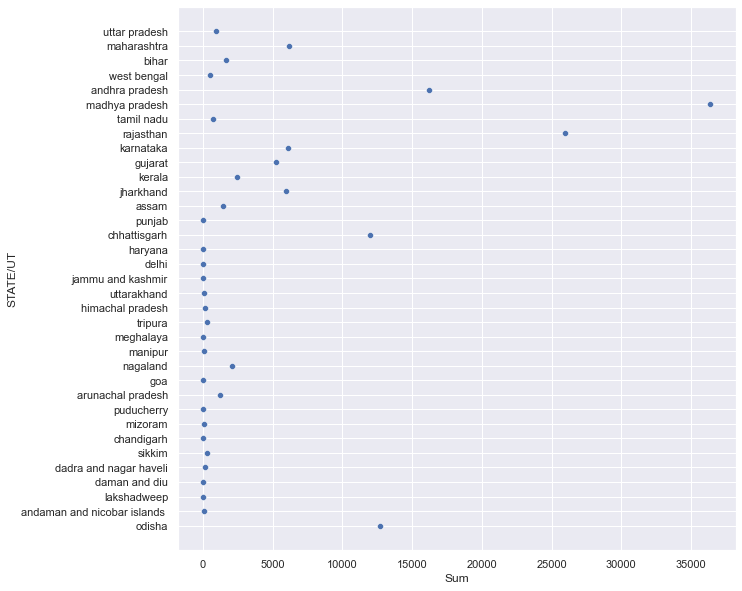

In [85]:
sns.scatterplot(crime_against_st['Sum'],crime_against_st.index)
plt.gcf().set_size_inches((10, 10)) 

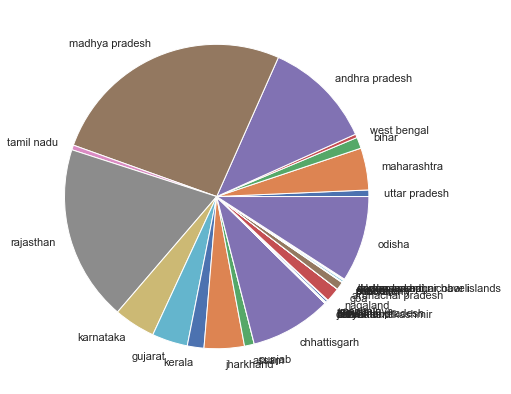

In [86]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_against_st.Sum, labels =crime_against_st.index)
plt.show()

Major state for crime against st are MP,rajasthan,andhra pradesh,chattisgarh,odisha.it can also be analysed that state having low population have less number of crime against st.

ANALYSIS OF DATA CRIME AGAINST CHILDREN

In [87]:
crime_against_children=pd.read_csv('crime_against_children.csv')
crime_against_children

STATE/UT       DISTRICT  Year  Murder  Rape  \
0     ANDHRA PRADESH       ADILABAD  2001     0.0   0.0   
1     ANDHRA PRADESH      ANANTAPUR  2001    19.0  12.0   
2     ANDHRA PRADESH       CHITTOOR  2001     0.0   0.0   
3     ANDHRA PRADESH       CUDDAPAH  2001     0.0   0.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001     0.0   0.0   
...              ...            ...   ...     ...   ...   
9010     LAKSHADWEEP    LAKSHADWEEP  2012     0.0   0.0   
9011     LAKSHADWEEP          TOTAL  2012     0.0   0.0   
9012      PUDUCHERRY       KARAIKAL  2012     0.0   3.0   
9013      PUDUCHERRY     PUDUCHERRY  2012     0.0   4.0   
9014      PUDUCHERRY          TOTAL  2012     0.0   7.0   

      Kidnapping and Abduction  Foeticide  Abetment of suicide  \
0                          0.0        0.0                  0.0   
1                         29.0        0.0                  6.0   
2                          0.0        0.0                  0.0   
3                          0.0        0.0                  0.0   
4                          0.0        0.0                  0.0   
...                        ...        ...                  ...   
9010                       0.0        0.0                  0.0   
9011                       0.0        0.0                  0.0   
9012                       2.0        0.0                  0.0   
9013                      16.0        0.0                  0.0   
9014                      18.0        0.0                  0.0   

      Exposure and abandonment  Procuration of minor girls  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
9010                       0.0                         0.0   
9011                       0.0                         0.0   
9012                       1.0                         0.0   
9013                       2.0                         0.0   
9014                       3.0                         0.0   

      Buying of girls for prostitution  Selling of girls for prostitution  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
...                                ...                                ...   
9010                               0.0                                0.0   
9011                               0.0                                0.0   
9012                               0.0                                0.0   
9013                               0.0                                0.0   
9014                               0.0                                0.0   

      Prohibition of child marriage act  Other Crimes  Total  
0                                   0.0           0.0      0  
1                                   0.0           0.0     66  
2                                   0.0           0.0      0  
3                                   0.0           0.0      0  
4                                   0.0           0.0      0  
...                                 ...           ...    ...  
9010                                0.0           0.0      0  
9011                                0.0           0.0      0  
9012                                0.0           1.0      7  
9013                                1.0           2.0     25  
9014                                1.0           3.0     32  

[9015 rows x 15 columns]

In [88]:
crime_against_children['STATE/UT'] = crime_against_children['STATE/UT'] .apply(str.lower)

In [89]:
crime_against_children=crime_against_children.groupby(['STATE/UT']).sum()

In [90]:
crime_against_children=crime_against_children.drop('Year',1)

In [91]:
crime_against_children.insert(0,"Population",p1)

In [92]:
crime_against_children=crime_against_children.sort_values(by=['Population'],ascending=False)

In [93]:
crime_against_children

Population  Murder     Rape  \
STATE/UT                                                    
uttar pradesh                199812341.0  9990.0  13978.0   
maharashtra                  112374333.0  4892.0  15570.0   
bihar                        104099452.0  1704.0   1312.0   
west bengal                   91276115.0   356.0   2058.0   
andhra pradesh                84580777.0  1772.0   9180.0   
madhya pradesh                72626809.0  3234.0  22194.0   
tamil nadu                    72147030.0  1650.0   3556.0   
rajasthan                     68548437.0  1436.0   6696.0   
karnataka                     61095297.0  1138.0   1736.0   
gujarat                       60439692.0  1672.0   2298.0   
kerala                        33406061.0  1120.0   4848.0   
jharkhand                     32988134.0   184.0    448.0   
assam                         31205576.0   134.0    934.0   
punjab                        27743338.0   848.0   2726.0   
chhattisgarh                  25545198.0  1034.0   8264.0   
haryana                       25351462.0   628.0   2714.0   
delhi                         16787941.0   992.0   6611.0   
jammu and kashmir             12541302.0    40.0    164.0   
uttarakhand                   10086292.0   168.0    372.0   
himachal pradesh               6864602.0   148.0   1320.0   
tripura                        3673917.0   112.0    948.0   
meghalaya                      2966889.0   118.0    992.0   
manipur                        2855794.0    72.0    230.0   
nagaland                       1978502.0    24.0     78.0   
goa                            1458545.0    56.0    464.0   
arunachal pradesh              1383727.0     0.0    222.0   
puducherry                     1247953.0    20.0     96.0   
mizoram                        1097206.0    68.0    648.0   
chandigarh                     1055450.0    40.0    304.0   
sikkim                          610577.0    44.0    268.0   
dadra and nagar haveli          343709.0    22.0     32.0   
daman and diu                   243247.0     8.0     26.0   
lakshadweep                      64473.0     2.0      0.0   
andamon and nicobar islands          NaN    18.0    148.0   
odisha                               NaN   318.0   1856.0   

                             Kidnapping and Abduction  Foeticide  \
STATE/UT                                                           
uttar pradesh                                 37012.0      106.0   
maharashtra                                   12792.0      240.0   
bihar                                         15152.0       18.0   
west bengal                                    5622.0        4.0   
andhra pradesh                                11026.0       46.0   
madhya pradesh                                 7362.0      468.0   
tamil nadu                                     5358.0        0.0   
rajasthan                                     10008.0      368.0   
karnataka                                      2282.0      118.0   
gujarat                                       10138.0       98.0   
kerala                                         1768.0        8.0   
jharkhand                                       314.0        8.0   
assam                                           435.0        4.0   
punjab                                         4922.0      414.0   
chhattisgarh                                   2942.0      203.0   
haryana                                        3466.0      180.0   
delhi                                         36055.0      116.0   
jammu and kashmir                               554.0        8.0   
uttarakhand                                     500.0        1.0   
himachal pradesh                               1368.0       36.0   
tripura                                         232.0        0.0   
meghalaya                                       224.0        0.0   
manipur                                         878.0        0.0   
nagaland                                         34.0        0.0   
goa 

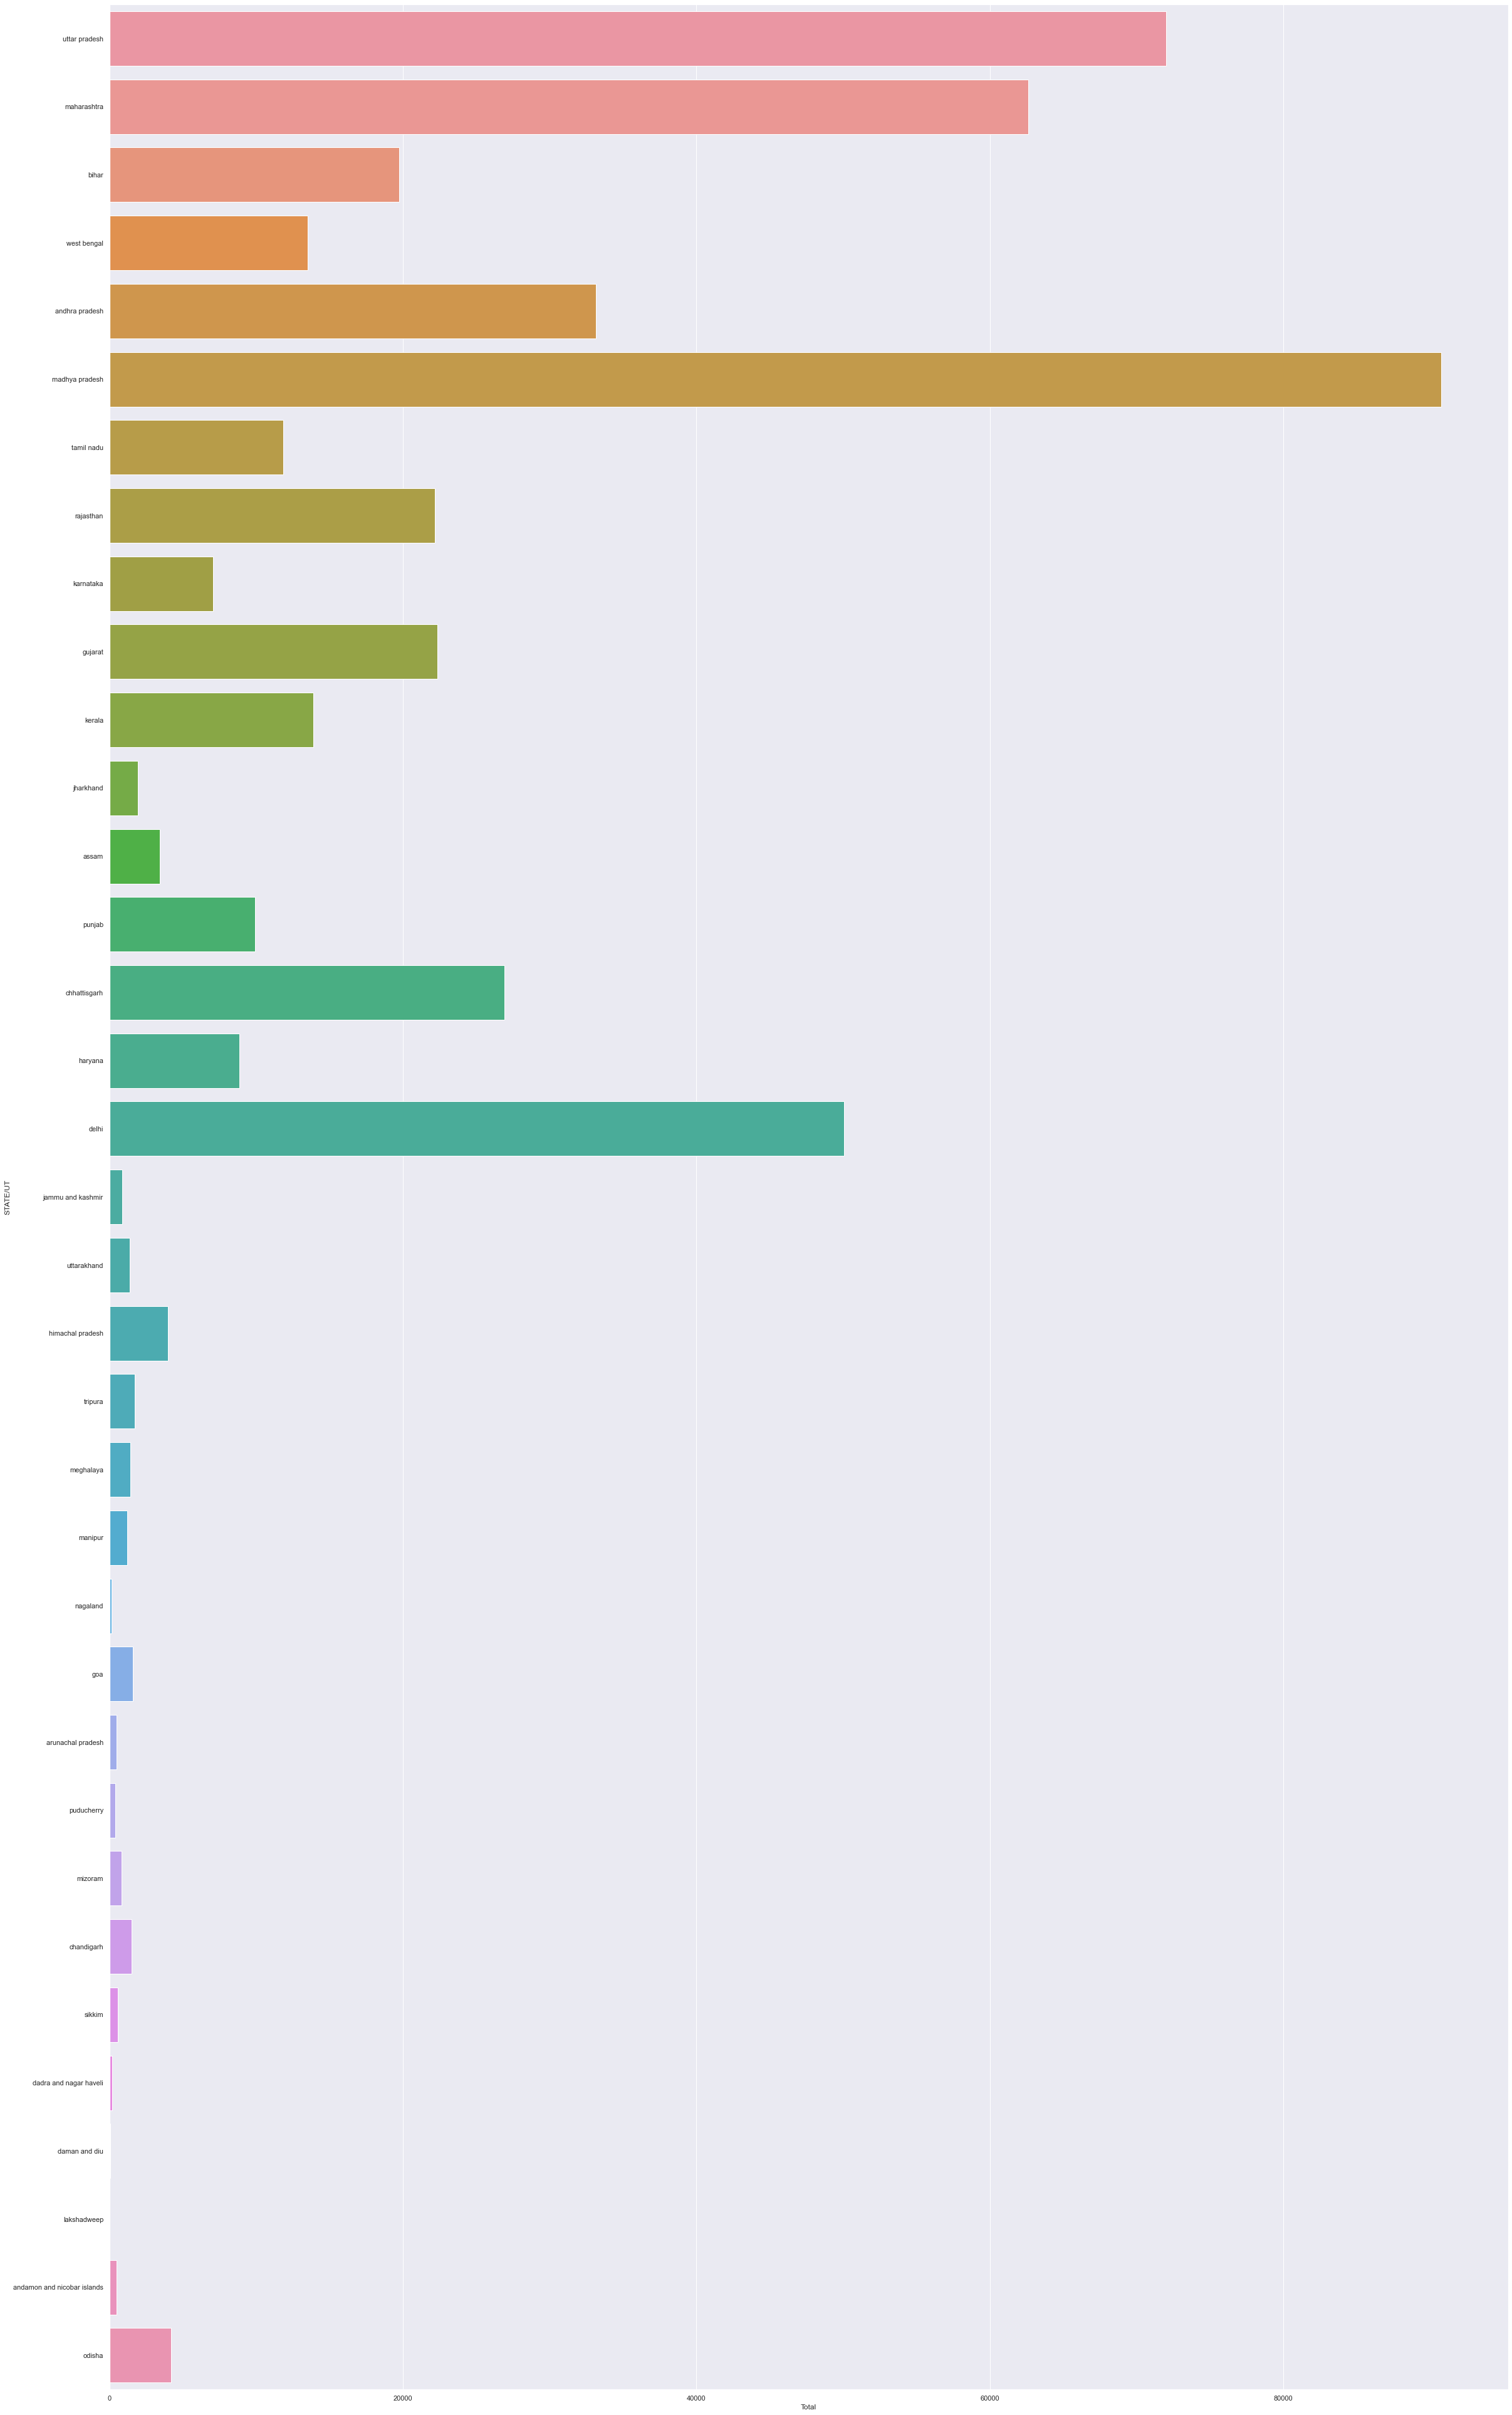

In [211]:
#sns.catplot(crime_against_children.index, y = "Total", data =crime_against_children,kind="bar", height = 8, aspect = 3)
#plt.show()
sns.barplot(y = crime_against_children.index, x = "Total",data=crime_against_children)
sns.set(rc={'figure.figsize':(5,45)})

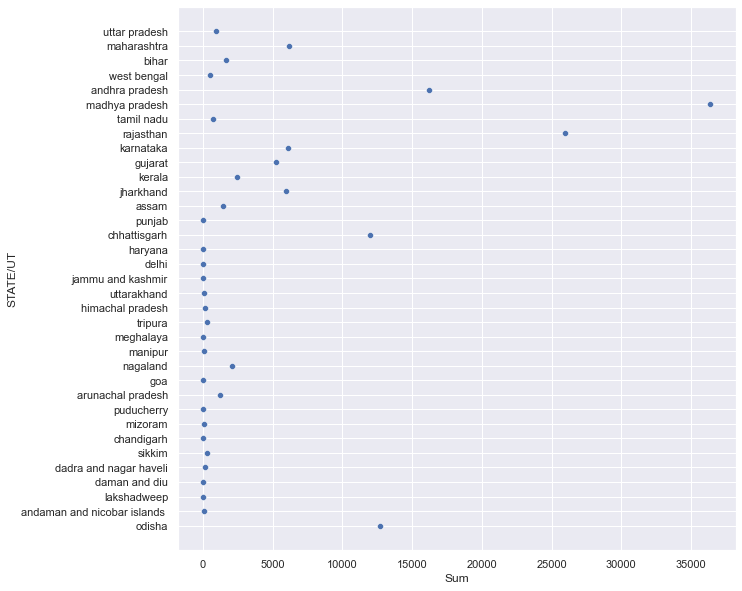

In [95]:
sns.scatterplot(crime_against_st['Sum'],crime_against_st.index)
plt.gcf().set_size_inches((10, 10)) 

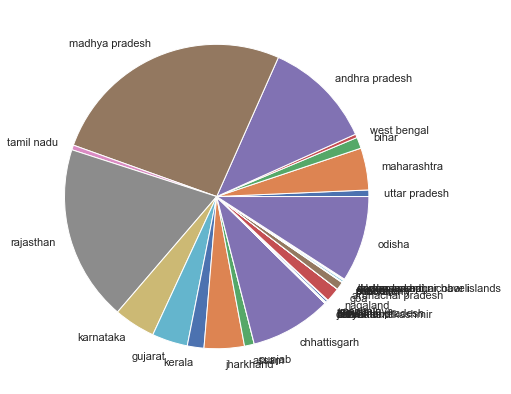

In [96]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_against_st.Sum, labels =crime_against_st.index)
plt.show()

offence against children can be majorly seen in madhya pradesh,rajasthan,andhra padesh,odisha,chattisgarh.it can also observed from scatterplot that low populated state have low crime against children.

ANALYSIS OF DATA CRIME AGAINST WOMEN

In [97]:
crime_against_women=pd.read_csv('crime_against_women.csv')
crime_against_women

STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001    50                        30   
1     ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2     ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3     ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4     ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   
...              ...            ...   ...   ...                       ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012     0                         0   
9013     LAKSHADWEEP          TOTAL  2012     0                         0   
9014      PUDUCHERRY       KARAIKAL  2012     6                         2   
9015      PUDUCHERRY     PUDUCHERRY  2012     7                        14   
9016      PUDUCHERRY          TOTAL  2012    13                        16   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...                          ...                                  ...   
9012                           0                                    1   
9013                           0                                    1   
9014                           0                                    1   
9015                           2                                    5   
9016                           2                                    6   

      Importation of Girls  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
9012                     0  
9013                     0  
9014                     0  
9015                     0  
9016                     0  

[9017 rows x 10 columns]

In [98]:
crime_against_women['STATE/UT'] = crime_against_women['STATE/UT'] .apply(str.lower)

In [99]:
crime_against_women=crime_against_women.groupby(['STATE/UT']).sum()

In [100]:
crime_against_women=crime_against_women.drop('Year',1)

In [101]:
crime_against_women["Sum"]=crime_against_women.sum(axis=1)


In [102]:
crime_against_women.insert(0,"Population",p1)

In [103]:
crime_against_women=crime_against_women.sort_values(by=['Population'],ascending=False)

In [104]:
crime_against_women

Population   Rape  Kidnapping and Abduction  \
STATE/UT                                                                    
uttar pradesh                199812341.0  38116                     95180   
maharashtra                  112374333.0  35972                     21706   
bihar                        104099452.0  26248                     38778   
west bengal                   91276115.0  41574                     43546   
andhra pradesh                84580777.0  26958                     29872   
madhya pradesh                72626809.0  72174                     18486   
tamil nadu                    72147030.0  13904                     24872   
rajasthan                     68548437.0  31596                     49342   
karnataka                     61095297.0  10348                     10630   
gujarat                       60439692.0   8498                     25836   
kerala                        33406061.0  14894                      3796   
jharkhand                     32988134.0  18318                     10564   
assam                         31205576.0  32356                     45840   
punjab                        27743338.0  10918                     10770   
chhattisgarh                  25545198.0  23676                      5260   
haryana                       25351462.0  12820                     12258   
delhi                         16787941.0  12848                     31300   
jammu and kashmir             12541302.0   5620                     17640   
uttarakhand                   10086292.0   2756                      4668   
himachal pradesh               6864602.0   3608                      3082   
tripura                        3673917.0   4116                      1750   
meghalaya                      2966889.0   2040                       528   
manipur                        2855794.0    774                      2114   
nagaland                       1978502.0    440                       142   
goa                            1458545.0    700                       328   
arunachal pradesh              1383727.0   1000                      1116   
puducherry                     1247953.0    154                       242   
mizoram                        1097206.0   1652                        20   
chandigarh                     1055450.0    562                      1068   
sikkim                          610577.0    390                       124   
andaman and nicobar islands     380581.0    218                       154   
dadra and nagar haveli          343709.0    112                       188   
daman and diu                   243247.0     40                        30   
lakshadweep                      64473.0     14                         2   
odisha                               NaN  22860                     16582   

                             Dowry Deaths  \
STATE/UT                                    
uttar pradesh                       47648   
maharashtra                          8498   
bihar                               27096   
west bengal                         10344   
andhra pradesh                      12430   
madhya pradesh                      18072   
tamil nadu                           4634   
rajasthan                           10132   
karnataka                            5836   
gujarat                              1004   
kerala                                602   
jharkhand                            6582   
assam                                2552   
punjab                               3092   
chhattisgarh                         2284   
haryana                              6260   
delhi                                3164   
jammu and kashmir                     270   
uttarakhand                          1812   
himachal pradesh                      110   
tripura                               628   
meghalaya                              30   
manipur                                 4   
nagaland                                0   
goa       

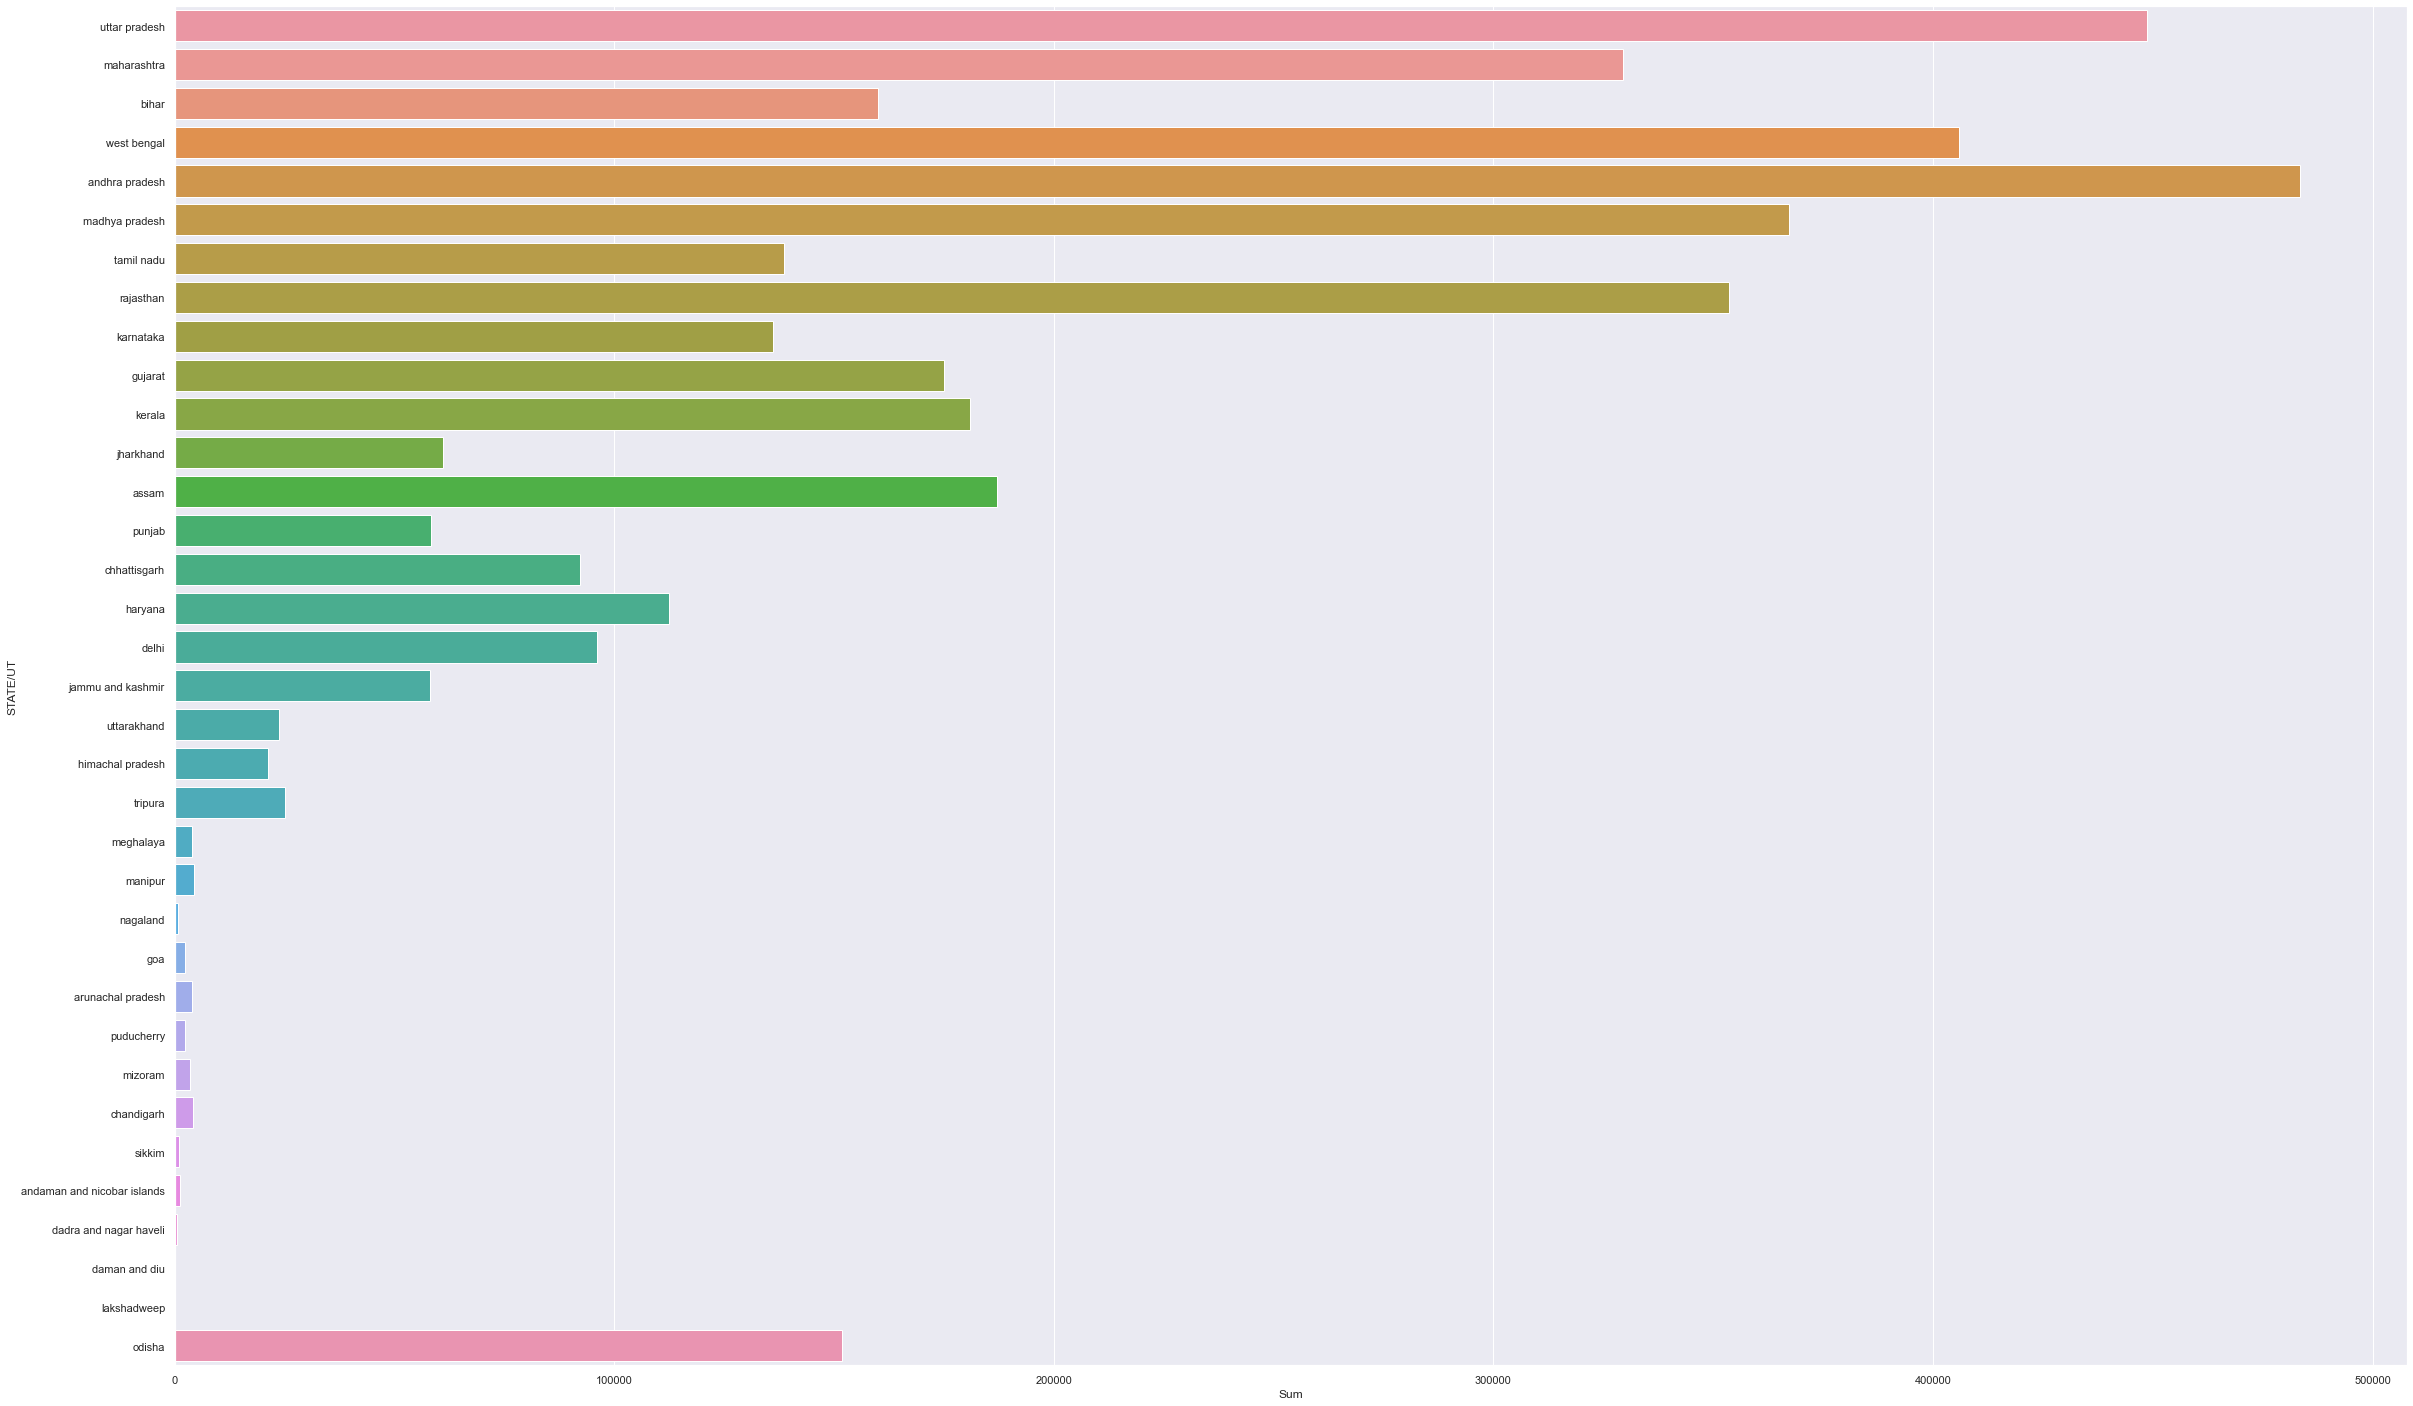

In [210]:
#sns.catplot(crime_against_women.index, y = "Sum", data =crime_against_women,kind="bar", height = 8, aspect = 3)
#plt.show()
sns.barplot(y = crime_against_women.index, x = "Sum",data=crime_against_women)
sns.set(rc={'figure.figsize':(40,70)})

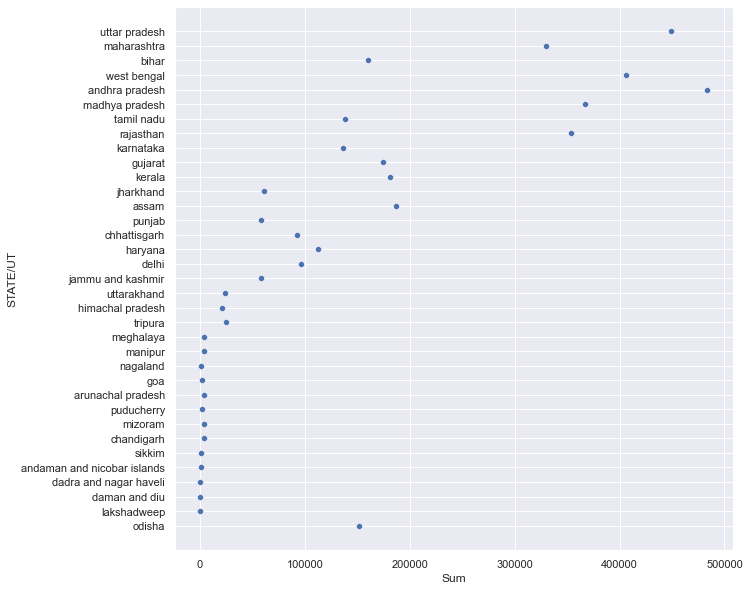

In [106]:
sns.scatterplot(crime_against_women['Sum'],crime_against_women.index)
plt.gcf().set_size_inches((10, 10)) 

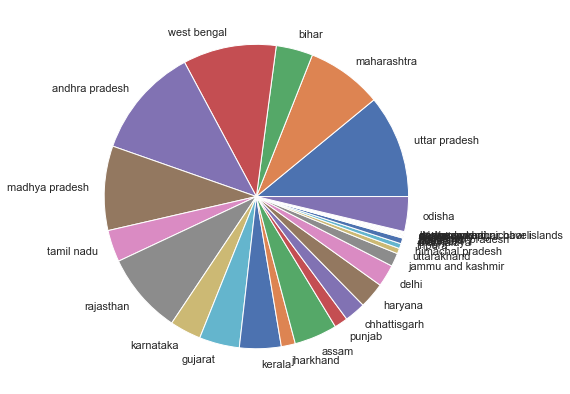

In [107]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_against_women.Sum, labels =crime_against_women.index)
plt.show()

major state for crime against women are UP,Maharastra,west bengal,andhra pradesh,madhya pradesh.state with high population are showing more crime against women and state with less population are showing low crime rate.here kerala is exception as it is low population but accordingly crime is high

ANALYSIS OF DATA CRIME AGAINST PROPERTY STOLEN

In [108]:
crime_property_stolen=pd.read_csv('crime_property_stolen.csv')
crime_property_stolen

Area_Name  Year              Group_Name  \
0     Andaman and Nicobar Islands  2001       Cattle - Property   
1                  Andhra Pradesh  2001       Cattle - Property   
2               Arunachal Pradesh  2001       Cattle - Property   
3                           Assam  2001       Cattle - Property   
4                           Bihar  2001       Cattle - Property   
...                           ...   ...                     ...   
4545                   Tamil Nadu  2010  Total Property(Nature)   
4546                      Tripura  2010  Total Property(Nature)   
4547                Uttar Pradesh  2010  Total Property(Nature)   
4548                  Uttarakhand  2010  Total Property(Nature)   
4549                  West Bengal  2010  Total Property(Nature)   

                         Sub_Group_Name  Cases_Property_Recovered  \
0                             2. Cattle                         0   
1                             2. Cattle                       448   
2                             2. Cattle                        22   
3                             2. Cattle                       149   
4                             2. Cattle                       144   
...                                 ...                       ...   
4545  Total Property Stolen & Recovered                     16125   
4546  Total Property Stolen & Recovered                       192   
4547  Total Property Stolen & Recovered                      9130   
4548  Total Property Stolen & Recovered                       964   
4549  Total Property Stolen & Recovered                      4548   

      Cases_Property_Stolen  Value_of_Property_Recovered  \
0                         1                            0   
1                       580                      6490596   
2                        34                       135500   
3                       322                       683350   
4                       334                       896019   
...                     ...                          ...   
4545                  21509                    660311804   
4546                    879                      5666102   
4547                  35068                    577591772   
4548                   2234                     47135685   
4549                  23759                   1168242161   

      Value_of_Property_Stolen  
0                         1000  
1                      7233876  
2                       704500  
3                      1816386  
4                      1911068  
...                        ...  
4545                1317919190  
4546                  33032746  
4547                1442670414  
4548                 123398840  
4549                5015168687  

[4550 rows x 8 columns]

In [109]:
crime_property_stolen['Area_Name'] = crime_property_stolen['Area_Name'] .apply(str.lower)

In [110]:
crime_property_stolen=crime_property_stolen.groupby(['Area_Name']).sum()

In [111]:
crime_property_stolen=crime_property_stolen.drop('Year',1)

In [112]:
p1=crime_against_sc['Population']

In [113]:
crime_property_stolen.insert(0,"Population",p1)

In [114]:
crime_property_stolen=crime_property_stolen.sort_values(by=['Population'],ascending=False)

In [115]:
crime_property_stolen.head()

Population  Cases_Property_Recovered  Cases_Property_Stolen  \
Area_Name                                                                      
uttar pradesh   199812341.0                    194531                 672276   
maharashtra     112374333.0                    515253                1535782   
bihar           104099452.0                     67602                 437835   
west bengal      91276115.0                     92953                 405243   
andhra pradesh   84580777.0                    365664                 707653   

                Value_of_Property_Recovered  Value_of_Property_Stolen  
Area_Name                                                              
uttar pradesh                   16116759792               29094427241  
maharashtra                     29543342881              217063089987  
bihar                            1444176791                9295129888  
west bengal                      5822200089               25543386953  
andhra pradesh                  10042202784               21583696194

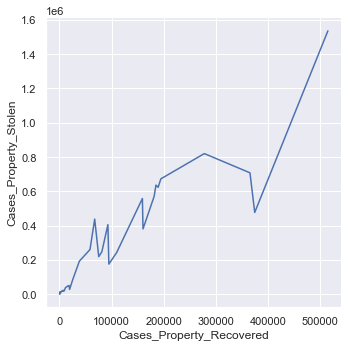

In [116]:

sns.relplot(data=crime_property_stolen, x="Cases_Property_Recovered", y="Cases_Property_Stolen", kind="line")

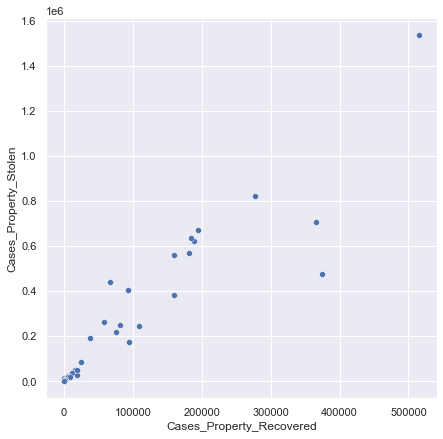

In [117]:
sns.scatterplot(crime_property_stolen.Cases_Property_Recovered,crime_property_stolen.Cases_Property_Stolen)
plt.gcf().set_size_inches((7, 7)) 

it can be analysed that rate of case of stolen property is near by rate of recovery except few states 

analysis of stolen cases

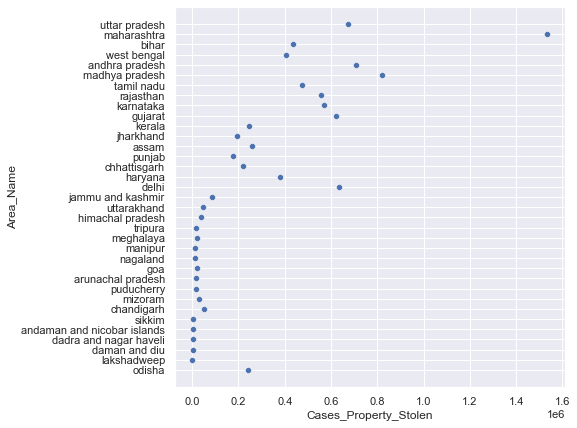

In [118]:
sns.scatterplot(crime_property_stolen['Cases_Property_Stolen'],crime_property_stolen.index)
plt.gcf().set_size_inches((7, 7)) 

from above plot it can be infered that maximum case of stolen is in maharastra  than  MP, at third it is andra pradesh irrespective to population. state with low population are showing less cases

recovery cases analysis 

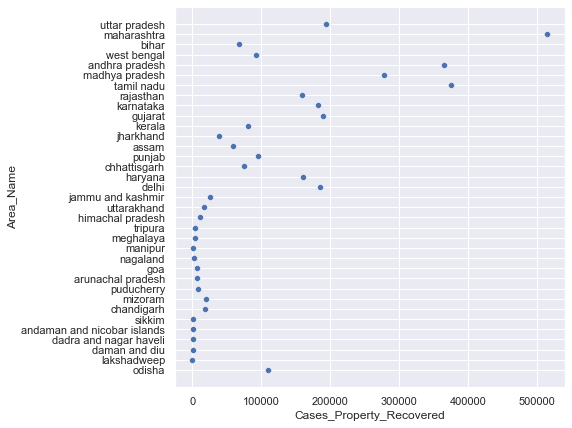

In [119]:
sns.scatterplot(crime_property_stolen['Cases_Property_Recovered'],crime_property_stolen.index)
plt.gcf().set_size_inches((7, 7)) 

recovery rate it also highest for maharastra than at second tamil nadu,at third andhra pradesh. state having low population also shows low case of recovery because stolen rate was also very less 

ANALYSIS OF DATA FOR PLACE OF OCCURRENCE

In [120]:
crime_by_place_of_occurrence=pd.read_csv('crime_by_place_of_occurrence.csv')
crime_by_place_of_occurrence

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0       ANDHRA PRADESH  2001                             100   
1    ARUNACHAL PRADESH  2001                               9   
2                ASSAM  2001                             381   
3                BIHAR  2001                             818   
4         CHHATTISGARH  2001                              54   
..                 ...   ...                             ...   
451              DELHI  2012                              10   
452        LAKSHADWEEP  2012                               0   
453         PUDUCHERRY  2012                               1   
454        TOTAL (UTs)  2012                              11   
455  TOTAL (ALL-INDIA)  2012                            1288   

     RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                               177                             5158   
1                                26                               99   
2                               191                             1695   
3                               326                             2486   
4                                42                             3336   
..                              ...                              ...   
451                             101                             1249   
452                               0                                3   
453                               4                               47   
454                             123                             1515   
455                            2821                            60698   

     RESIDENTIAL PREMISES - Theft  TOTAL-RESIDENTIAL  HIGHWAYS - Dacoity  \
0                            4257               9692                  57   
1                             131                265                   0   
2                            2901               5168                  46   
3                            4741               8371                 162   
4                            1417               4849                  10   
..                            ...                ...                 ...   
451                          7076               8436                   1   
452                             7                 10                   0   
453                            42                 94                   0   
454                          7974               9623                   1   
455                         81861             146668                 838   

     HIGHWAYS - Robbery  HIGHWAYS - Burglary  ...  TOTAL-COMMERCIAL  \
0                   172                   31  ...              3569   
1                     0                    0  ...               161   
2                   136                    7  ...              1514   
3                   826                    0  ...              1052   
4                    38                   12  ...               682   
..                  ...                  ...  ...               ...   
451                  32                    0  ...              1687   
452                   0                    0  ...                 0   
453                   0                    0  ...                52   
454                  32                    0  ...              2517   
455                5000                  316  ...             43151   

     OTHER PLACES - Dacoity  OTHER PLACES - Robbery  OTHER PLACES - Burglary  \
0                        37                     232                      862   
1                         8                      40                       65   
2                        77                     261                      271   
3                       210                     880                      505   
4                        15                     239                      420   
..                      ...                     ...                      ...   
451                      17                     431   

Added some of column in excel sheet for showing total crime at different place of occurrence.

In [121]:
crime_by_place_of_occurrence['STATE/UT'] = crime_by_place_of_occurrence['STATE/UT'] .apply(str.lower)

In [122]:
crime_by_place_of_occurrence=crime_by_place_of_occurrence.groupby(['STATE/UT']).sum()

In [123]:
crime_by_place_of_occurrence=crime_by_place_of_occurrence.drop('YEAR',1)

In [124]:
crime_by_place_of_occurrence.insert(0,"Population",p1)

In [125]:
crime_by_place_of_occurrence=crime_by_place_of_occurrence.sort_values(by=['Population'],ascending=False)

In [126]:
crime_by_place_of_occurrence

Population  RESIDENTIAL PREMISES - Dacoity  \
STATE/UT                                                                   
uttar pradesh                199812341.0                            1864   
maharashtra                  112374333.0                            1860   
bihar                        104099452.0                            6606   
west bengal                   91276115.0                             886   
andhra pradesh                84580777.0                             845   
madhya pradesh                72626809.0                             572   
tamil nadu                    72147030.0                             414   
rajasthan                     68548437.0                              83   
karnataka                     61095297.0                             710   
gujarat                       60439692.0                            1166   
kerala                        33406061.0                             282   
jharkhand                     32988134.0                            2757   
assam                         31205576.0                            2612   
punjab                        27743338.0                             107   
chhattisgarh                  25545198.0                             636   
haryana                       25351462.0                             225   
delhi                         16787941.0                             145   
jammu and kashmir             12541302.0                              88   
uttarakhand                   10086292.0                             166   
himachal pradesh               6864602.0                               6   
tripura                        3673917.0                             128   
meghalaya                      2966889.0                             208   
manipur                        2855794.0                               5   
nagaland                       1978502.0                              31   
goa                            1458545.0                              24   
arunachal pradesh              1383727.0                             119   
puducherry                     1247953.0                              10   
mizoram                        1097206.0                              10   
chandigarh                     1055450.0                               3   
sikkim                          610577.0                               3   
dadra and nagar haveli          343709.0                              17   
daman and diu                   243247.0                               4   
lakshadweep                      64473.0                               2   
andamon and nicobar islands          NaN                               0   
odisha                               NaN                            1067   
total (all-india)                    NaN                           22105   
total (states)                       NaN                           23480   
total (uts)                          NaN                             181   

                             RESIDENTIAL PREMISES - Robbery  \
STATE/UT                                                      
uttar pradesh                                          2725   
maharashtra                                            4221   
bihar                                                  2823   
west bengal                                            1036   
andhra pradesh                                         2612   
madhya pradesh                                         2819   
tamil nadu                                             2752   
rajasthan                                               272   
karnataka                                              3098   
gujarat                                                2245   
kerala                                                 1907   
jharkhand                                              2124   
assam                                                  2357   
punjab                                      

In [127]:
crime_by_place_of_occurrence.drop(index=crime_by_place_of_occurrence.index[-1],axis=0,inplace = True)
#df.drop(index=df.index[-1],axis=0,inplace=True)

In [128]:
crime_by_place_of_occurrence.drop(index=crime_by_place_of_occurrence.index[-1],axis=0,inplace = True)

In [129]:
crime_by_place_of_occurrence.drop(index=crime_by_place_of_occurrence.index[-1],axis=0,inplace = True)

In [130]:
crime_by_place_of_occurrence

Population  RESIDENTIAL PREMISES - Dacoity  \
STATE/UT                                                                   
uttar pradesh                199812341.0                            1864   
maharashtra                  112374333.0                            1860   
bihar                        104099452.0                            6606   
west bengal                   91276115.0                             886   
andhra pradesh                84580777.0                             845   
madhya pradesh                72626809.0                             572   
tamil nadu                    72147030.0                             414   
rajasthan                     68548437.0                              83   
karnataka                     61095297.0                             710   
gujarat                       60439692.0                            1166   
kerala                        33406061.0                             282   
jharkhand                     32988134.0                            2757   
assam                         31205576.0                            2612   
punjab                        27743338.0                             107   
chhattisgarh                  25545198.0                             636   
haryana                       25351462.0                             225   
delhi                         16787941.0                             145   
jammu and kashmir             12541302.0                              88   
uttarakhand                   10086292.0                             166   
himachal pradesh               6864602.0                               6   
tripura                        3673917.0                             128   
meghalaya                      2966889.0                             208   
manipur                        2855794.0                               5   
nagaland                       1978502.0                              31   
goa                            1458545.0                              24   
arunachal pradesh              1383727.0                             119   
puducherry                     1247953.0                              10   
mizoram                        1097206.0                              10   
chandigarh                     1055450.0                               3   
sikkim                          610577.0                               3   
dadra and nagar haveli          343709.0                              17   
daman and diu                   243247.0                               4   
lakshadweep                      64473.0                               2   
andamon and nicobar islands          NaN                               0   
odisha                               NaN                            1067   

                             RESIDENTIAL PREMISES - Robbery  \
STATE/UT                                                      
uttar pradesh                                          2725   
maharashtra                                            4221   
bihar                                                  2823   
west bengal                                            1036   
andhra pradesh                                         2612   
madhya pradesh                                         2819   
tamil nadu                                             2752   
rajasthan                                               272   
karnataka                                              3098   
gujarat                                                2245   
kerala                                                 1907   
jharkhand                                              2124   
assam                                                  2357   
punjab                                                  314   
chhattisgarh                                            619   
haryana                                                 716   
delhi                                                  1092   
jammu and kashmir   

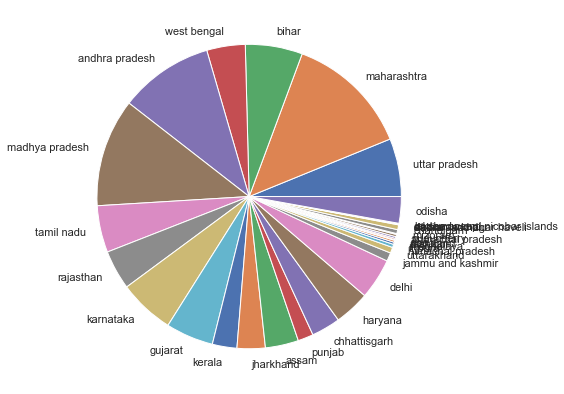

In [131]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-RESIDENTIAL'],labels=crime_by_place_of_occurrence.index)
plt.show()

In [205]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-RESIDENTIAL",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(60,300)})

ploting graph between state and total residential,it can be observed that as population increases  crime at residential area also increases,maximum it is showing in maharastra than MP than AP .it is showing low for lower populated state.

TOTAL-HIGHWAYS v STATE

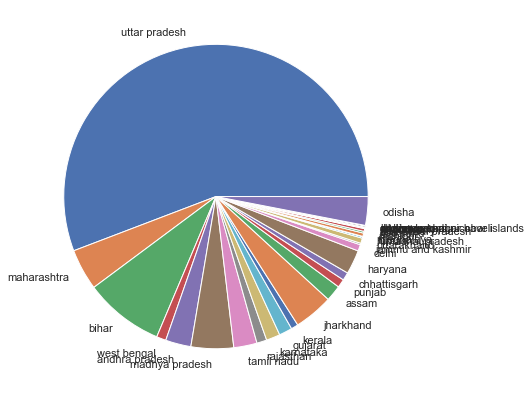

In [133]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-HIGHWAYS'],labels=crime_by_place_of_occurrence.index)
plt.show()

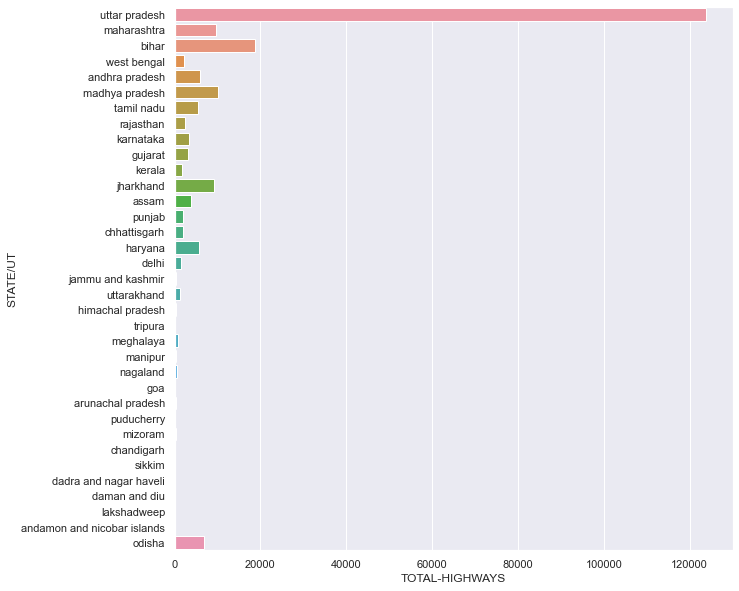

In [134]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-HIGHWAYS",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

Crime at highway cases can be seen maximum in UP. it cover nearly 55 to 60 % of total value alone.after that bihar is showing maximum value,rest all are showing minimum values. 

TOTAL-RIVER and SEA v STATE

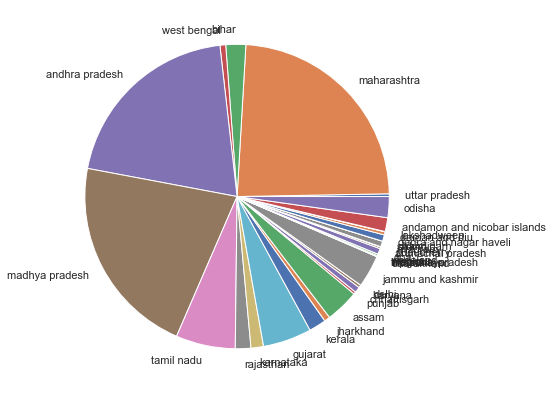

In [135]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-RIVER and SEA'],labels=crime_by_place_of_occurrence.index)
plt.show()

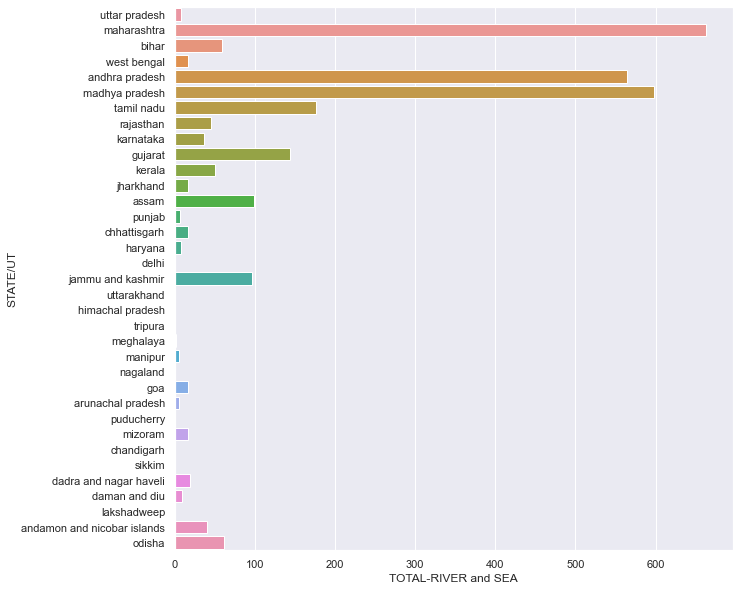

In [136]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-RIVER and SEA",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

it can be observed from piechart that nearly two third number of cases are covered only by three states they are maharastra,MP and AP. some of ut which are near to sea it can been seen cases are present there also.in north east states mizoram and arunchal pradesh is showing some of the cases.

TOTAL-RAILWAYS v state

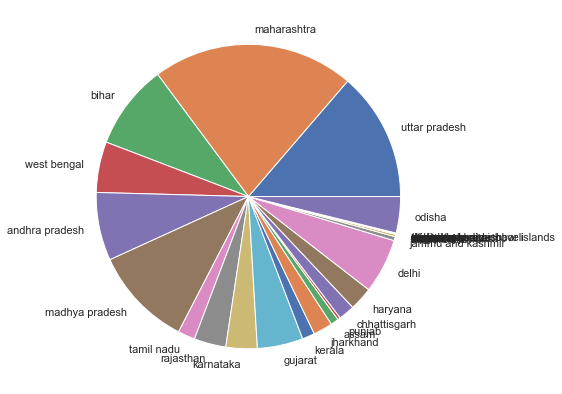

In [137]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-RAILWAYS'],labels=crime_by_place_of_occurrence.index)
plt.show()

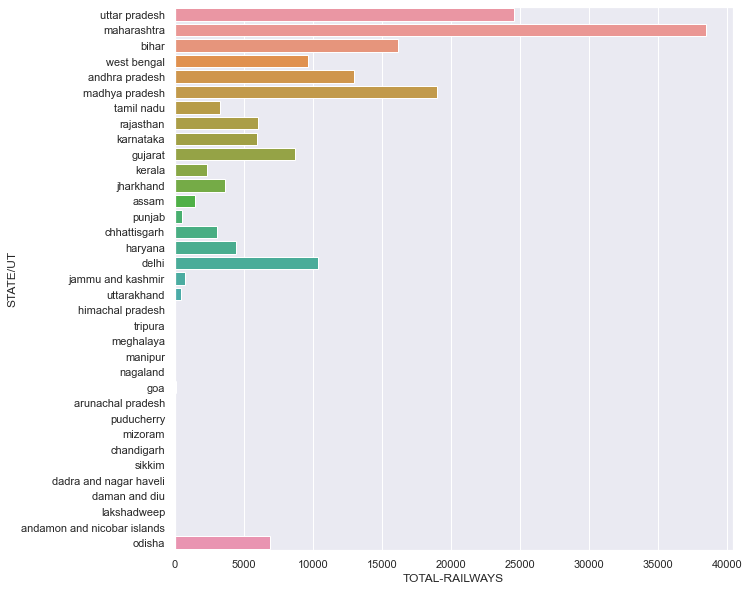

In [138]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-RAILWAYS",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

Crime in rail or in railway premises can be seen maximum for maharastra followed by UP. UT except delhi and north east state we can see that crime is almost neligible.

TOTAL-BANKS v STATE

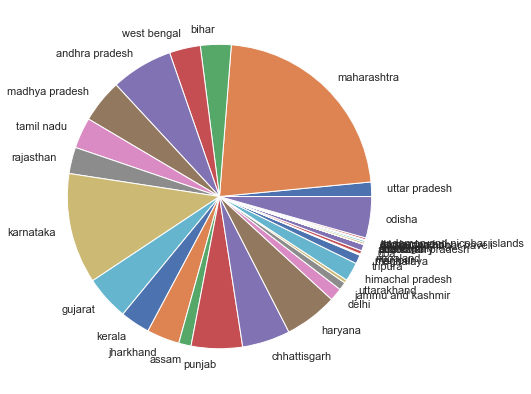

In [139]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-BANKS'],labels=crime_by_place_of_occurrence.index)
plt.show()

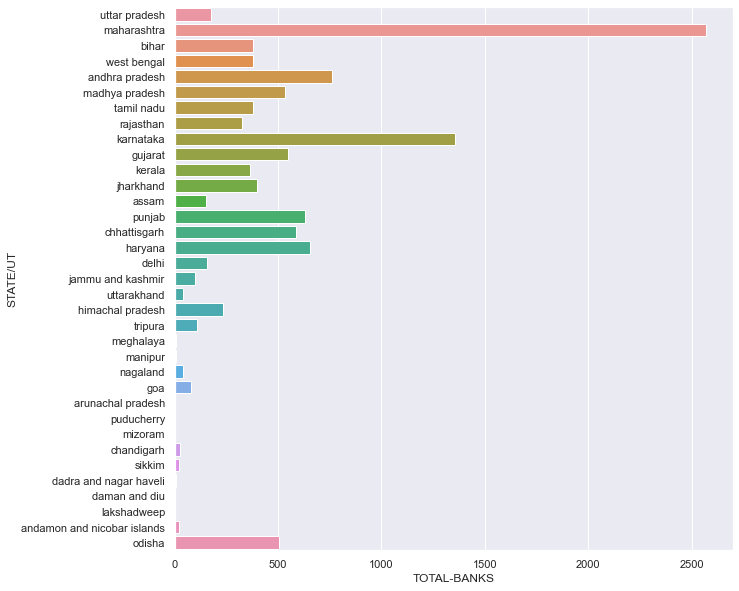

In [140]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-BANKS",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

Crime done at bank premises are maximum in maharastra and than karnataka.north east and ut are showing low value except delhi,which is also not very large value.

TOTAL-OTHER PLACES v STATE

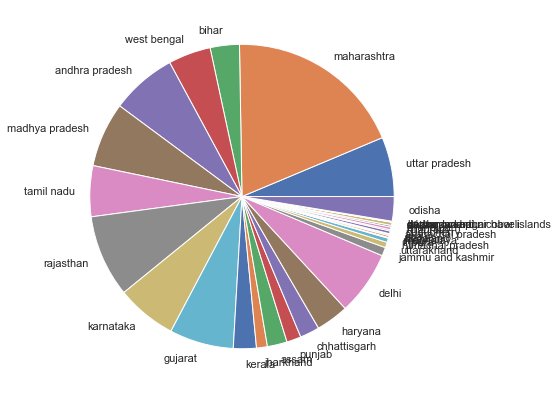

In [141]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-OTHER PLACES'],labels=crime_by_place_of_occurrence.index)
plt.show()

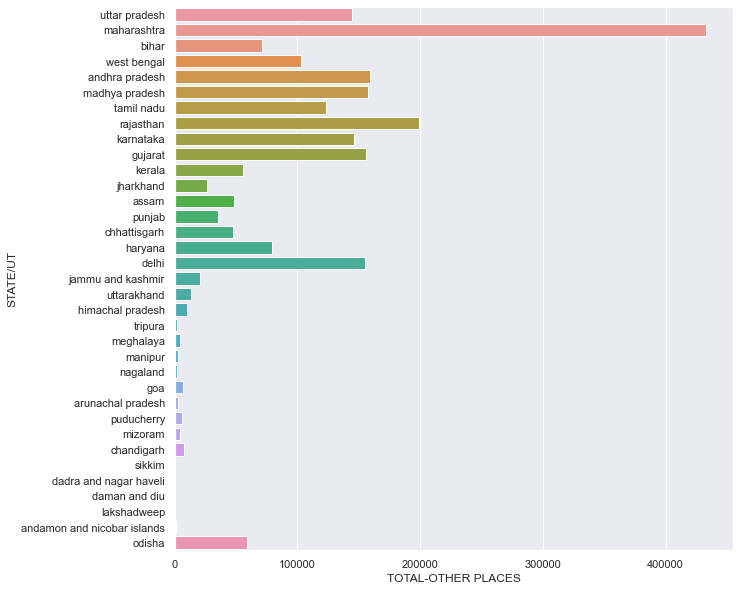

In [142]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-OTHER PLACES",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

for other places number of cases can be seen maximum in maharastra followed by rajasthan and than AP. for ut it can be seen that delhi is showing maximum. other ut and north east are showing least.

TOTAL-COMMERCIAL v STATE

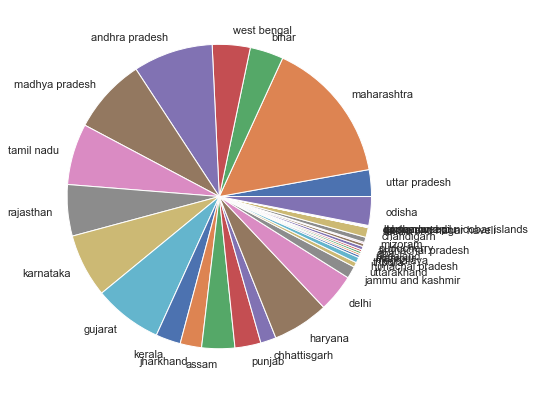

In [143]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL-COMMERCIAL'],labels=crime_by_place_of_occurrence.index)
plt.show()

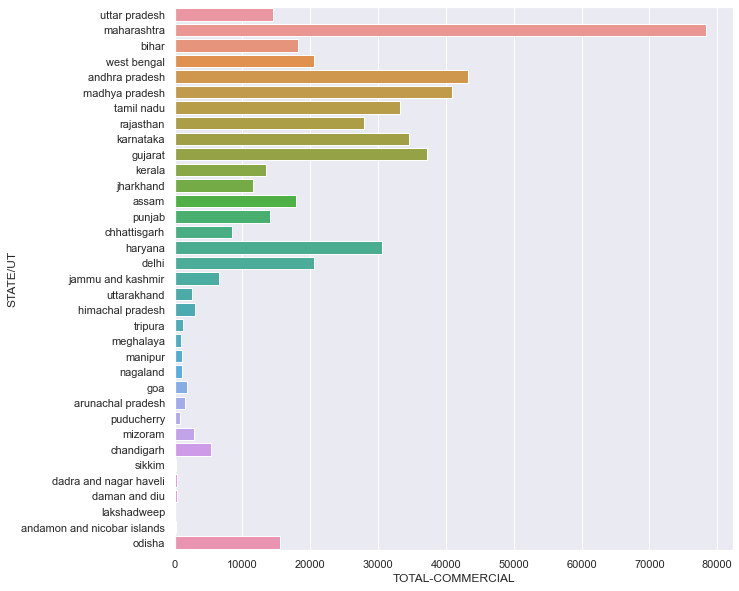

In [144]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL-COMMERCIAL",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

When crime is done at commercial place no of cases for maharastra is very large as compare to any other state. at second nearly half no of cases can be seen in AP. when we see UT than max cases can be seen in chandigarh.in norht east state mizoram is showing max. cases.

TOTAL - Dacoity v STATE

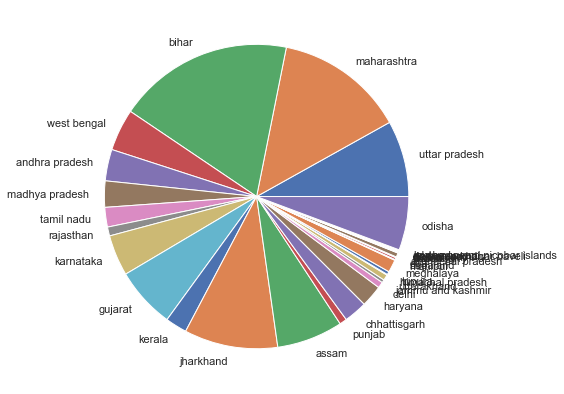

In [145]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL - Dacoity'],labels=crime_by_place_of_occurrence.index)
plt.show()

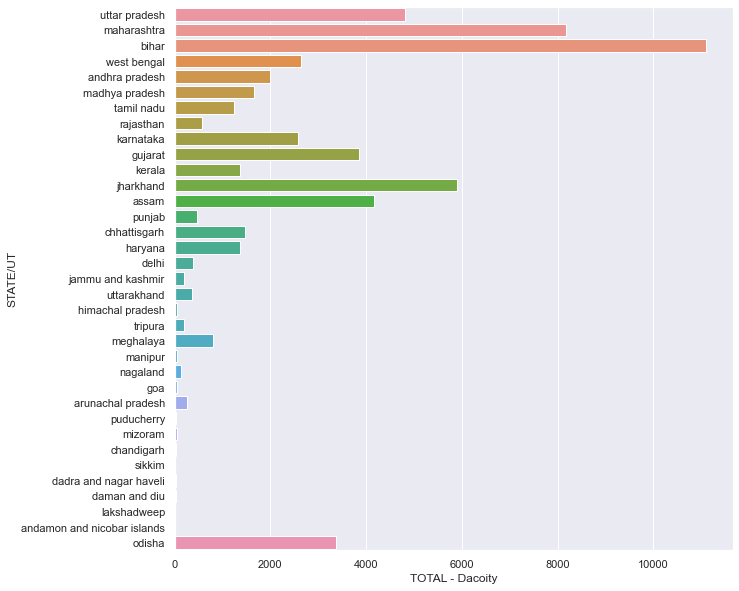

In [146]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL - Dacoity",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

In dacoity crime, for north east state some cases can be seen in arunachal pradesh and meghalaya,in union territory delhi is also showing some cases.max no of dacoity are held in bihar than maharastra than jharkhand. 

TOTAL - Robbery v STATE

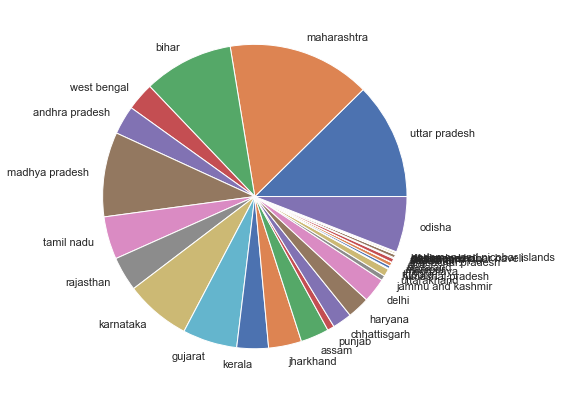

In [147]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL - Robbery'],labels=crime_by_place_of_occurrence.index)
plt.show()

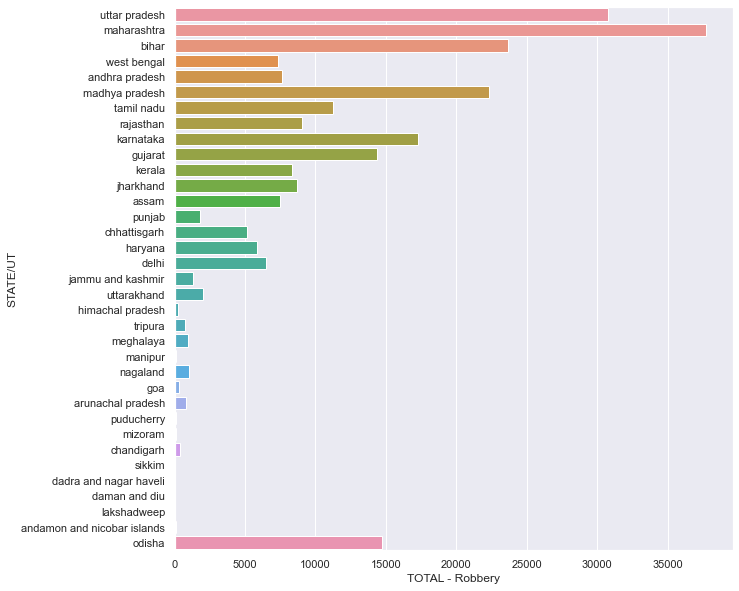

In [148]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL - Robbery",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

In case of robbery north east state and union territory are showing least cases,maximum cases of robbery can be seen in maharastra and at second UP and than bihar.

TOTAL - Burglary v STATE

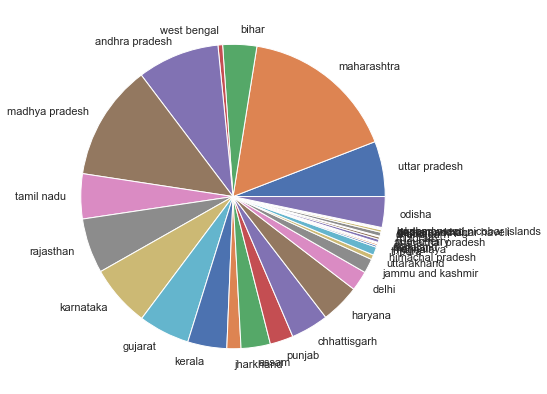

In [149]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL - Burglary'],labels=crime_by_place_of_occurrence.index)
plt.show()

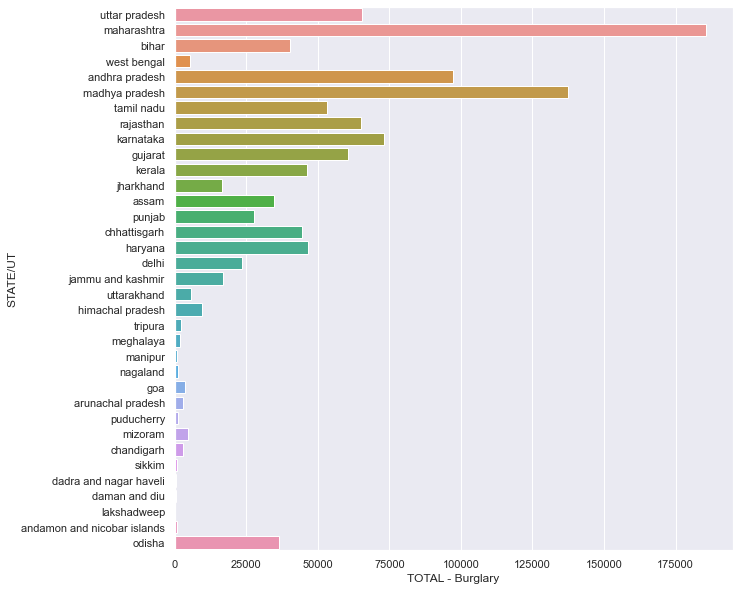

In [150]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL - Burglary",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

union territory and north east state are showing least crime of burglury and mahrastra is showing maximum,after that MP,AP,KARNATAKA,UP 

TOTAL - Theft V STATE

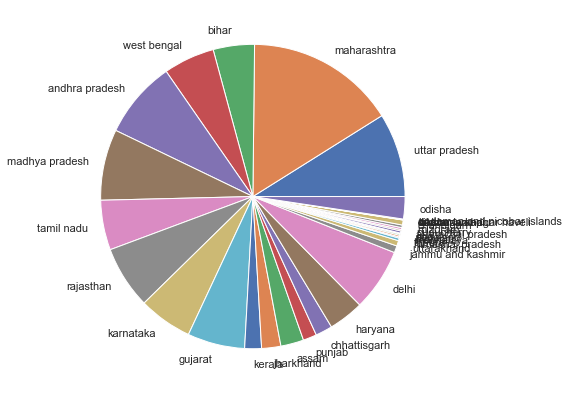

In [151]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_by_place_of_occurrence['TOTAL - Theft'],labels=crime_by_place_of_occurrence.index)
plt.show()

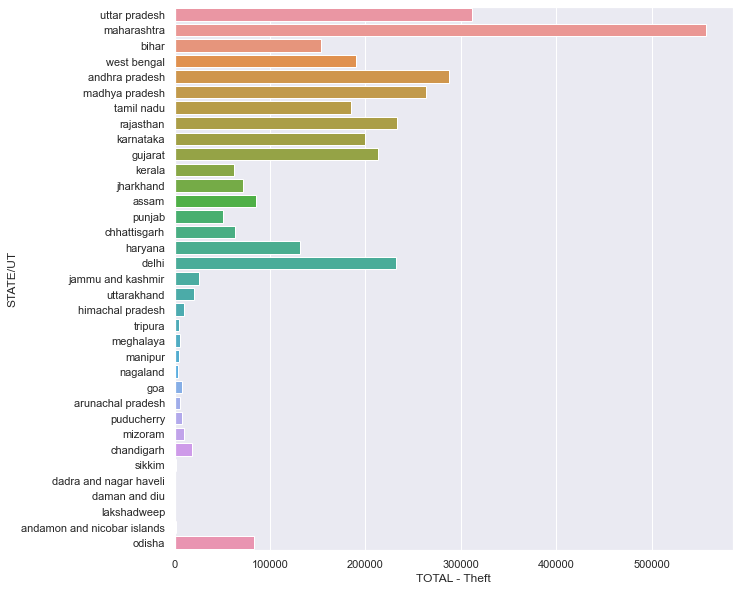

In [152]:
sns.barplot(y = crime_by_place_of_occurrence.index, x = "TOTAL - Theft",data=crime_by_place_of_occurrence)
sns.set(rc={'figure.figsize':(10,10)})

when it is observed total theft maharastra is showing max value for total theft and at second UP.lower 5 state in graph show almost null theft.

ANALYSIS OF POLICE KILLED OR INJURED ON DUTY

In [153]:
crime_Police_killed_or_injured_on_duty=pd.read_csv('crime_Police_killed_or_injured_on_duty.csv')
crime_Police_killed_or_injured_on_duty

Area_Name  Year                         Group_Name  \
0     Andaman and Nicobar Islands  2001  Police - Assistant Sub-Inspectors   
1                  Andhra Pradesh  2001  Police - Assistant Sub-Inspectors   
2               Arunachal Pradesh  2001  Police - Assistant Sub-Inspectors   
3                           Assam  2001  Police - Assistant Sub-Inspectors   
4                           Bihar  2001  Police - Assistant Sub-Inspectors   
...                           ...   ...                                ...   
2445                   Tamil Nadu  2010                     Police - Total   
2446                      Tripura  2010                     Police - Total   
2447                Uttar Pradesh  2010                     Police - Total   
2448                  Uttarakhand  2010                     Police - Total   
2449                  West Bengal  2010                     Police - Total   

                         Sub_Group_Name  Police_Injured_By_Criminals  \
0            3. Assistant Sub-Inspectos                            0   
1            3. Assistant Sub-Inspectos                            0   
2            3. Assistant Sub-Inspectos                            0   
3            3. Assistant Sub-Inspectos                            0   
4            3. Assistant Sub-Inspectos                            1   
...                                 ...                          ...   
2445  7. Total Police Killed or Injured                           10   
2446  7. Total Police Killed or Injured                            0   
2447  7. Total Police Killed or Injured                            6   
2448  7. Total Police Killed or Injured                            0   
2449  7. Total Police Killed or Injured                           17   

      Police_Injured_By_Riotous_Mobs  Police_Injured_In_Accidents  \
0                                  0                            0   
1                                  3                            4   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   
...                              ...                          ...   
2445                              26                          142   
2446                               0                            0   
2447                              10                            9   
2448                               0                            5   
2449                             265                           86   

      Police_Injured_In_Dacoity_OperationsOther_raids  \
0                                                   0   
1                                                   1   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
2445                                                4   
2446                                                0   
2447                                               10   
2448                                                0   
2449                                               23   

      Police_Injured_In_TerroristsExtremists_Operations  \
0                                                     0   
1                                                     3   
2                                                     0   
3                                                     1   
4                                                     2   
...                                                 ...   
2445                                                  0   
2446                                                  2   
2447                                                  0   
2448                                                  0   
2449                                                 21   


In [154]:
crime_Police_killed_or_injured_on_duty['Area_Name'] = crime_Police_killed_or_injured_on_duty['Area_Name'] .apply(str.lower)

In [155]:
crime_Police_killed_or_injured_on_duty=crime_Police_killed_or_injured_on_duty.groupby(['Area_Name']).sum()

In [156]:
crime_Police_killed_or_injured_on_duty=crime_Police_killed_or_injured_on_duty.drop('Year',1)

In [157]:
crime_Police_killed_or_injured_on_duty.insert(0,"Population",p1)

In [158]:
crime_Police_killed_or_injured_on_duty=crime_Police_killed_or_injured_on_duty.sort_values(by=['Population'],ascending=False)

In [159]:
crime_Police_killed_or_injured_on_duty.head()

Population  Police_Injured_By_Criminals  \
Area_Name                                                  
uttar pradesh   199812341.0                          676   
maharashtra     112374333.0                         1246   
bihar           104099452.0                          126   
west bengal      91276115.0                          506   
andhra pradesh   84580777.0                          244   

                Police_Injured_By_Riotous_Mobs  Police_Injured_In_Accidents  \
Area_Name                                                                     
uttar pradesh                              598                          756   
maharashtra                               7186                         2242   
bihar                                      136                          138   
west bengal                               4292                         2106   
andhra pradesh                            1328                         1854   

                Police_Injured_In_Dacoity_OperationsOther_raids  \
Area_Name                                                         
uttar pradesh                                               220   
maharashtra                                                 656   
bihar                                                        56   
west bengal                                                 360   
andhra pradesh                                              100   

                Police_Injured_In_TerroristsExtremists_Operations  \
Area_Name                                                           
uttar pradesh                                                  30   
maharashtra                                                   394   
bihar                                                         142   
west bengal                                                   234   
andhra pradesh                                                252   

                Police_Injured_On_Border_Duties  \
Area_Name                                         
uttar pradesh                                38   
maharashtra                                  22   
bihar                                        26   
west bengal                                  10   
andhra pradesh                                2   

                Police_Injured_Total_Policemen  Police_Killed_By_Criminals  \
Area_Name                                                                    
uttar pradesh                             2318                         242   
maharashtra                              11746                          78   
bihar                                      624                          92   
west bengal                               7508                          34   
andhra pradesh                            3780                          18   

                Police_Killed_By_Riotous_Mobs  Police_Killed_In_Accidents  \
Area_Name                                                                   
uttar pradesh                              30                        1700   
maharashtra                                12                        1450   
bihar                                      20                         140   
west bengal                                14                         310   
andhra pradesh                             12                         770   

                Police_Killed_In_Dacoity_OperationsOther_raids  \
Area_Name                                                        
uttar pradesh                                              106   
maharashtra                                                 10   
bihar                                                       14   
west bengal                                                  4   
andhra pradesh                                              12   

                Police_Killed_In_TerroristsExtremists_Operations  \
Area_Name                                                          
uttar pradesh                               

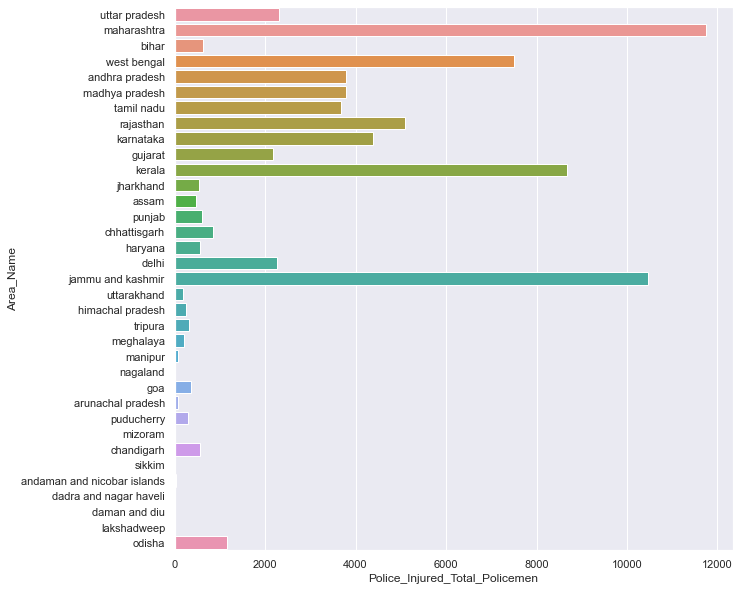

In [160]:
sns.barplot(y = crime_Police_killed_or_injured_on_duty.index, x = "Police_Injured_Total_Policemen",data=crime_Police_killed_or_injured_on_duty)
sns.set(rc={'figure.figsize':(10,10)})

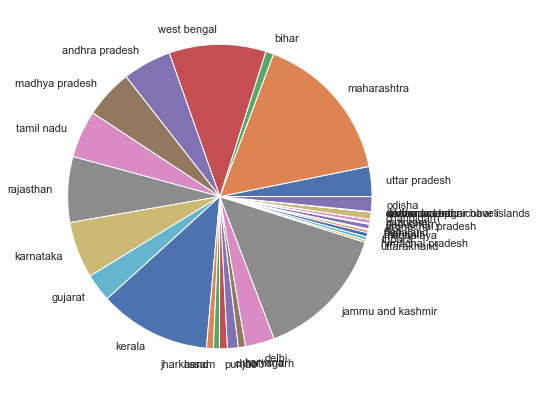

In [161]:
fig = plt.figure(figsize =(10, 7))
plt.pie(crime_Police_killed_or_injured_on_duty['Police_Injured_Total_Policemen'],labels=crime_Police_killed_or_injured_on_duty.index)
plt.show()

maximum number of police injured can be seen in maharastra after that in jammu and kashmir and than in kerala,west bengal,rajasthan.for UT there are very few cases of injury except delhi where it can be seen some cases.


ANALYSIS OF JUVENILE APPRENHENDED

In [162]:
juvenile_apprehended_state=pd.read_csv('cr_ juvenile_apprehended_state.csv')
juvenile_apprehended_state

STATE/UT  Year                                     CRIME  \
0      Andhra Pradesh  2001                                    Murder   
1      Andhra Pradesh  2001                  Attempt to Commit Murder   
2      Andhra Pradesh  2001               C H Not amounting to Murder   
3      Andhra Pradesh  2001                                      Rape   
4      Andhra Pradesh  2001                            Custodial Rape   
...               ...   ...                                       ...   
10495      Puducherry  2010           Cruelty by Husband or Relatives   
10496      Puducherry  2010  Importation of girls from Foreign Countr   
10497      Puducherry  2010               Causing death by negligence   
10498      Puducherry  2010                          Other IPC Crimes   
10499      Puducherry  2010                          Total IPC Crimes   

       Boys 7-12 Years  Girls 7-12 Years  Boys 12-16 Years  Girls 12-16 Years  \
0                    3                 0                 7                  0   
1                    2                 0                 0                  0   
2                    0                 0                 0                  0   
3                    2                 0                15                  0   
4                    0                 0                 0                  0   
...                ...               ...               ...                ...   
10495                0                 0                 0                  0   
10496                0                 0                 0                  0   
10497                0                 0                 0                  0   
10498                0                 0                 1                  0   
10499                0                 0                 8                  0   

       Boys 16-18 Years  Girls 16-18 Years  Total for boys all Age Groups  \
0                     5                  0                             15   
1                    11                  0                             13   
2                     0                  0                              0   
3                     2                  1                             19   
4                     0                  0                              0   
...                 ...                ...                            ...   
10495                 0                  0                              0   
10496                 0                  0                              0   
10497                 0                  0                              0   
10498                 2                  3                              3   
10499                31                  4                             39   

       Total for girls all Age Groups  Grand total  
0                                   0           15  
1                                   0           13  
2                                   0            0  
3                                   1           20  
4                                   0            0  
...                               ...          ...  
10495                               0            0  
10496                               0            0  
10497                               0            0  
10498                               3            6  
10499                               4           43  

[10500 rows x 12 columns]

In [163]:
juvenile_apprehended_state['STATE/UT'] = juvenile_apprehended_state['STATE/UT'] .apply(str.lower)

In [164]:
juvenile_apprehended_state=juvenile_apprehended_state.groupby(['STATE/UT']).sum()

In [165]:
juvenile_apprehended_state=juvenile_apprehended_state.drop('Year',1)

In [166]:
juvenile_apprehended_state.insert(0,"Population",p1)

In [167]:
juvenile_apprehended_state=juvenile_apprehended_state.sort_values(by=['Population'],ascending=False)

In [168]:
juvenile_apprehended_state

Population  Boys 7-12 Years  Girls 7-12 Years  \
STATE/UT                                                                      
uttar pradesh                199812341.0               75                 4   
maharashtra                  112374333.0             4967               382   
bihar                        104099452.0              133                 7   
west bengal                   91276115.0              227                22   
andhra pradesh                84580777.0             1771                57   
madhya pradesh                72626809.0             5836               406   
tamil nadu                    72147030.0              738               158   
rajasthan                     68548437.0             1090                76   
karnataka                     61095297.0              899                51   
gujarat                       60439692.0             1470               200   
kerala                        33406061.0               71                41   
jharkhand                     32988134.0             1665                 4   
assam                         31205576.0             1286               116   
punjab                        27743338.0              254                29   
chhattisgarh                  25545198.0             1773               199   
haryana                       25351462.0              353                21   
delhi                         16787941.0              683                53   
jammu and kashmir             12541302.0               31                 9   
uttarakhand                   10086292.0              138                 0   
himachal pradesh               6864602.0               73                 8   
tripura                        3673917.0               50                29   
meghalaya                      2966889.0              110                 2   
manipur                        2855794.0                0                 0   
nagaland                       1978502.0               29                 0   
goa                            1458545.0              138                14   
arunachal pradesh              1383727.0              136                 2   
puducherry                     1247953.0                3                 0   
mizoram                        1097206.0              476                44   
chandigarh                     1055450.0              173                30   
sikkim                          610577.0               32                 0   
daman and diu                   243247.0                5                 0   
lakshadweep                      64473.0                0                 0   
andamon and nicobar islands          NaN               10                 0   
odisha                               NaN              909                37   

                             Boys 12-16 Years  Girls 12-16 Years  \
STATE/UT                                                           
uttar pradesh                            2028                132   
maharashtra                             45491               2757   
bihar                                    3356                 96   
west bengal                               991                 91   
andhra pradesh                          13683                455   
madhya pradesh                          47670               2866   
tamil nadu                               7379                523   
rajasthan                               15543                597   
karnataka                                4101                178   
gujarat                                 14845               1379   
kerala                                   3016                146   
jharkhand                                5245                393   
assam                                    5221                510   
punjab                                   1025                 42   
chhattisgarh                            20332                748   
haryana                      

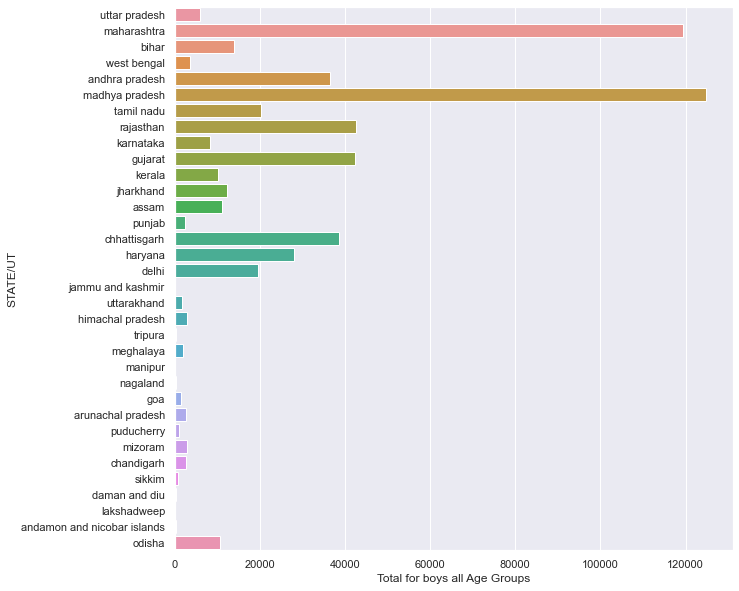

In [169]:
sns.barplot(y = juvenile_apprehended_state.index, x = "Total for boys all Age Groups",data=juvenile_apprehended_state)
sns.set(rc={'figure.figsize':(10,10)})

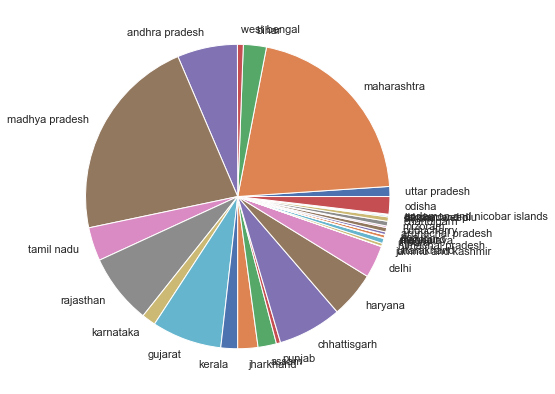

In [170]:
fig = plt.figure(figsize =(10, 7))
plt.pie(juvenile_apprehended_state['Total for boys all Age Groups'],labels=juvenile_apprehended_state.index)
plt.show()

From above graph it can be observed that MP and maharastra are having all number of boys those who have been apprehended,we can also observed highly populated UP is showing very less counts and west bengal is also showing lesser number according to its population

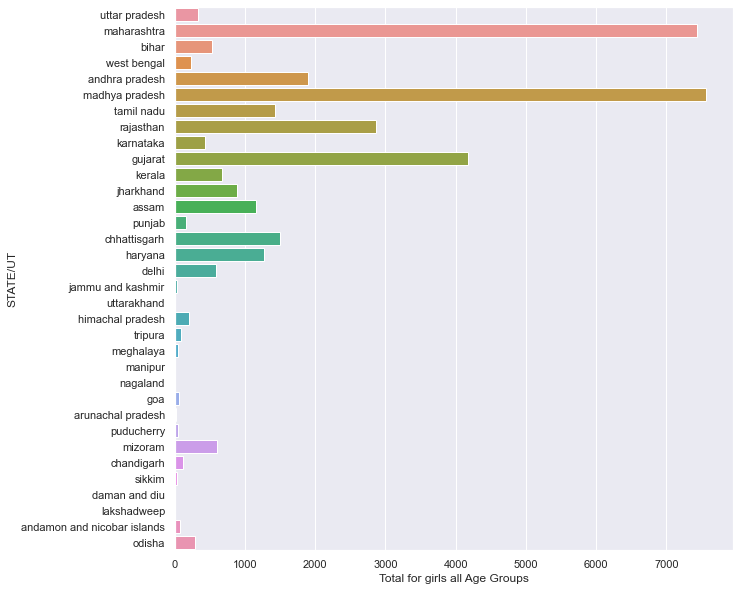

In [171]:
sns.barplot(y = juvenile_apprehended_state.index, x = "Total for girls all Age Groups",data=juvenile_apprehended_state)
sns.set(rc={'figure.figsize':(10,10)})

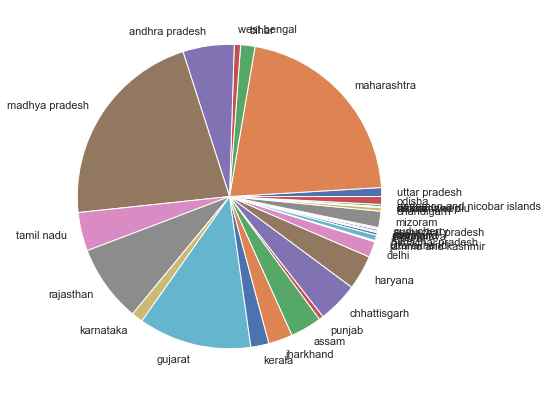

In [172]:
fig = plt.figure(figsize =(10, 7))
plt.pie(juvenile_apprehended_state['Total for girls all Age Groups'],labels=juvenile_apprehended_state.index)
plt.show()

same pattern can be observed for girls count also except in this case only  gujrat is  showing some numbers which is considerable.rest state are showing low apprehendtion.

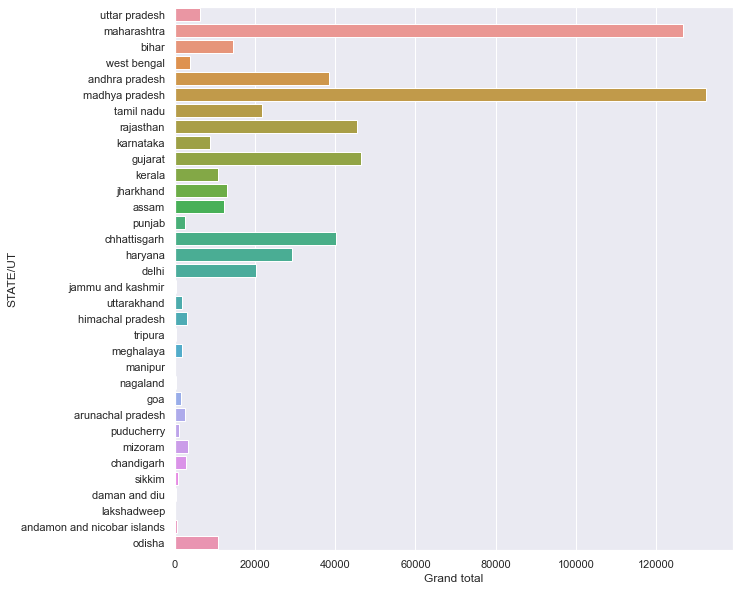

In [173]:
sns.barplot(y = juvenile_apprehended_state.index, x = "Grand total",data=juvenile_apprehended_state)
sns.set(rc={'figure.figsize':(10,10)})

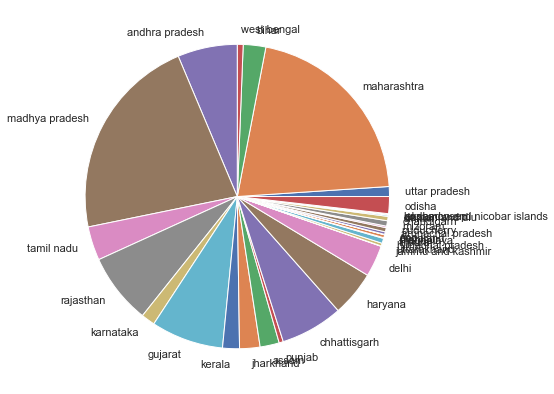

In [174]:
fig = plt.figure(figsize =(10, 7))
plt.pie(juvenile_apprehended_state['Grand total'],labels=juvenile_apprehended_state.index)
plt.show()

From overll juvenile apprehend we can conclude that alone maharastra and MP is showing half count.rest some other state are also showing the count which can be considered that are rajasthan,gujrat,chattisgarh,andhra pradesh and other.

ANALYSIS OF Human right violation

In [175]:
Human_rights_violation_by_police=pd.read_csv('cr_Human_rights_violation_by_police.csv')
Human_rights_violation_by_police

Area_Name  Year                     Group_Name  \
0        Andhra Pradesh  2001    HR_Disappearance of Persons   
1     Arunachal Pradesh  2001    HR_Disappearance of Persons   
2                 Assam  2001    HR_Disappearance of Persons   
3                 Bihar  2001    HR_Disappearance of Persons   
4            Chandigarh  2001    HR_Disappearance of Persons   
...                 ...   ...                            ...   
2262          Meghalaya  2010  HR_Total Violations by Police   
2263           Nagaland  2010  HR_Total Violations by Police   
2264             Odisha  2010  HR_Total Violations by Police   
2265      Uttar Pradesh  2010  HR_Total Violations by Police   
2266        West Bengal  2010  HR_Total Violations by Police   

                     Sub_Group_Name  \
0      01. Disappearance of Persons   
1      01. Disappearance of Persons   
2      01. Disappearance of Persons   
3      01. Disappearance of Persons   
4      01. Disappearance of Persons   
...                             ...   
2262  12. Total (Sum of 1-11 Above)   
2263  12. Total (Sum of 1-11 Above)   
2264  12. Total (Sum of 1-11 Above)   
2265  12. Total (Sum of 1-11 Above)   
2266  12. Total (Sum of 1-11 Above)   

      Cases_Registered_under_Human_Rights_Violations  Policemen_Chargesheeted  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   
...                                              ...                      ...   
2262                                               0                        0   
2263                                               0                        0   
2264                                               5                        1   
2265                                               6                        5   
2266                                               1                        0   

      Policemen_Convicted  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
2262                    0  
2263                    0  
2264                    0  
2265                    0  
2266                    0  

[2267 rows x 7 columns]

In [176]:
Human_rights_violation_by_police['Area_Name'] = Human_rights_violation_by_police['Area_Name'] .apply(str.lower)

In [177]:
Human_rights_violation_by_police=Human_rights_violation_by_police.groupby(['Area_Name']).sum()

In [178]:
Human_rights_violation_by_police=Human_rights_violation_by_police.drop('Year',1)

In [179]:
Human_rights_violation_by_police.insert(0,"Population",p1)

In [180]:
Human_rights_violation_by_police=Human_rights_violation_by_police.sort_values(by=['Population'],ascending=False)

In [181]:
Human_rights_violation_by_police

Population  \
Area_Name                        
uttar pradesh      199812341.0   
maharashtra        112374333.0   
bihar              104099452.0   
west bengal         91276115.0   
andhra pradesh      84580777.0   
madhya pradesh      72626809.0   
tamil nadu          72147030.0   
rajasthan           68548437.0   
karnataka           61095297.0   
gujarat             60439692.0   
kerala              33406061.0   
jharkhand           32988134.0   
assam               31205576.0   
punjab              27743338.0   
chhattisgarh        25545198.0   
haryana             25351462.0   
delhi               16787941.0   
jammu and kashmir   12541302.0   
uttarakhand         10086292.0   
himachal pradesh     6864602.0   
tripura              3673917.0   
meghalaya            2966889.0   
manipur              2855794.0   
nagaland             1978502.0   
goa                  1458545.0   
arunachal pradesh    1383727.0   
puducherry           1247953.0   
mizoram              1097206.0   
chandigarh           1055450.0   
daman and diu         243247.0   
odisha                     NaN   

                   Cases_Registered_under_Human_Rights_Violations  \
Area_Name                                                           
uttar pradesh                                                 108   
maharashtra                                                    90   
bihar                                                          52   
west bengal                                                    28   
andhra pradesh                                                226   
madhya pradesh                                                 16   
tamil nadu                                                     22   
rajasthan                                                      16   
karnataka                                                      74   
gujarat                                                       226   
kerala                                                         16   
jharkhand                                                       6   
assam                                                         302   
punjab                                                         22   
chhattisgarh                                                  624   
haryana                                                        22   
delhi                                                          24   
jammu and kashmir                                              36   
uttarakhand                                                     2   
himachal pradesh                                                0   
tripura                                                         0   
meghalaya                                                       0   
manipur                                                         6   
nagaland                                                        0   
goa                                                             6   
arunachal pradesh                                              40   
puducherry                                                      2   
mizoram                                                         0   
chandigarh                                                      2   
daman and diu                                                   0   
odisha                                                         62   

                   Policemen_Chargesheeted  Policemen_Convicted  
Area_Name                                                        
uttar pradesh                          154                    0  
maharashtra                             78                    0  
bihar                                   26                   16  
west bengal                             16                    0  
andhra pradesh                         110                    4  
madhya pradesh                          14                    6  
tamil nadu                              18                    0  
rajasthan                

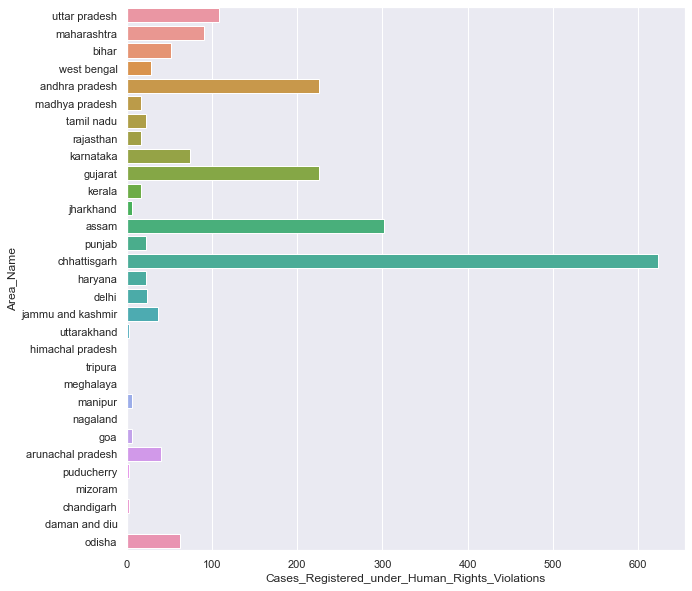

In [182]:
sns.barplot(y = Human_rights_violation_by_police.index, x = "Cases_Registered_under_Human_Rights_Violations",data=Human_rights_violation_by_police)
sns.set(rc={'figure.figsize':(10,10)})

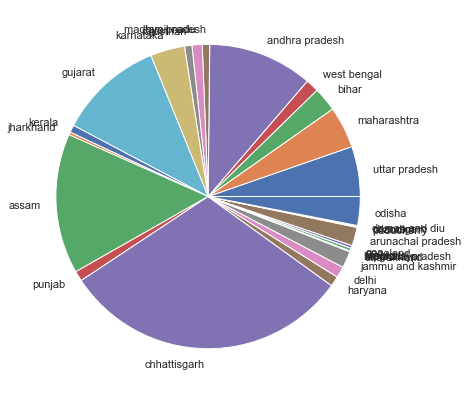

In [183]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Human_rights_violation_by_police['Cases_Registered_under_Human_Rights_Violations'],labels=Human_rights_violation_by_police.index)
plt.show()

From above it can be concluded that chattisgarh alone have larger number of cases registered under human violation after that gujrat, andhra pradesh,assam.rest state are very few in numbers.

policeman convicted

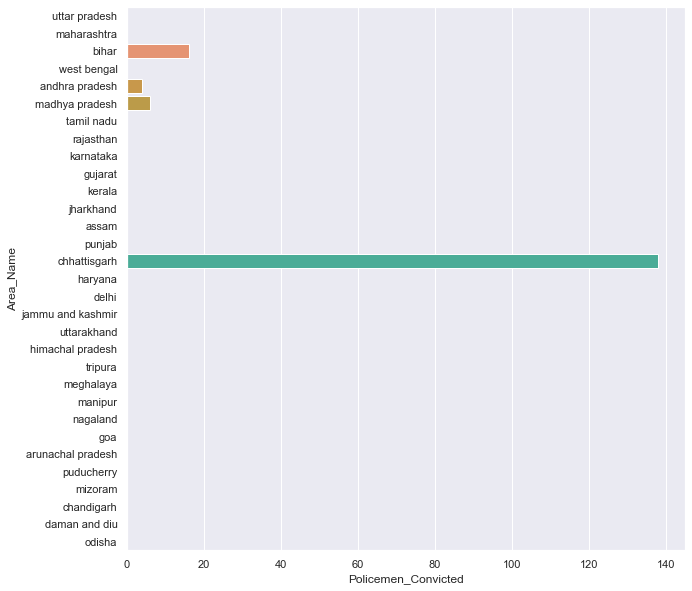

In [184]:
sns.barplot(y = Human_rights_violation_by_police.index, x = "Policemen_Convicted",data=Human_rights_violation_by_police)
sns.set(rc={'figure.figsize':(10,10)})

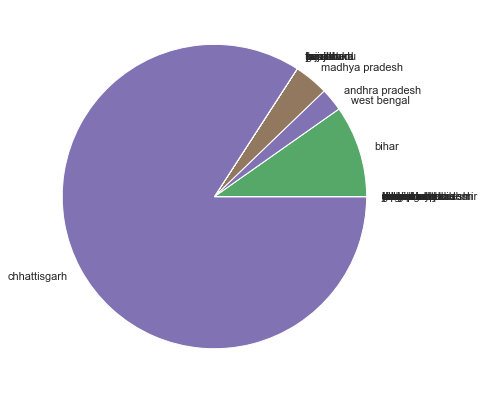

In [185]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Human_rights_violation_by_police['Policemen_Convicted'],labels=Human_rights_violation_by_police.index)
plt.show()

it can be observed that 70  to 75 % police man is found convicted in state of chattisgarh,nearly 15 to 20 % in bihar.rest in other states

ANALYSIS OF CASE REPORTED AND VALUE OF PROPERTY TAKEN

In [186]:
Case_reported_and_value_of_property=pd.read_csv('cr_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence.csv')
Case_reported_and_value_of_property

STATE/UT  YEAR         Place Of Occurrence  \
0     Andhra Pradesh  2001        RESIDENTIAL PREMISES   
1     Andhra Pradesh  2001                    HIGH-WAY   
2     Andhra Pradesh  2001                 RIVER & SEA   
3     Andhra Pradesh  2001                    RAILWAYS   
4     Andhra Pradesh  2001              RUNNING TRAINS   
...              ...   ...                         ...   
4339      Puducherry  2012                       BANKS   
4340      Puducherry  2012   COMMERCIAL ESTABLISHMENTS   
4341      Puducherry  2012                OTHER PLACES   
4342      Puducherry  2012              TOTAL (MANUAL)   
4343      Puducherry  2012  TOTAL COMPUTER FROM 1 TO 7   

      Dacoity  - Number of cases registered  \
0                                       100   
1                                        57   
2                                         2   
3                                         8   
4                                         5   
...                                     ...   
4339                                      0   
4340                                      2   
4341                                      2   
4342                                      5   
4343                                      5   

      Dacoity  - Value Of Property Stolen (in rupees)  \
0                                             4446961   
1                                             5340335   
2                                              145345   
3                                             1750800   
4                                               75000   
...                                               ...   
4339                                                0   
4340                                            58000   
4341                                           575000   
4342                                           683000   
4343                                           683000   

      Robbery - Number of cases registered  \
0                                      177   
1                                      172   
2                                       11   
3                                       19   
4                                        3   
...                                    ...   
4339                                     0   
4340                                     4   
4341                                     8   
4342                                    16   
4343                                    16   

      Robbery - Value Of Property Stolen (in rupees)  \
0                                            5962460   
1                                            6364866   
2                                             209330   
3                                             304336   
4                                             164000   
...                                              ...   
4339                                               0   
4340                                          197230   
4341                                          113100   
4342                                         2520330   
4343                                         2520330   

      Burglary- Number of cases registered  \
0                                     5158   
1                                       31   
2                                      101   
3                                        6   
4                                        0   
...                                    ...   
4339                                     0   
4340                                    26   
4341                                     4   
4342                                    77   
4343                                    77   

      Burglary - Value Of Property Stolen (in rupees)  \
0                                           105324332   
1                                             2000574   
2                                             1412516   
3                                               24392   
4

In [187]:
Case_reported_and_value_of_property['STATE/UT'] = Case_reported_and_value_of_property['STATE/UT'] .apply(str.lower)

In [188]:
Case_reported_and_value_of_property=Case_reported_and_value_of_property.groupby(['STATE/UT']).sum()

In [189]:
Case_reported_and_value_of_property.insert(0,"Population",p1)

In [190]:
Case_reported_and_value_of_property=Case_reported_and_value_of_property.sort_values(by=['Population'],ascending=False)

In [191]:
Case_reported_and_value_of_property

Population    YEAR  \
STATE/UT                                      
uttar pradesh           199812341.0  248800   
maharashtra             112374333.0  250799   
bihar                   104099452.0  248800   
west bengal              91276115.0  250799   
andhra pradesh           84580777.0  246788   
madhya pradesh           72626809.0  244786   
tamil nadu               72147030.0  250803   
rajasthan                68548437.0  250803   
karnataka                61095297.0  244797   
gujarat                  60439692.0  250803   
kerala                   33406061.0  246798   
jharkhand                32988134.0  242792   
assam                    31205576.0  248791   
punjab                   27743338.0  246798   
chhattisgarh             25545198.0  244797   
haryana                  25351462.0  248801   
delhi                    16787941.0  252811   
jammu and kashmir        12541302.0  250803   
uttarakhand              10086292.0  250803   
himachal pradesh          6864602.0  248800   
tripura                   3673917.0  244787   
meghalaya                 2966889.0  250803   
manipur                   2855794.0  248801   
nagaland                  1978502.0  250803   
goa                       1458545.0  248794   
arunachal pradesh         1383727.0  248800   
puducherry                1247953.0  250803   
mizoram                   1097206.0  248801   
chandigarh                1055450.0  250808   
sikkim                     610577.0  252811   
dadra and nagar haveli     343709.0  248806   
daman and diu              243247.0  248801   
lakshadweep                 64473.0  248801   
andamon and nicobar             NaN  250803   
odisha                          NaN  252811   

                        Dacoity  - Number of cases registered  \
STATE/UT                                                        
uttar pradesh                                           11853   
maharashtra                                             19542   
bihar                                                   27040   
west bengal                                              6449   
andhra pradesh                                           4678   
madhya pradesh                                           3647   
tamil nadu                                               3087   
rajasthan                                                1357   
karnataka                                                5610   
gujarat                                                  9781   
kerala                                                   3089   
jharkhand                                               12286   
assam                                                   10184   
punjab                                                   1043   
chhattisgarh                                             3276   
haryana                                                  3207   
delhi                                                     973   
jammu and kashmir                                         484   
uttarakhand                                               881   
himachal pradesh                                          101   
tripura                                                   537   
meghalaya                                                1973   
manipur                                                   131   
nagaland                                                  315   
goa                                                       131   
arunachal pradesh                                         607   
puducherry                                                 87   
mizoram                                                   103   
chandigarh                                                 72   
sikkim                                                     17   
dadra and nagar haveli                                     86   
daman and diu                                              77   
lakshadweep                                                 6   
andamon an

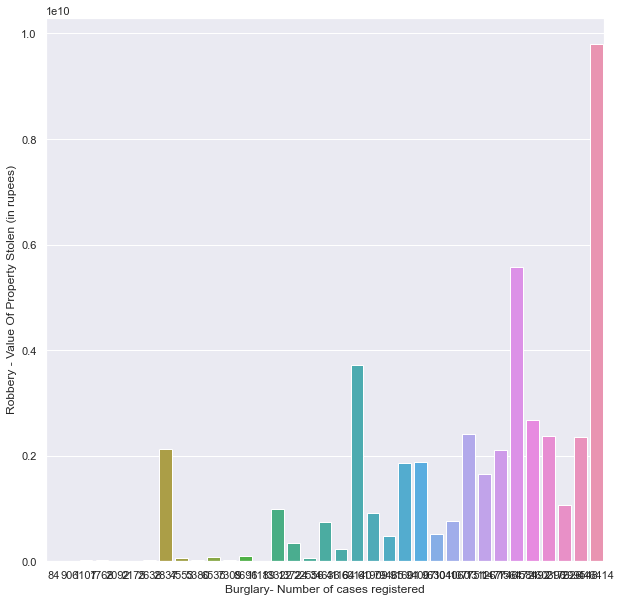

In [192]:
sns.barplot(x = "Burglary- Number of cases registered", y = "Robbery - Value Of Property Stolen (in rupees)",data=Case_reported_and_value_of_property)
sns.set(rc={'figure.figsize':(10,20)})

from above it can be observed that as number of cases are increasing value of property is also increasing.this is direct relation but it can be seen in graph

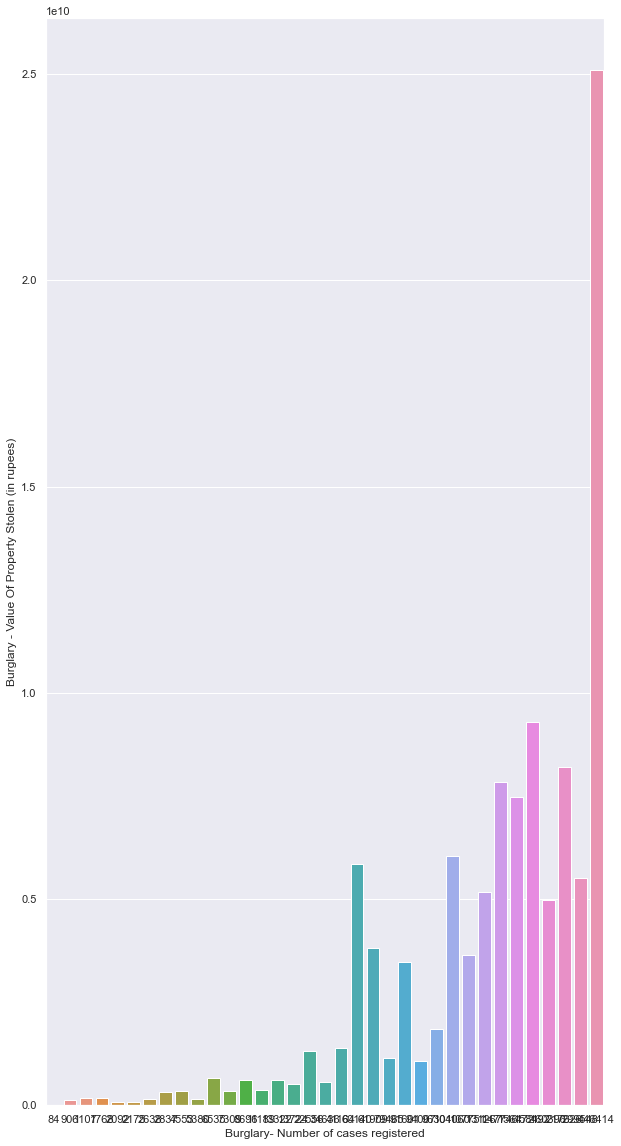

In [193]:
sns.barplot(x = "Burglary- Number of cases registered", y = "Burglary - Value Of Property Stolen (in rupees)",data=Case_reported_and_value_of_property)
sns.set(rc={'figure.figsize':(5,20)})

from above graph it can be analysed that maharastra  has maximum no of cases and alsoas  maximum value of property loss is showing in maharastra.rest trend can be seen that as the number of case increases value of property also increases. 

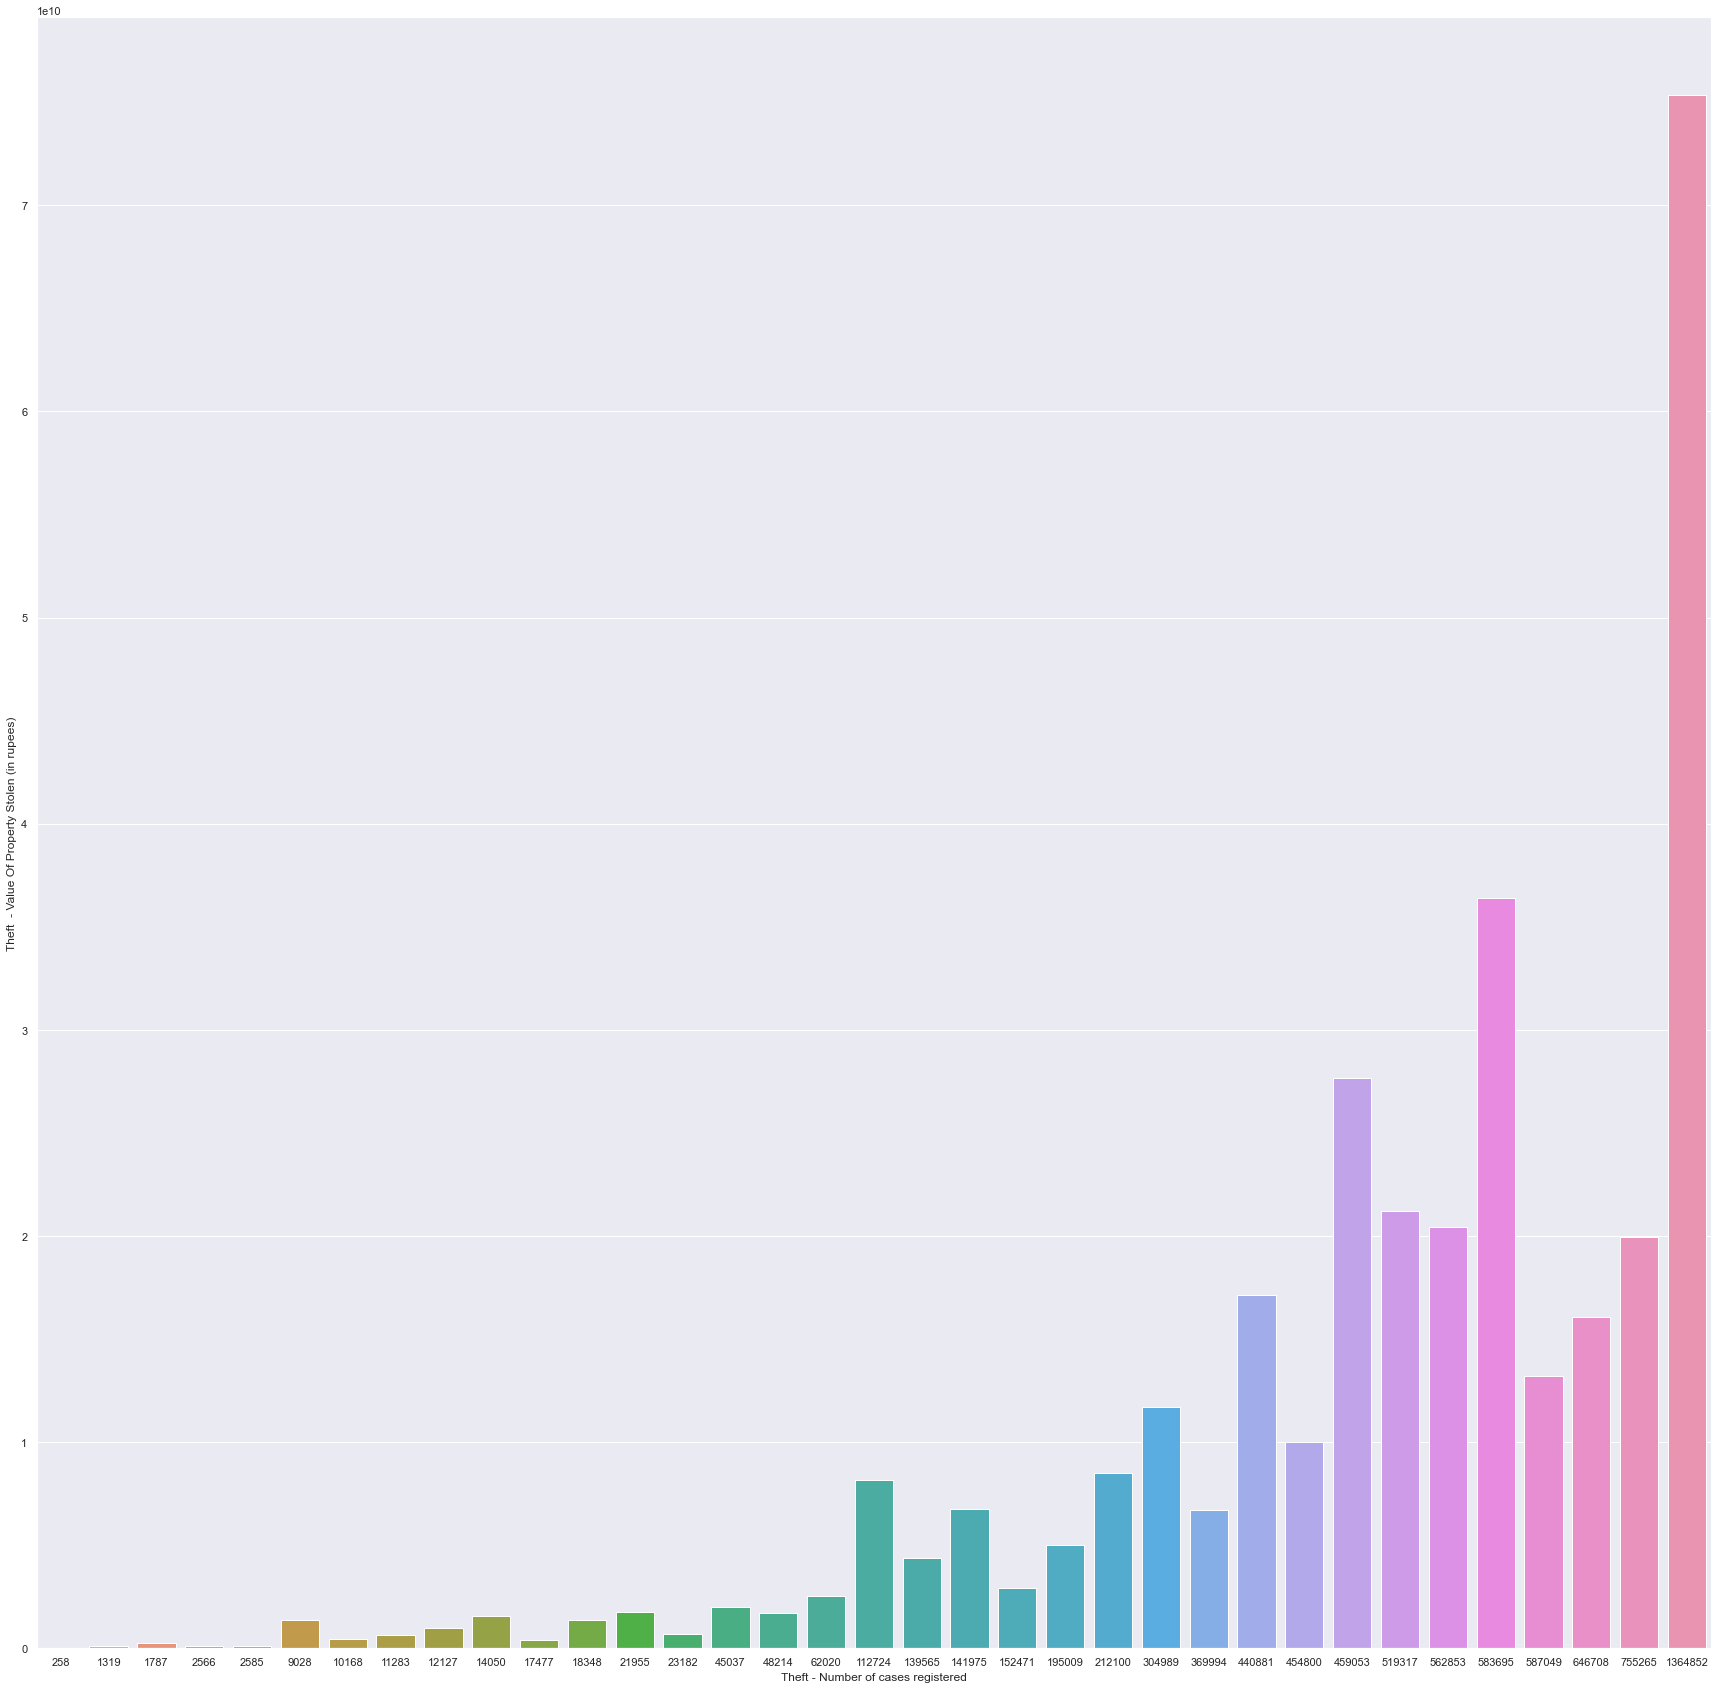

In [199]:
sns.barplot(x = "Theft - Number of cases registered", y = "Theft  - Value Of Property Stolen (in rupees)",data=Case_reported_and_value_of_property)
sns.set(rc={'figure.figsize':(3,30)})

For theft case also it is following the dame trend as the no. of cases increases value of property also increases.in this case also maharastra is showing maximum no. of cases.

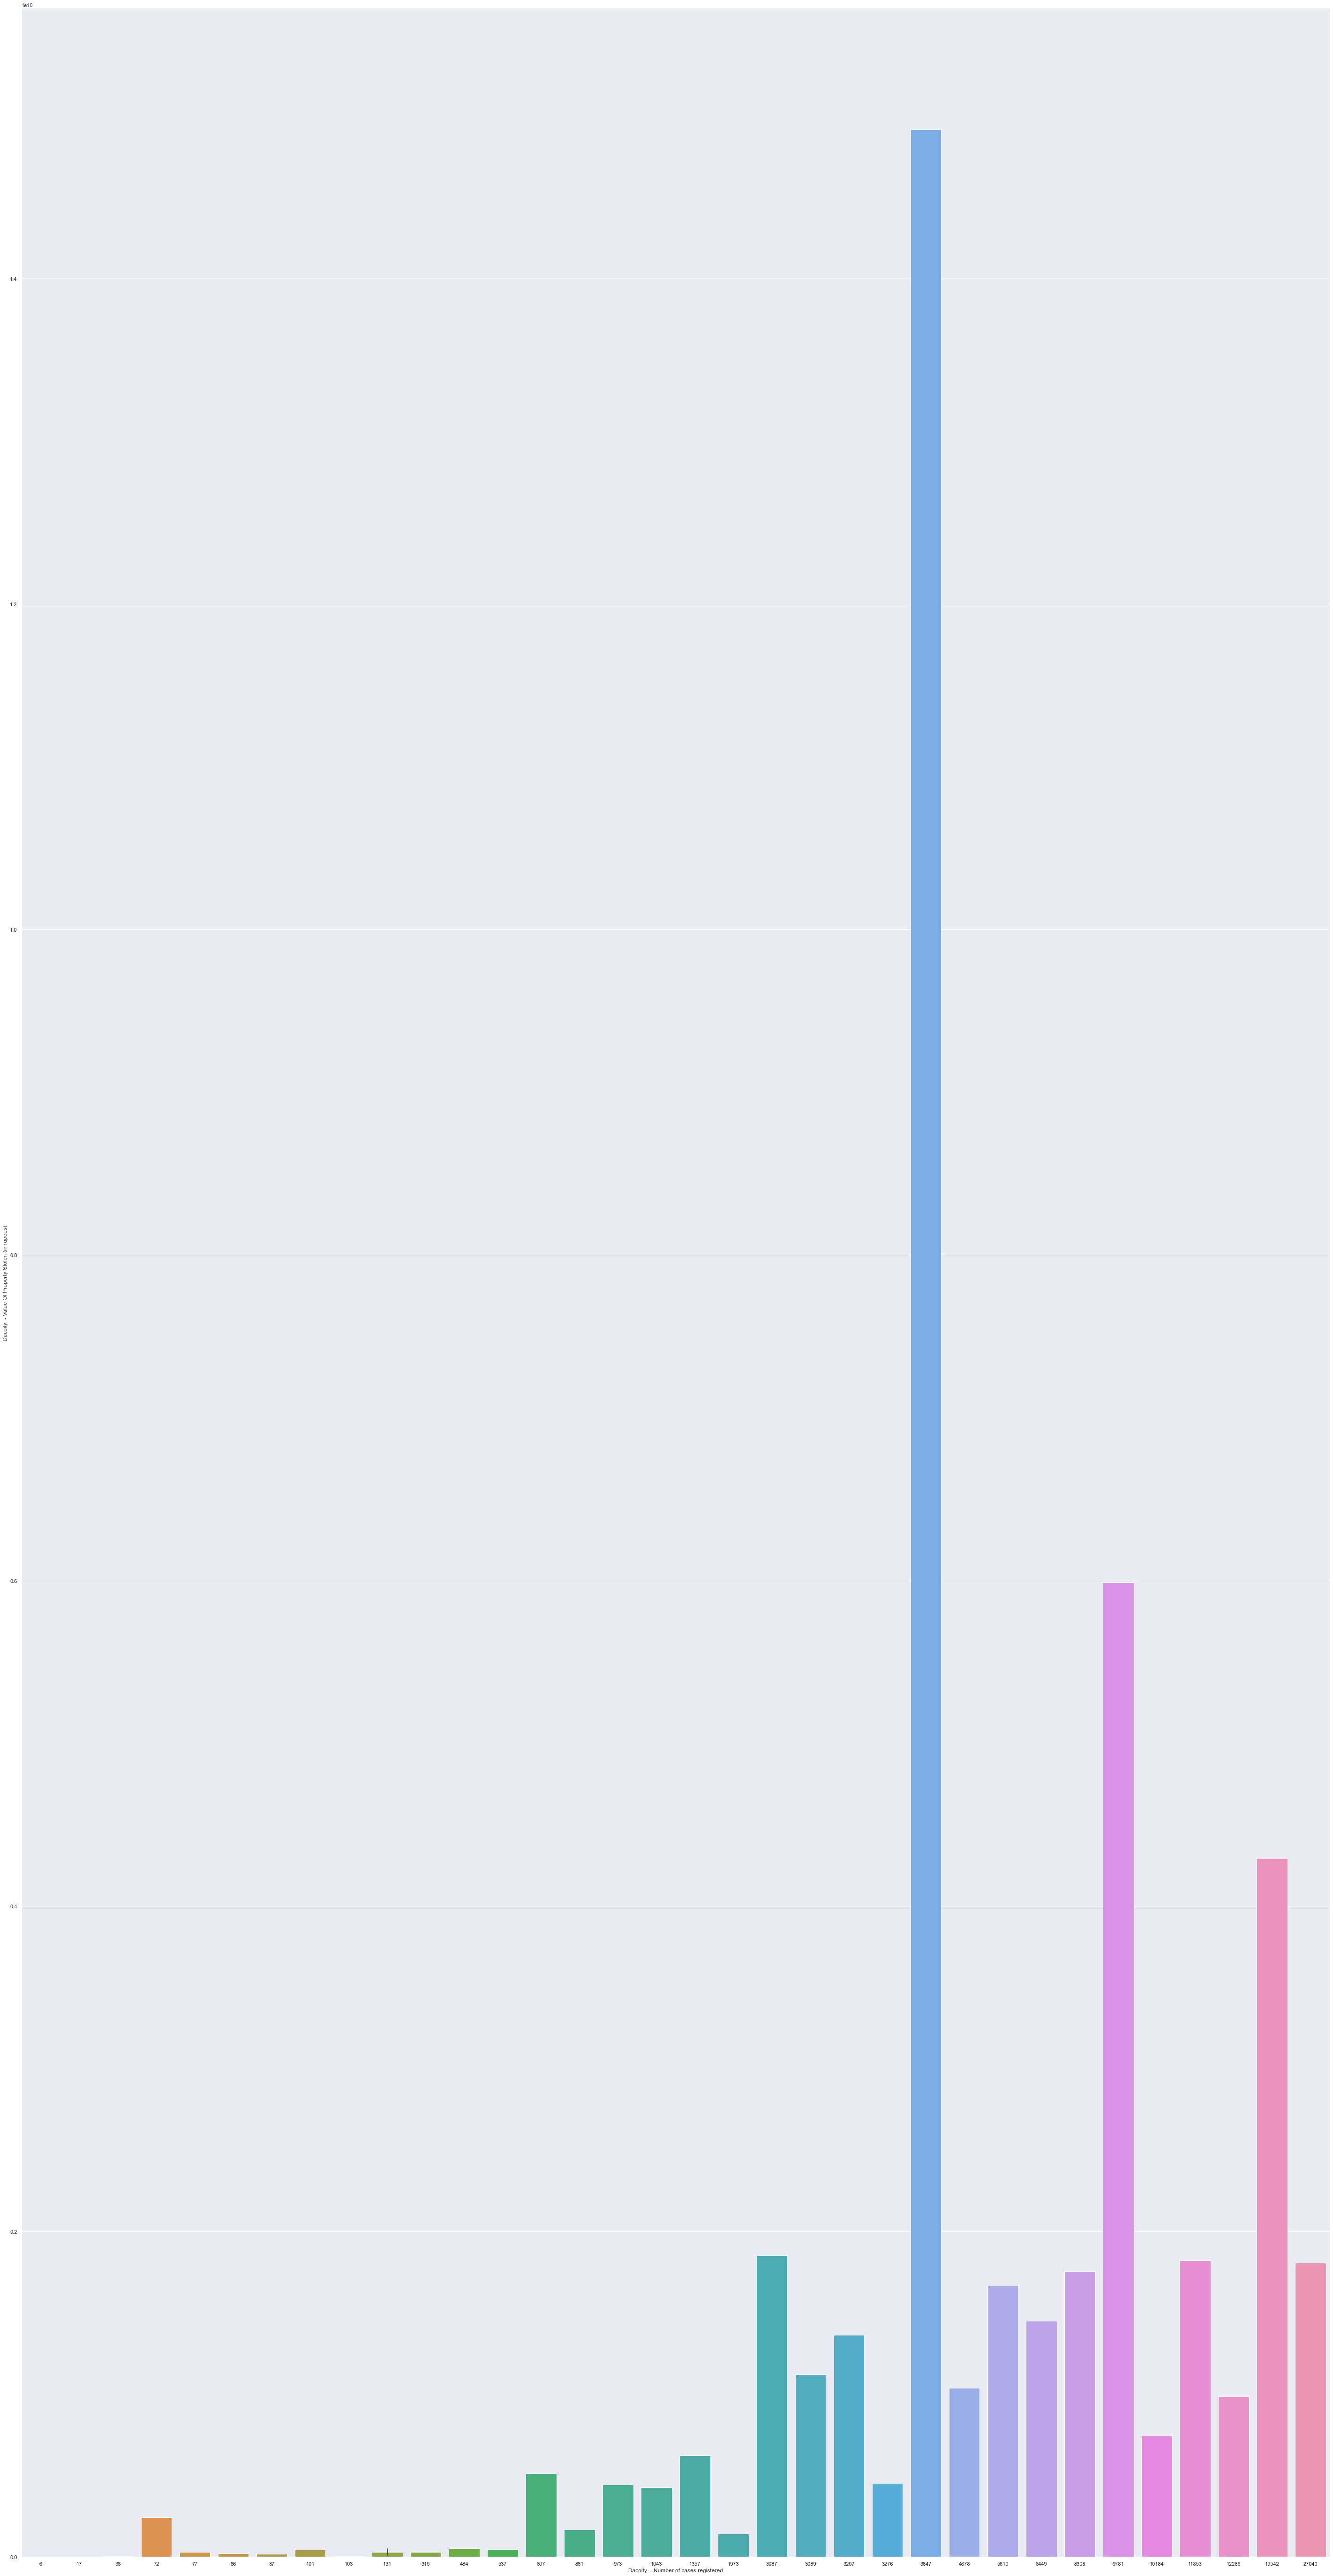

In [196]:
sns.barplot(x = "Dacoity  - Number of cases registered", y = "Dacoity  - Value Of Property Stolen (in rupees)",data=Case_reported_and_value_of_property)
sns.set(rc={'figure.figsize':(5,100)})

for madhya pradesh it can be seen that no. of casess are not very high bur property stolen due to dacoity is very high as seen in the graph. gujrat is also showing the same trend as MP but it is less than MP.

converting dataframe into csv files to use them in phrase 4

In [220]:
df_statewise1.to_csv('crime_ipc.csv')

In [221]:
crime_against_sc.to_csv('crime_sc.csv')

In [226]:
crime_against_st.to_csv('crime_st.csv')

In [227]:
crime_against_children.to_csv('crime_children.csv')

In [228]:
crime_property_stolen.to_csv('crime_property_stolen.csv')

In [229]:
crime_by_place_of_occurrence.to_csv('crime_place_of_occurence.csv')

In [230]:
crime_Police_killed_or_injured_on_duty.to_csv('crime_police_killed_or_injured.csv')

In [232]:
Human_rights_violation_by_police.to_csv('crime_human_violation.csv')

In [233]:
data_population.to_csv('data_population.csv')